In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import ghibtools as gh
import matplotlib.pyplot as plt
import seaborn as sns

# PARAMS

In [3]:
savefig = False
savefig_for_csid_val = False

In [4]:
folder = '../Analyses/results/allplot/df/'
save_folder_csid_val = '/crnldata/cmo/Etudiants/Valentin_G/figs_ieeg_csid/'

In [5]:
bandes = ['theta','alpha','beta','l_gamma','h_gamma','whole']

In [6]:
sujets_lyon = ['CHEe','GOBc','TREt','MAZm']
sujets = ['CHEe', 'GOBc', 'MAZm', 'TREt', 'MUGa', 'BANc', 'KOFs', 'LEMl',
       'pat_02459_0912', 'pat_02476_0929', 'pat_02495_0949',
       'pat_03083_1527', 'pat_03105_1551', 'pat_03128_1591',
       'pat_03138_1601']

# TF IE

In [7]:
file = folder + 'allplot_df_TF_IE.xlsx'
df_TF_IE = pd.read_excel(file, index_col = 0).drop(columns = 'Unnamed: 0')

In [8]:
predictors = ['cond','band','phase']
outcome = 'Pxx'

In [9]:
df_TF_IE

sujet   cond    chan           ROI      Lobe side     band  \
0               CHEe  RD_CV    Jp01  temporal sup  Temporal    l    theta   
1               CHEe  RD_CV    Jp01  temporal sup  Temporal    l    theta   
2               CHEe  RD_CV    Jp01  temporal sup  Temporal    l    theta   
3               CHEe  RD_CV    Jp01  temporal sup  Temporal    l    theta   
4               CHEe  RD_CV    Jp01  temporal sup  Temporal    l    alpha   
...              ...    ...     ...           ...       ...  ...      ...   
1171  pat_03138_1601  FR_CV  TPol_4  temporal sup  Temporal    l  l_gamma   
1172  pat_03138_1601  FR_CV  TPol_4  temporal sup  Temporal    l  h_gamma   
1173  pat_03138_1601  FR_CV  TPol_4  temporal sup  Temporal    l  h_gamma   
1174  pat_03138_1601  FR_CV  TPol_4  temporal sup  Temporal    l  h_gamma   
1175  pat_03138_1601  FR_CV  TPol_4  temporal sup  Temporal    l  h_gamma   

      phase          Pxx  
0     inspi    67.481836  
1      expi    98.242254  
2        IE    94.608035  
3        EI    82.491903  
4     inspi    -1.611994  
...     ...          ...  
1171     EI -1173.942380  
1172  inspi -1555.185372  
1173   expi -1570.217411  
1174     IE -1545.028389  
1175     EI -1527.958497  

[74136 rows x 9 columns]

## ALL CONDITIONS

In [10]:
df_TF_IE_all = df_TF_IE[df_TF_IE['sujet'].isin(sujets_lyon)]
df_TF_IE_all = df_TF_IE_all[~df_TF_IE_all['cond'].isin(['RD_AV','FR_MV'])]

In [11]:
df_TF_IE_all

sujet   cond  chan            ROI      Lobe side     band  phase  \
0      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta  inspi   
1      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta   expi   
2      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta     IE   
3      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta     EI   
4      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    alpha  inspi   
...     ...    ...   ...            ...       ...  ...      ...    ...   
17555  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  l_gamma     EI   
17556  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma  inspi   
17557  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma   expi   
17558  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma     IE   
17559  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma     EI   

              Pxx  
0       67.481836  
1       98.242254  
2       94.608035  
3       82.491903  
4       -1.611994  
...           ...  
17555 -658.324969  
17556 -515.909214  
17557 -506.899759  
17558 -526.412351  
17559 -479.923490  

[40224 rows x 9 columns]

In [12]:
df_TF_IE_all.groupby('cond').mean()

Pxx
cond             
FR_CV -601.746466
RD_CV -112.427959
RD_FV -118.317176
RD_SV  -17.060937

In [13]:
df_TF_IE_all.groupby('phase').mean()

Pxx
phase            
EI    -211.406674
IE    -211.988749
expi  -212.590337
inspi -213.566778

In [14]:
df_TF_IE_all

sujet   cond  chan            ROI      Lobe side     band  phase  \
0      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta  inspi   
1      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta   expi   
2      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta     IE   
3      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta     EI   
4      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    alpha  inspi   
...     ...    ...   ...            ...       ...  ...      ...    ...   
17555  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  l_gamma     EI   
17556  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma  inspi   
17557  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma   expi   
17558  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma     IE   
17559  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma     EI   

              Pxx  
0       67.481836  
1       98.242254  
2       94.608035  
3       82.491903  
4       -1.611994  
...           ...  
17555 -658.324969  
17556 -515.909214  
17557 -506.899759  
17558 -526.412351  
17559 -479.923490  

[40224 rows x 9 columns]

In [15]:
df_TF_IE_all.groupby(['sujet','cond']).mean().reset_index()

sujet   cond          Pxx
0   CHEe  FR_CV  -293.322960
1   CHEe  RD_CV   -23.505086
2   CHEe  RD_FV   -15.960696
3   CHEe  RD_SV    -3.683952
4   GOBc  FR_CV -1469.647660
5   GOBc  RD_CV  -360.522384
6   GOBc  RD_FV  -368.196442
7   GOBc  RD_SV   -50.609087
8   MAZm  FR_CV  -425.987598
9   MAZm  RD_CV   -69.740417
10  MAZm  RD_FV   -75.807881
11  MAZm  RD_SV   -12.724702
12  TREt  FR_CV  -352.425044
13  TREt  RD_CV   -35.346219
14  TREt  RD_FV   -50.858806
15  TREt  RD_SV    -6.533184

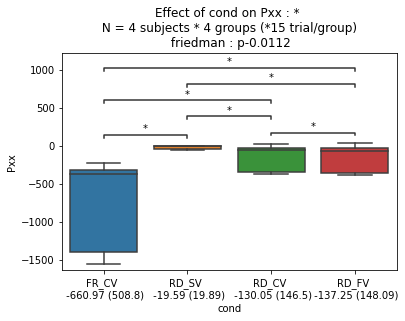

In [16]:
fig, ax = plt.subplots()
gh.auto_stats(df=df_TF_IE_all.groupby(['sujet','cond','ROI']).mean().reset_index(), predictor = 'cond', outcome = 'Pxx', subject = 'sujet', transform=False, order = ['FR_CV','RD_SV','RD_CV','RD_FV'], ax=ax)
if savefig:
    plt.savefig(folder + 'figures_stats/mean_pxx_by_cond', bbox_inches = 'tight')

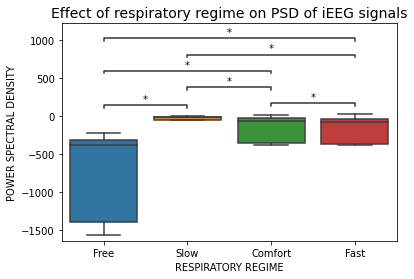

In [17]:
if savefig_for_csid_val:
    fig, ax = plt.subplots()
    gh.auto_stats(df=df_TF_IE_all.groupby(['sujet','cond','ROI']).mean().reset_index(), predictor = 'cond', outcome = 'Pxx', subject = 'sujet', transform=False, order = ['FR_CV','RD_SV','RD_CV','RD_FV'], ax=ax)
    ax.set_xticklabels(['Free','Slow','Comfort','Fast'])
    ax.set_xlabel('RESPIRATORY REGIME')
    ax.set_ylabel('POWER SPECTRAL DENSITY')
    ax.set_title('Effect of respiratory regime on PSD of iEEG signals', fontsize = 14)
    plt.savefig(save_folder_csid_val + 'psd_by_regime', bbox_inches = 'tight', dpi = 300)

             Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   Pxx         
No. Observations:   40224     Method:               REML        
No. Groups:         4         Scale:                40487.6514  
Min. group size:    8832      Log-Likelihood:       -270444.2163
Max. group size:    11712     Converged:            Yes         
Mean group size:    10056.0                                     
----------------------------------------------------------------
                Coef.   Std.Err.    z    P>|z|  [0.025   0.975] 
----------------------------------------------------------------
Intercept      -615.287  109.527  -5.618 0.000 -829.956 -400.618
cond[T.RD_CV]   489.319    2.838 172.436 0.000  483.757  494.880
cond[T.RD_FV]   483.429    2.838 170.361 0.000  477.868  488.991
cond[T.RD_SV]   584.686    2.838 206.043 0.000  579.124  590.247
Group Var     47968.494  183.740                                



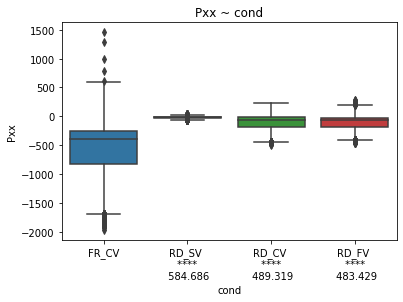

In [18]:
gh.lmm(df=df_TF_IE_all, predictor = 'cond', outcome = 'Pxx', subject = 'sujet', order = ['FR_CV','RD_SV','RD_CV','RD_FV'])

In [19]:
gh.auto_stats(df=df_TF_IE_all.groupby(['sujet','phase','cond','ROI']).mean().reset_index(), predictor = 'phase', outcome = 'Pxx', subject = 'sujet', transform=False)

<AxesSubplot:title={'center':'Effect of phase on Pxx : ns \n N = 4 subjects * 4 groups (*61 trial/group) \n friedman : p-0.96'}, xlabel='phase', ylabel='Pxx'>

/home/valentin.ghibaudo/.virtualenvs/py38_nodegpu/lib/python3.8/site-packages/pingouin/distribution.py:486: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(
/home/valentin.ghibaudo/.virtualenvs/py38_nodegpu/lib/python3.8/site-packages/pingouin/distribution.py:486: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(
/home/valentin.ghibaudo/.virtualenvs/py38_nodegpu/lib/python3.8/site-packages/pingouin/distribution.py:486: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(


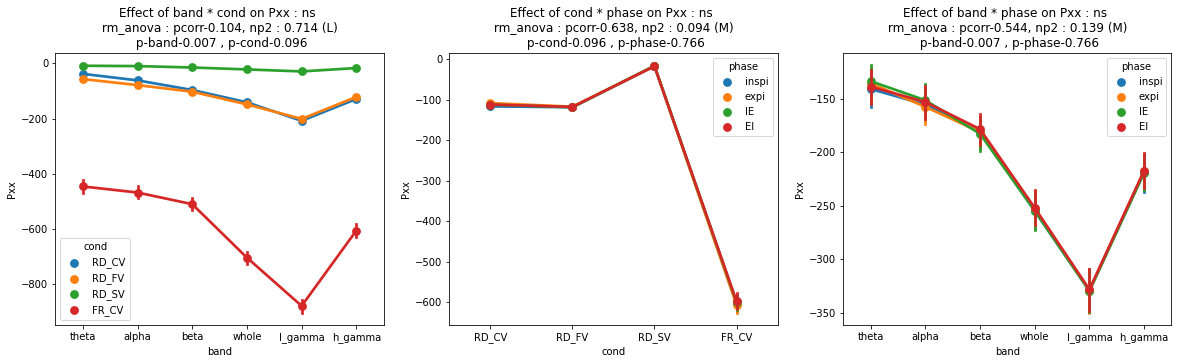

In [20]:
pairs = [['band','cond'],['cond','phase'],['band','phase']]
fig, axs = plt.subplots(ncols = len(pairs), figsize = (20,5))
for col,pair in enumerate(pairs):
    ax = axs[col]
    gh.auto_stats(df=df_TF_IE_all, predictor = pair, outcome = 'Pxx', subject = 'sujet', design = 'within', ax=ax, transform = False)

In [21]:
df_TF_IE_all

sujet   cond  chan            ROI      Lobe side     band  phase  \
0      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta  inspi   
1      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta   expi   
2      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta     IE   
3      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta     EI   
4      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    alpha  inspi   
...     ...    ...   ...            ...       ...  ...      ...    ...   
17555  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  l_gamma     EI   
17556  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma  inspi   
17557  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma   expi   
17558  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma     IE   
17559  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma     EI   

              Pxx  
0       67.481836  
1       98.242254  
2       94.608035  
3       82.491903  
4       -1.611994  
...           ...  
17555 -658.324969  
17556 -515.909214  
17557 -506.899759  
17558 -526.412351  
17559 -479.923490  

[40224 rows x 9 columns]

In [22]:
df_TF_IE_all.groupby(['sujet','cond','ROI']).mean()

Pxx
sujet cond  ROI                          
CHEe  FR_CV WM                -266.781183
            amygdala          -230.102728
            choroide plexus   -325.674481
            cingulaire post   -259.368683
            hippocampus       -223.003759
...                                   ...
TREt  RD_SV pars triangularis   -9.588259
            pole temporal       -7.235189
            temporal inf        -4.224645
            temporal med        -1.839791
            temporal sup         0.275752

[244 rows x 1 columns]

In [23]:
df_TF_IE_all.groupby(['cond','phase']).std()

Pxx
cond  phase            
FR_CV EI     506.259728
      IE     507.267072
      expi   510.285066
      inspi  505.713269
RD_CV EI     146.143991
      IE     151.301300
      expi   156.372917
      inspi  141.775646
RD_FV EI     148.036495
      IE     147.474183
      expi   147.935137
      inspi  144.515656
RD_SV EI      20.380854
      IE      20.467706
      expi    20.022803
      inspi   20.066064

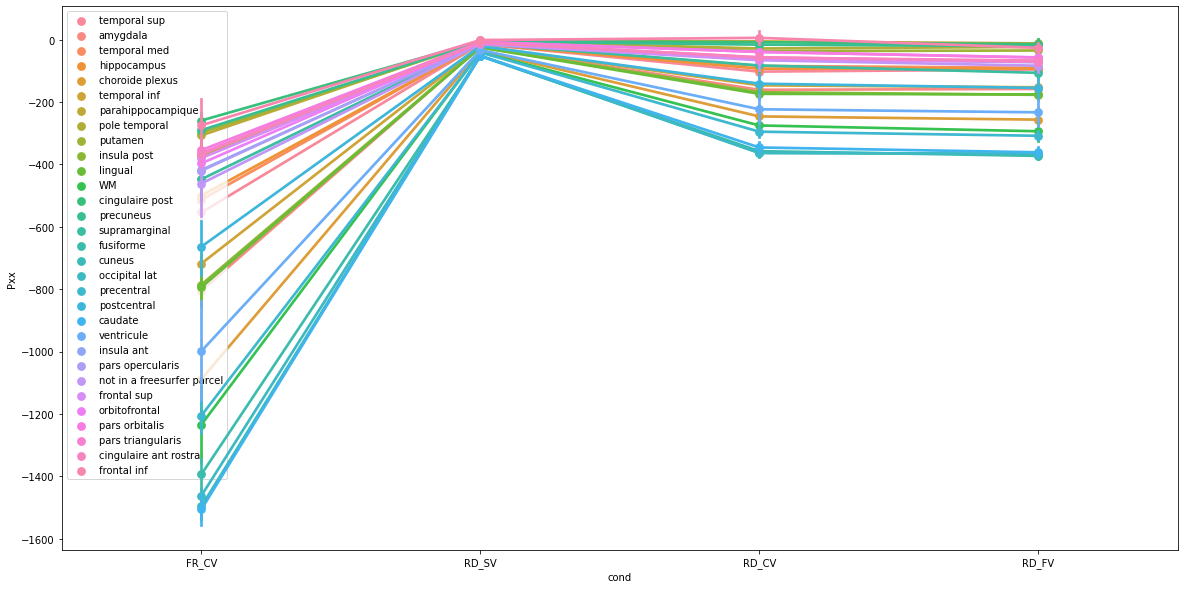

In [24]:
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data=df_TF_IE_all , x = 'cond',y = 'Pxx', hue = 'ROI',ax=ax, order = ['FR_CV','RD_SV','RD_CV','RD_FV'])
ax.legend(loc = 2)
# ax.tick_params(axis='x', rotation=90)
if savefig:
    plt.savefig(folder + 'figures_stats/Pxx_cond_hueROI', bbox_inches = 'tight')

In [25]:
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data=df_TF_IE_all , x = 'ROI',y = 'Pxx', hue = 'cond',ax=ax, hue_order = ['FR_CV','RD_SV','RD_CV','RD_FV'])
ax.tick_params(axis='x', rotation=90)

In [26]:
fig, ax = plt.subplots()
gh.auto_stats(df=df_TF_IE_all.groupby(['sujet','cond','ROI']).std().reset_index(), predictor = 'cond', outcome = 'Pxx', subject = 'sujet', order = ['FR_CV','RD_SV','RD_CV','RD_FV'], transform = False, ax=ax)
if savefig:
    plt.savefig(folder + 'figures_stats/std_Pxx_cond', bbox_inches = 'tight')


In [27]:
if savefig_for_csid_val:
    fig, ax = plt.subplots()
    gh.auto_stats(df=df_TF_IE_all.groupby(['sujet','cond','ROI']).std().reset_index(), predictor = 'cond', outcome = 'Pxx', subject = 'sujet', order = ['FR_CV','RD_SV','RD_CV','RD_FV'], transform = False, ax=ax)
    ax.set_xticklabels(['Free','Slow','Comfort','Fast'])
    ax.set_xlabel('RESPIRATORY REGIME')
    ax.set_ylabel('STD of POWER SPECTRAL DENSITY')
    ax.set_title('Effect of respiratory regime on variabiliy of PSD of iEEG signals', fontsize = 14)
    plt.savefig(save_folder_csid_val + 'psd_by_regime_std', bbox_inches = 'tight', dpi = 300)

In [28]:
mapper_n_rois = {roi:df_TF_IE_all['ROI'].value_counts()[roi] for roi in df_TF_IE_all.groupby(['ROI']).mean().index}

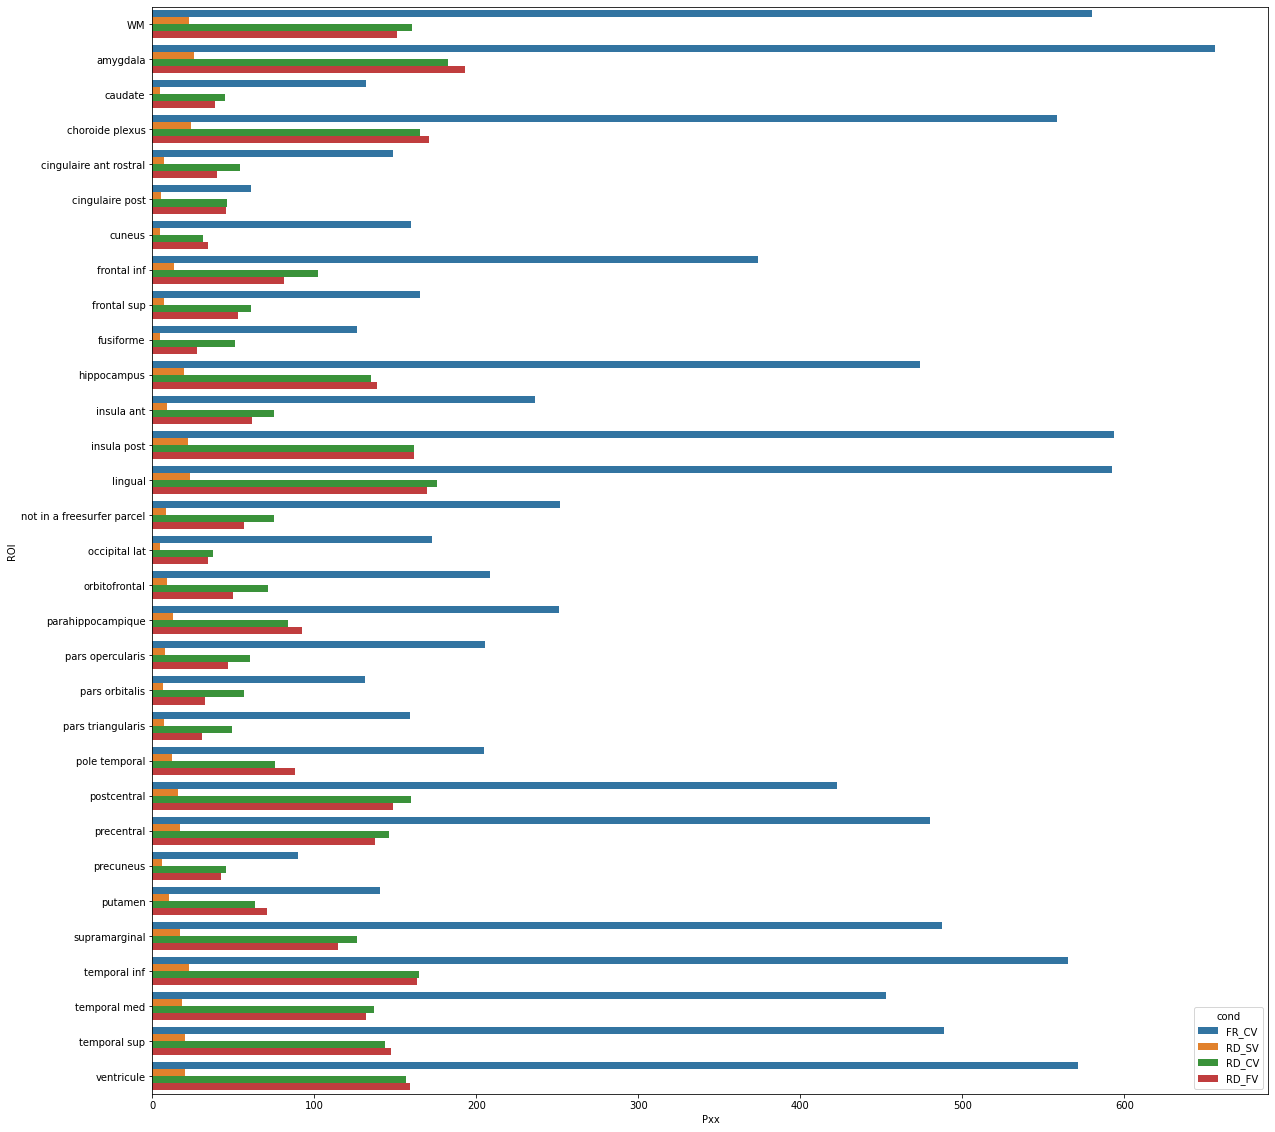

In [29]:
fig, ax = plt.subplots(figsize = (20,20))
sns.barplot(data=df_TF_IE_all.groupby(['cond','ROI']).std().reset_index(), y='ROI', x = 'Pxx', hue = 'cond', orient = 'h', ax=ax, hue_order = ['FR_CV','RD_SV','RD_CV','RD_FV'])
# ax.bar_label(container=ax.containers[0], labels=mapper_n_rois.values())
plt.show()

In [30]:
df_ratio_sd_FR_SV = pd.DataFrame(data=(df_TF_IE_all.groupby(['band','cond','ROI']).std().query("cond == 'FR_CV'").values / df_TF_IE_all.groupby(['band','cond','ROI']).std().query("cond == 'RD_SV'").values), index = (df_TF_IE_all.groupby(['band','cond','ROI']).std().query("cond == 'FR_CV'").index))

<AxesSubplot:xlabel='0', ylabel='ROI'>

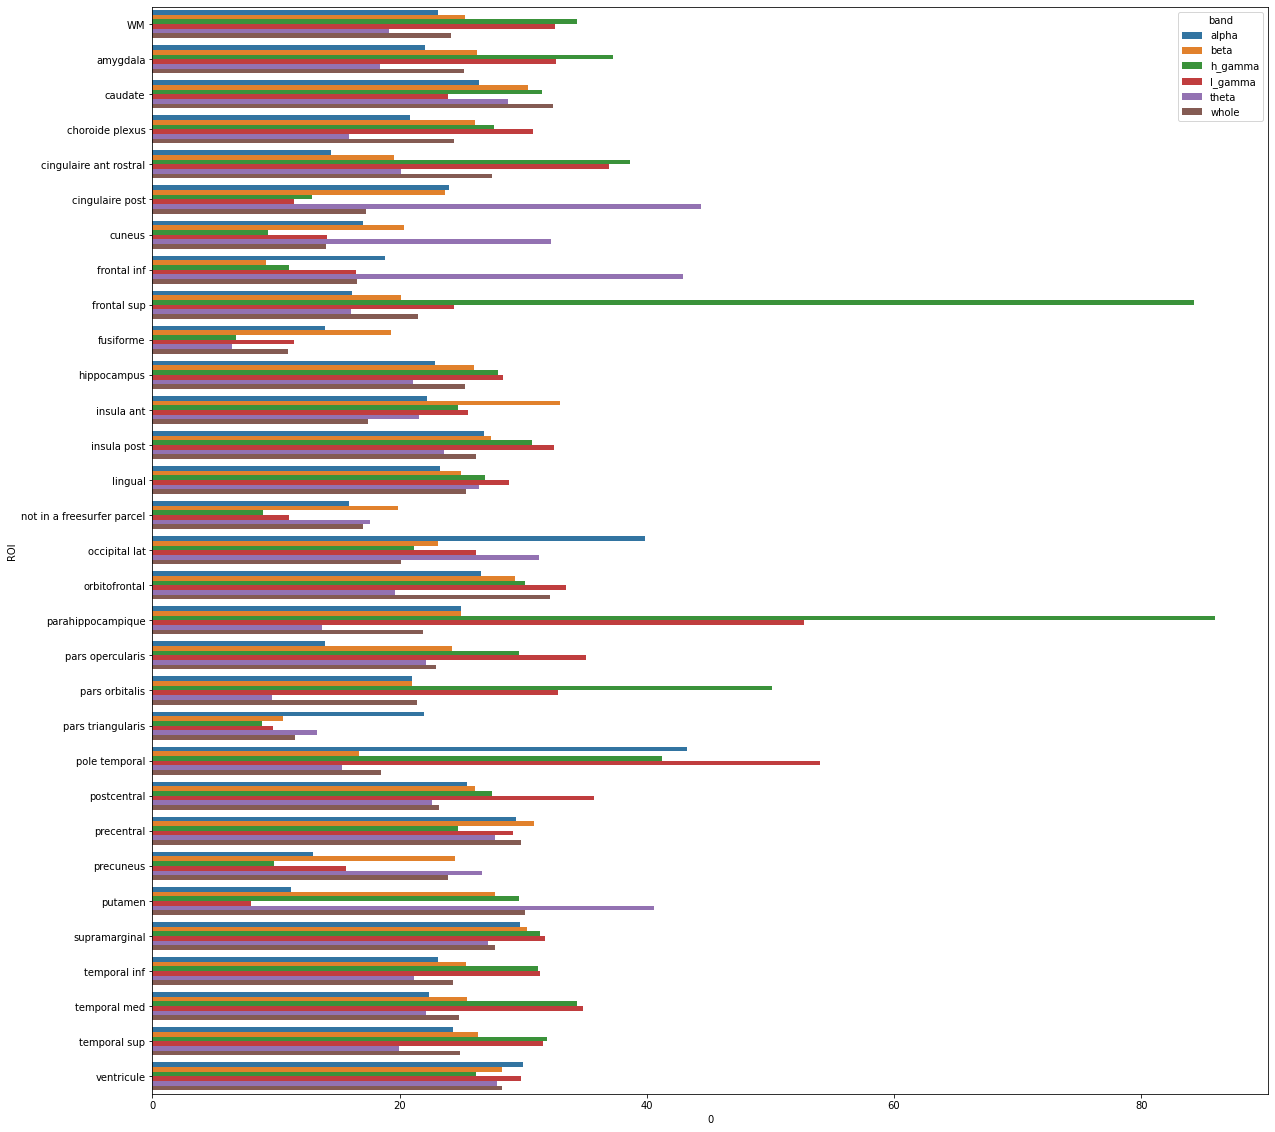

In [31]:
fig , ax = plt.subplots(figsize = (20,20))
sns.barplot(data=df_ratio_sd_FR_SV.reset_index(), x = 0, y = 'ROI', hue='band',ax=ax)

In [32]:
sns.pointplot(data=df_TF_IE_all.groupby(['band','cond','ROI']).std().reset_index(), x = 'cond', y = 'Pxx', hue = 'band')

<AxesSubplot:xlabel='cond', ylabel='Pxx'>

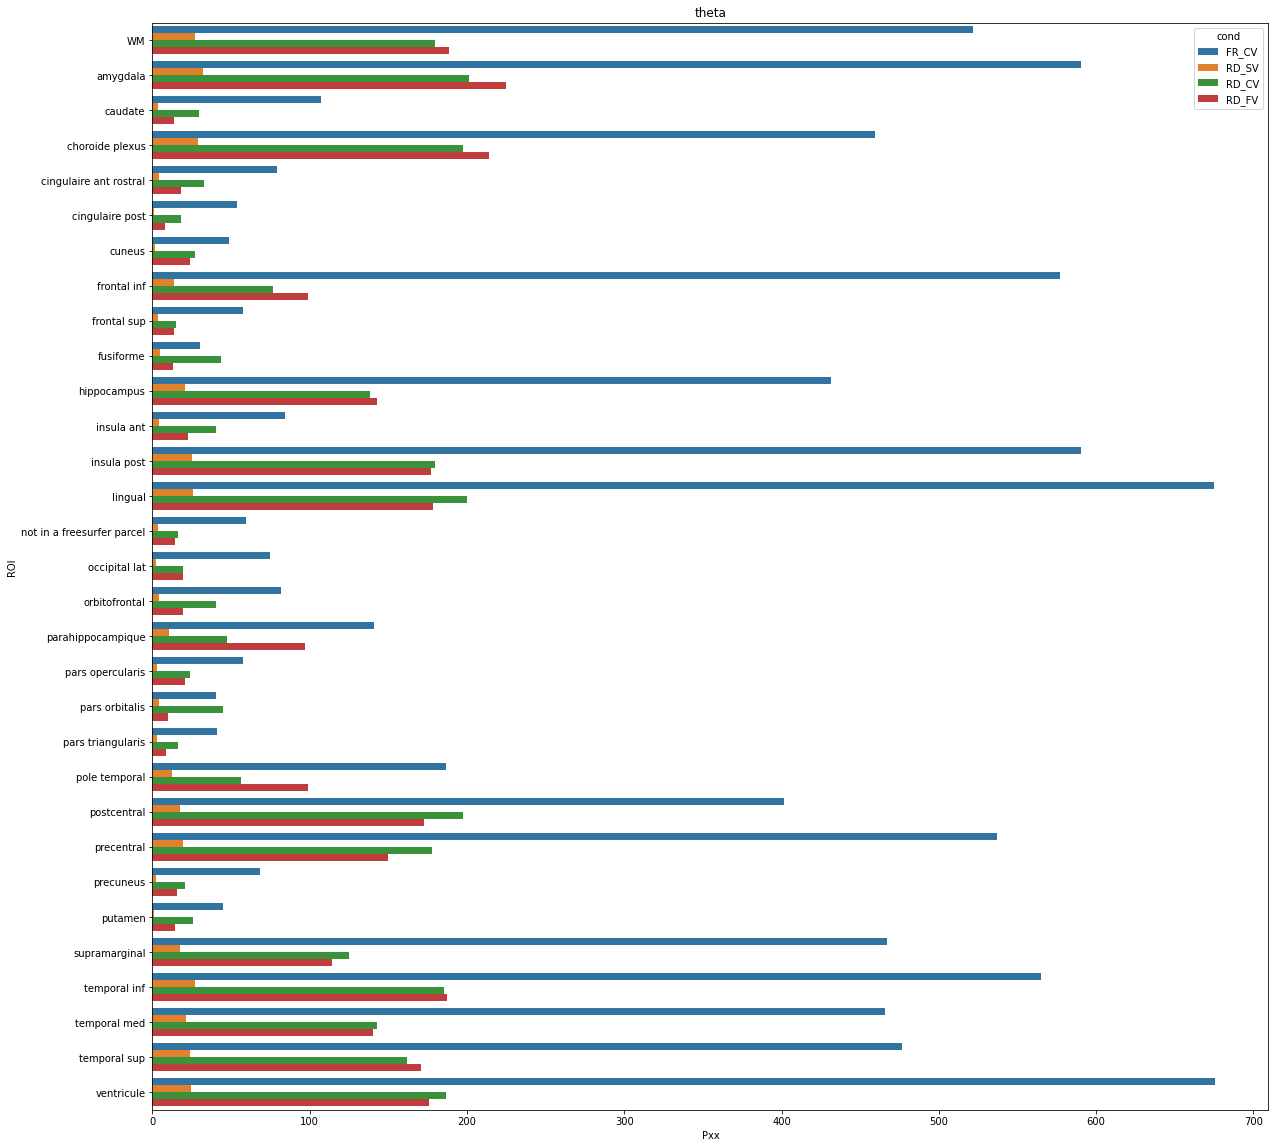

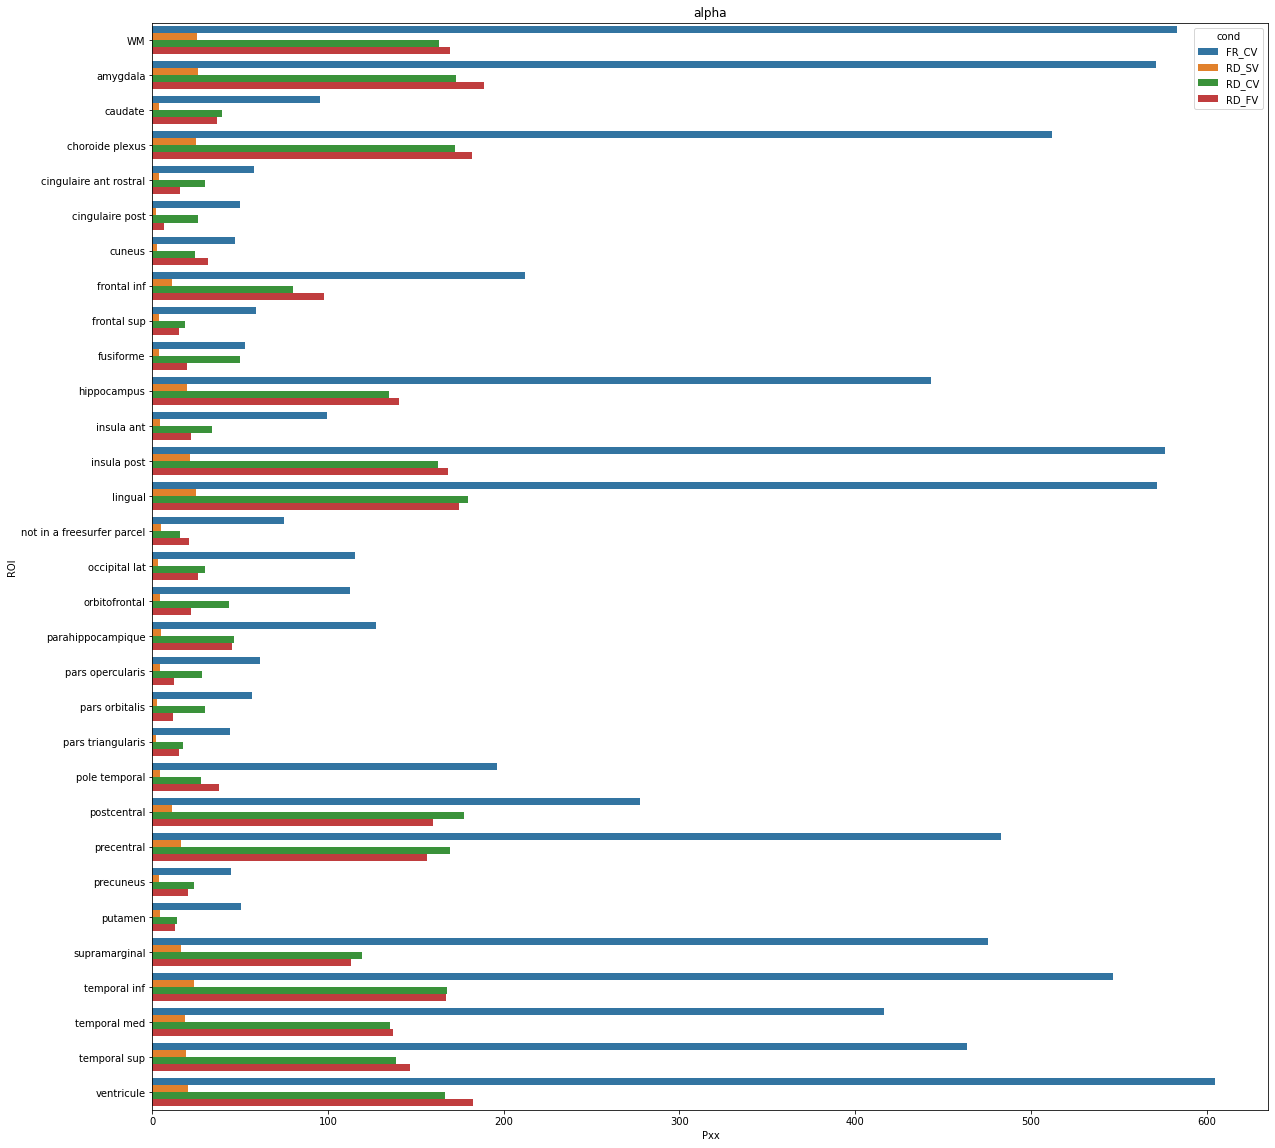

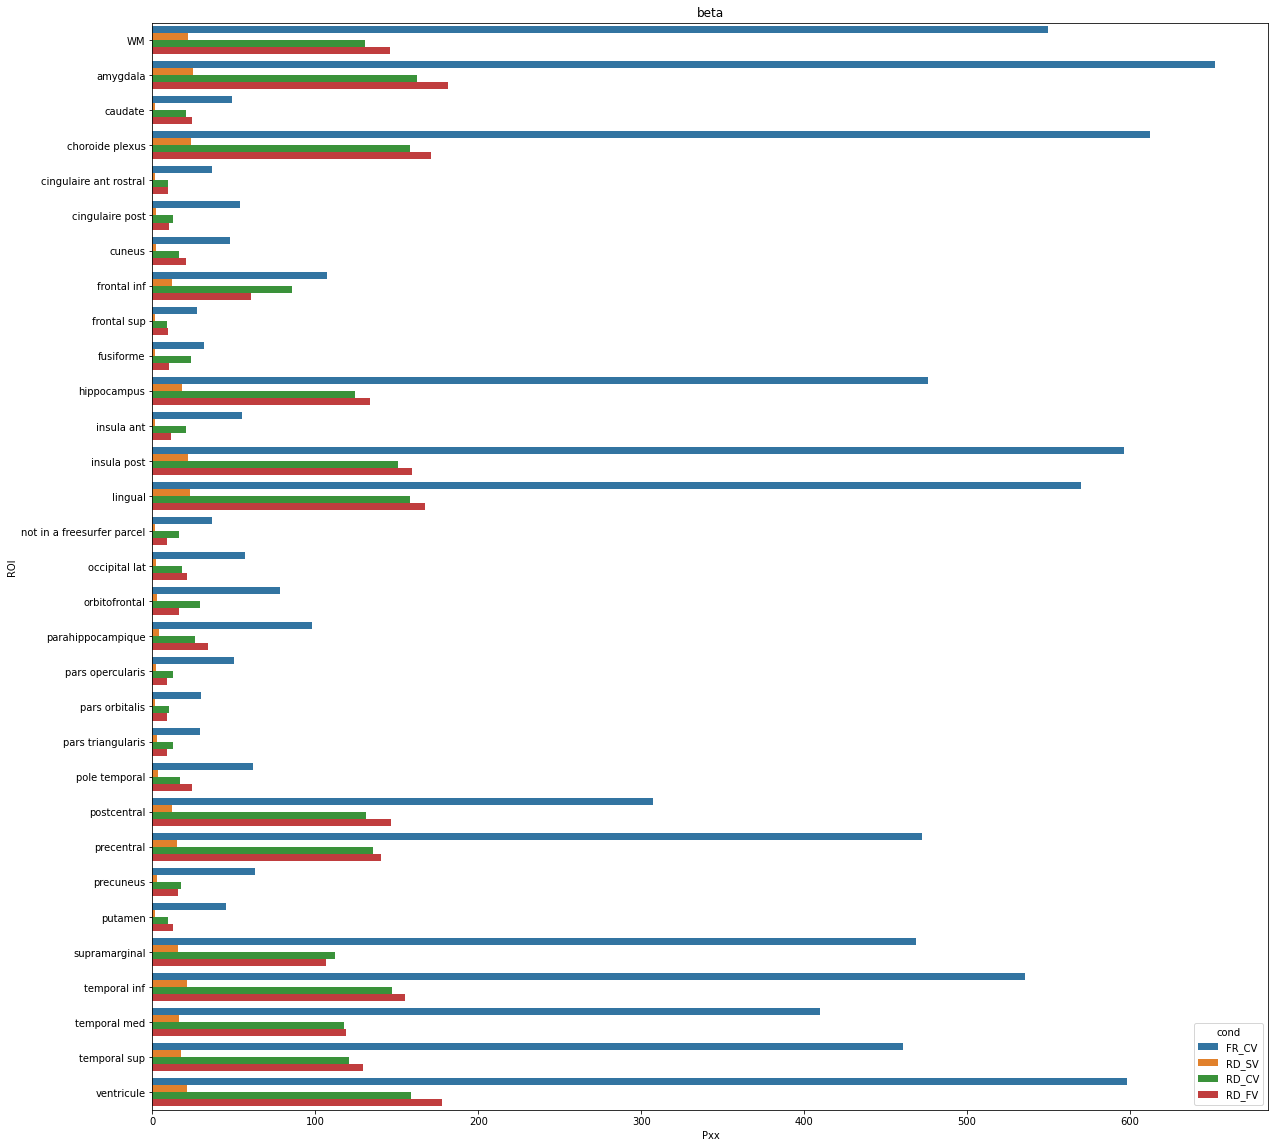

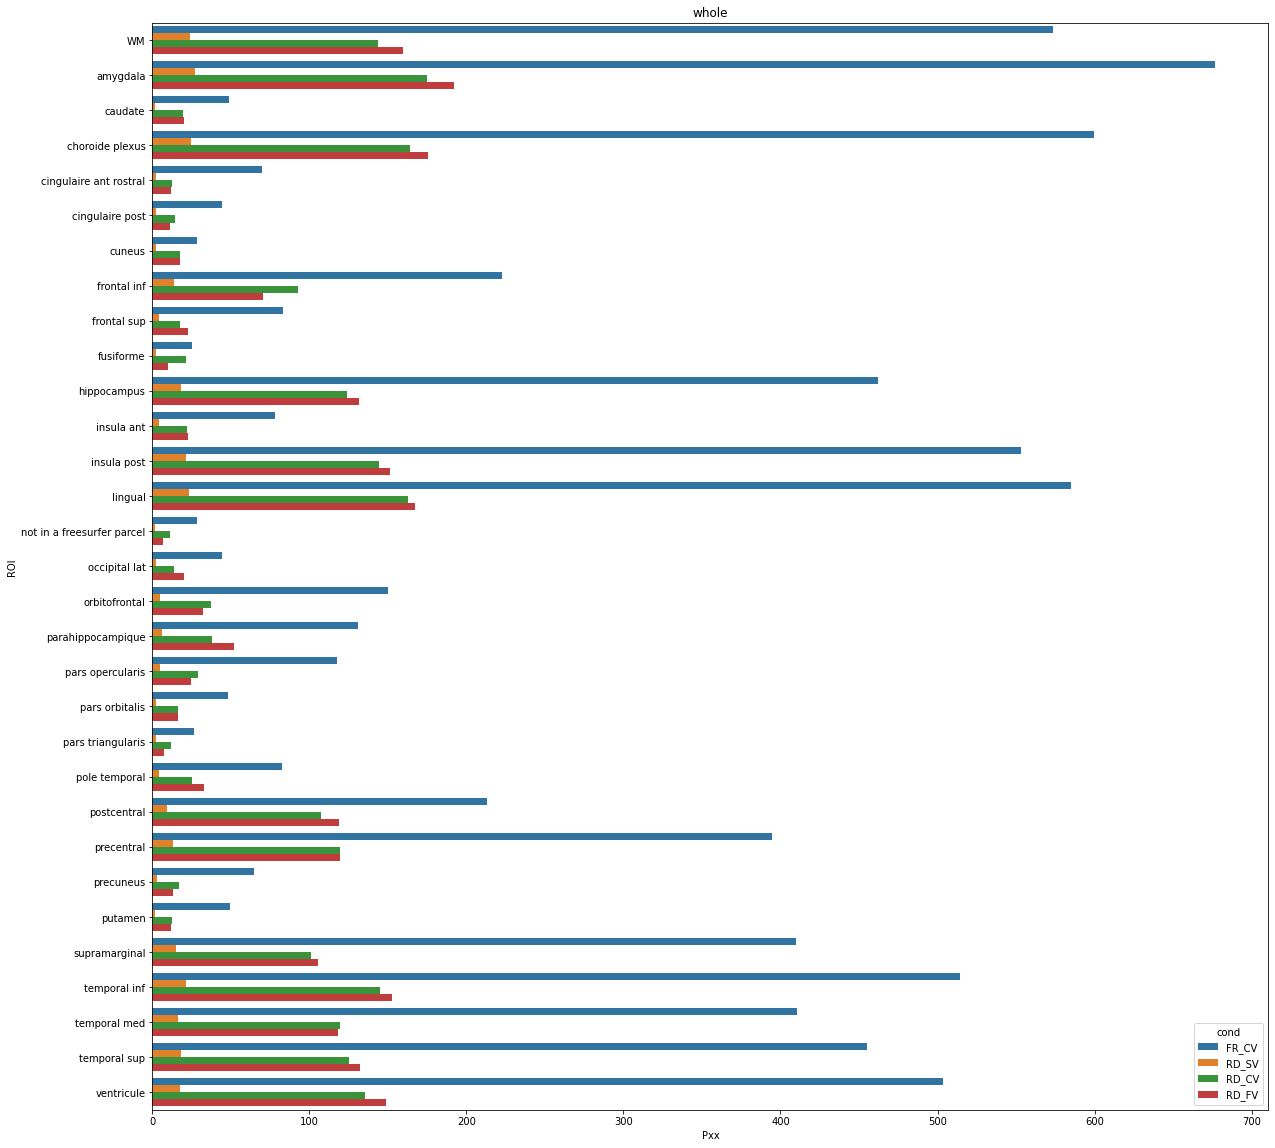

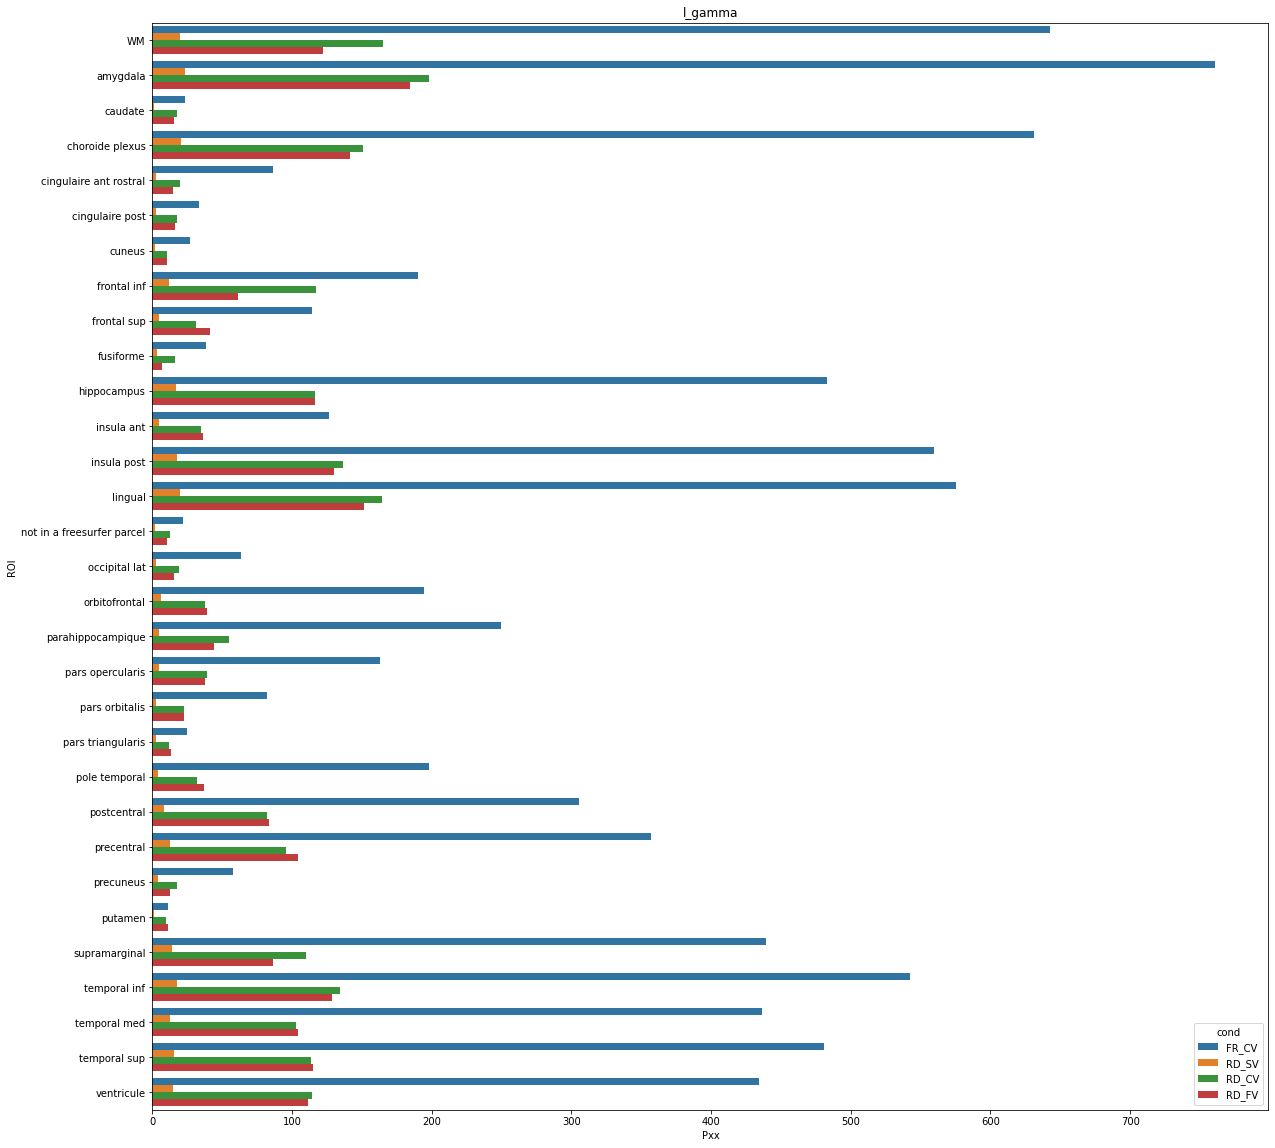

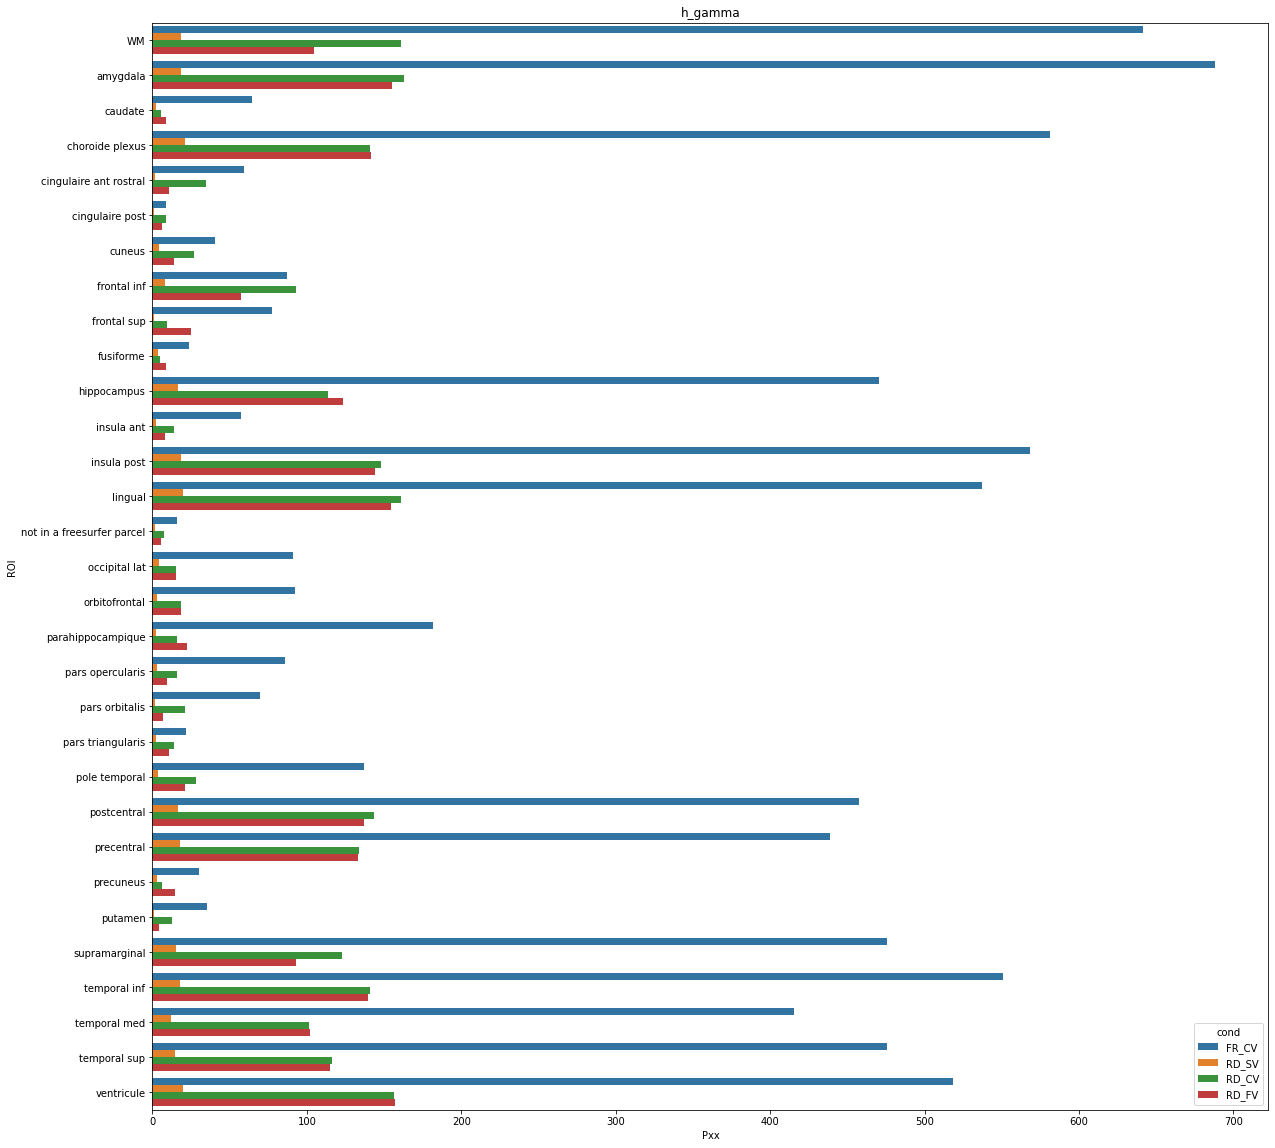

In [33]:

for band in df_TF_IE_all['band'].unique():
    fig, ax = plt.subplots(figsize = (20,20))
    sns.barplot(data=df_TF_IE_all[df_TF_IE_all['band'] == band].groupby(['cond','ROI']).std().reset_index(), y='ROI', x = 'Pxx', hue = 'cond', orient = 'h', ax=ax, hue_order = ['FR_CV','RD_SV','RD_CV','RD_FV'])
    # ax.bar_label(container=ax.containers[0], labels=mapper_n_rois.values())
    ax.set_title(band)
    plt.show()

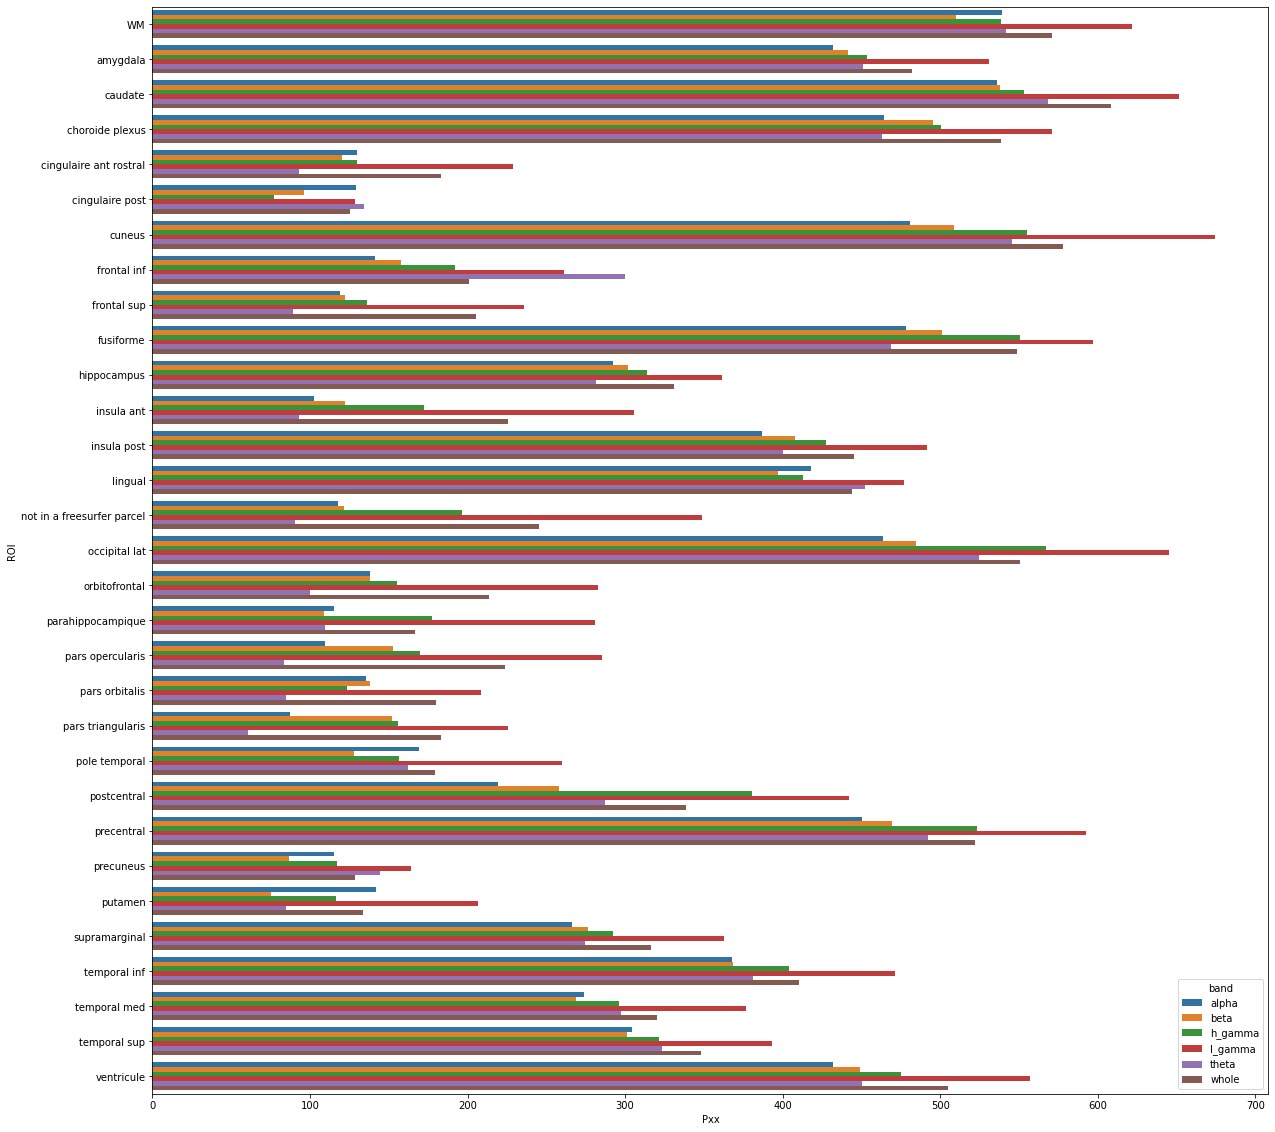

In [34]:
fig, ax = plt.subplots(figsize = (20,20))
sns.barplot(data=df_TF_IE_all.groupby(['band','ROI']).std().reset_index(), y='ROI', x = 'Pxx', hue = 'band', orient = 'h', ax=ax)
# ax.bar_label(container=ax.containers[0], labels=mapper_n_rois.values())
plt.show()

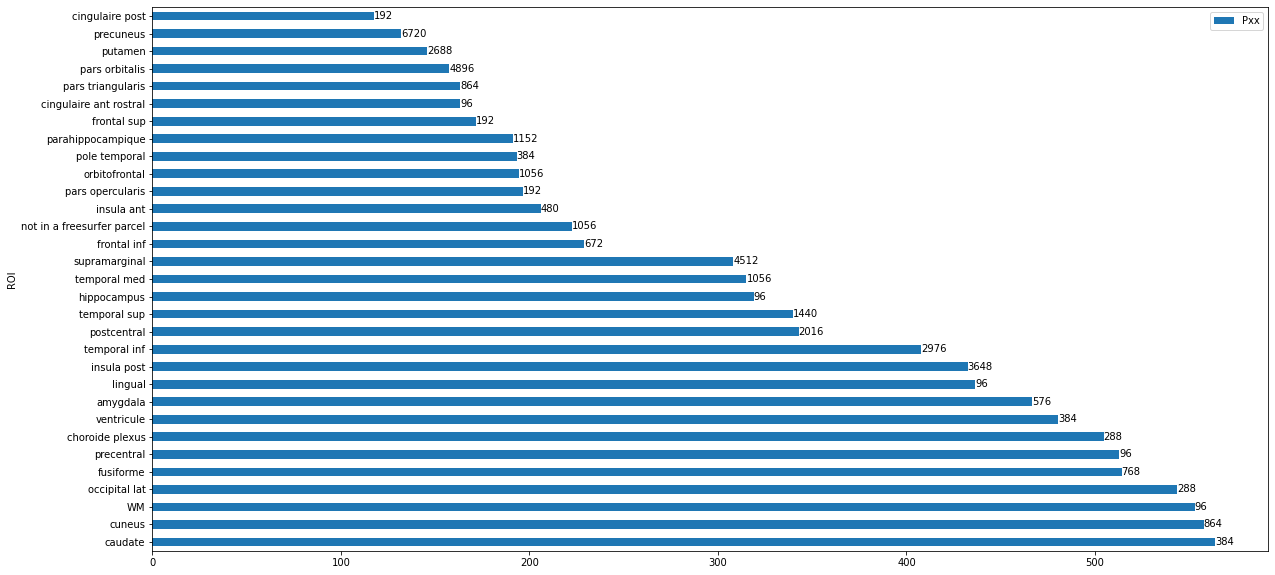

In [35]:
fig, ax = plt.subplots(figsize =(20,10))
df_TF_IE_all.groupby('ROI').std().sort_values('Pxx', ascending = False).plot.barh(ax=ax)
ax.bar_label(container=ax.containers[0], labels=mapper_n_rois.values())
plt.show()

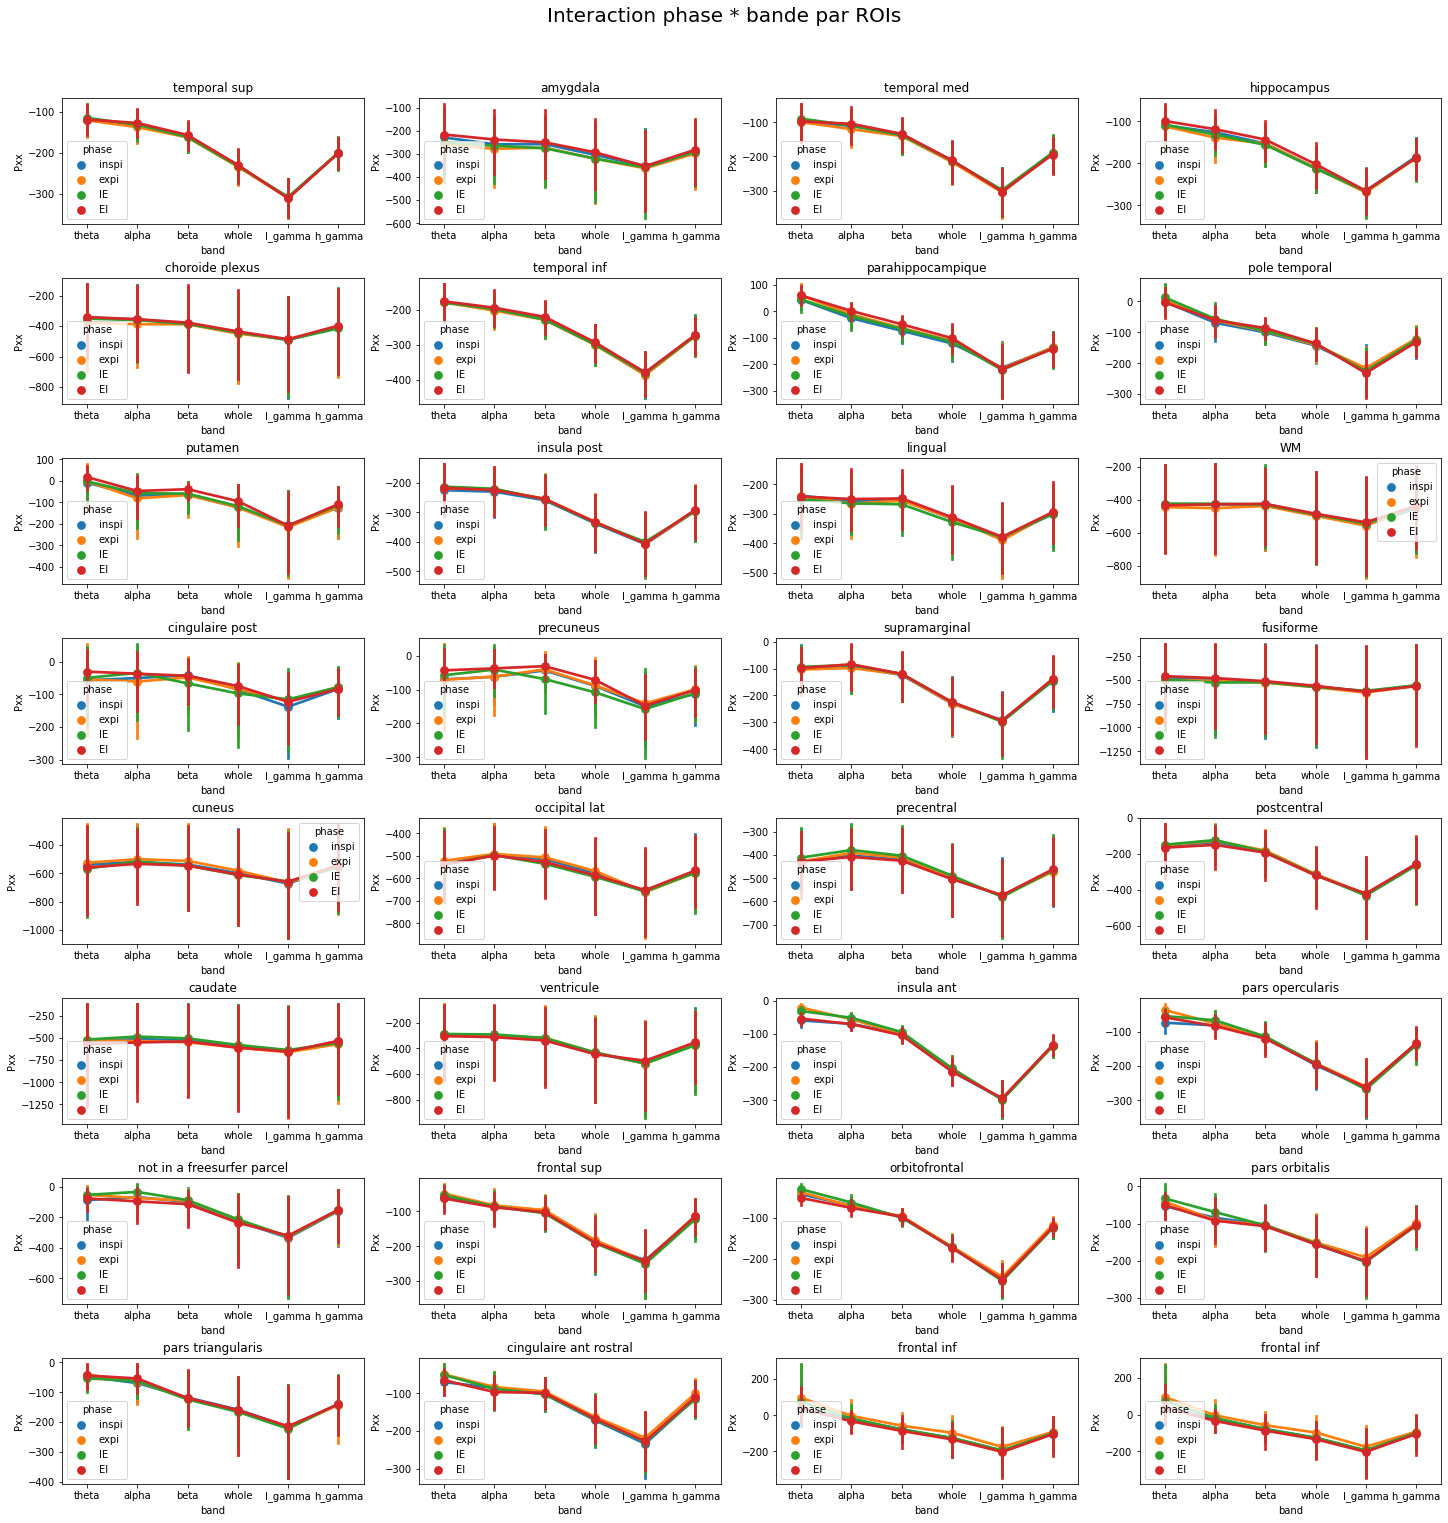

In [36]:
rois_to_test = np.append(df_TF_IE_all['ROI'].unique(), df_TF_IE_all['ROI'].unique()[-1])
rois_to_test = rois_to_test.reshape(8,4)
fig, axs = plt.subplots(nrows = 8, ncols = 4, figsize = (20,20), constrained_layout = True)
fig.suptitle('Interaction phase * bande par ROIs', fontsize = 20, y = 1.05)
for row, sublist in enumerate(rois_to_test):
    for col, roi in enumerate(sublist):
        ax = axs[row,col]
        sns.pointplot(data=df_TF_IE_all[df_TF_IE_all['ROI'] == roi] , x = 'band', y = 'Pxx', hue = 'phase', kind = 'point',ax=ax)
        ax.set_title(roi)


## FR CV

In [37]:
df_TF_IE_FR_CV = df_TF_IE.query("cond == 'FR_CV'")

<AxesSubplot:title={'center':'Effect of phase on Pxx : ns \n N = 15 subjects * 4 groups (*12 trial/group) \n friedman : p-0.9319'}, xlabel='phase', ylabel='Pxx'>

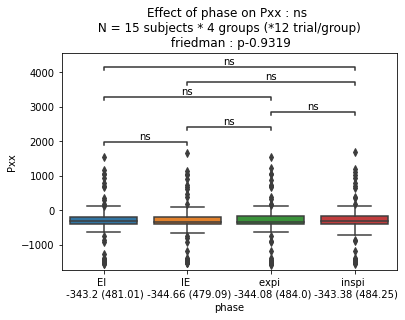

In [38]:
gh.auto_stats(df=df_TF_IE_FR_CV.groupby(['sujet','phase','ROI']).mean().reset_index(), predictor = 'phase', outcome = 'Pxx', subject ='sujet', transform = False)

In [39]:
gh.auto_stats(df=df_TF_IE_FR_CV, predictor = ['band','phase'], outcome = outcome, subject = 'sujet', design = 'within')

/home/valentin.ghibaudo/.virtualenvs/py38_nodegpu/lib/python3.8/site-packages/pingouin/distribution.py:486: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(


<AxesSubplot:title={'center':'Effect of band * phase on Pxx : ns \n rm_anova : pcorr-0.436, np2 : 0.045 (S) \n p-band-0.0 , p-phase-0.994'}, xlabel='band', ylabel='Pxx'>

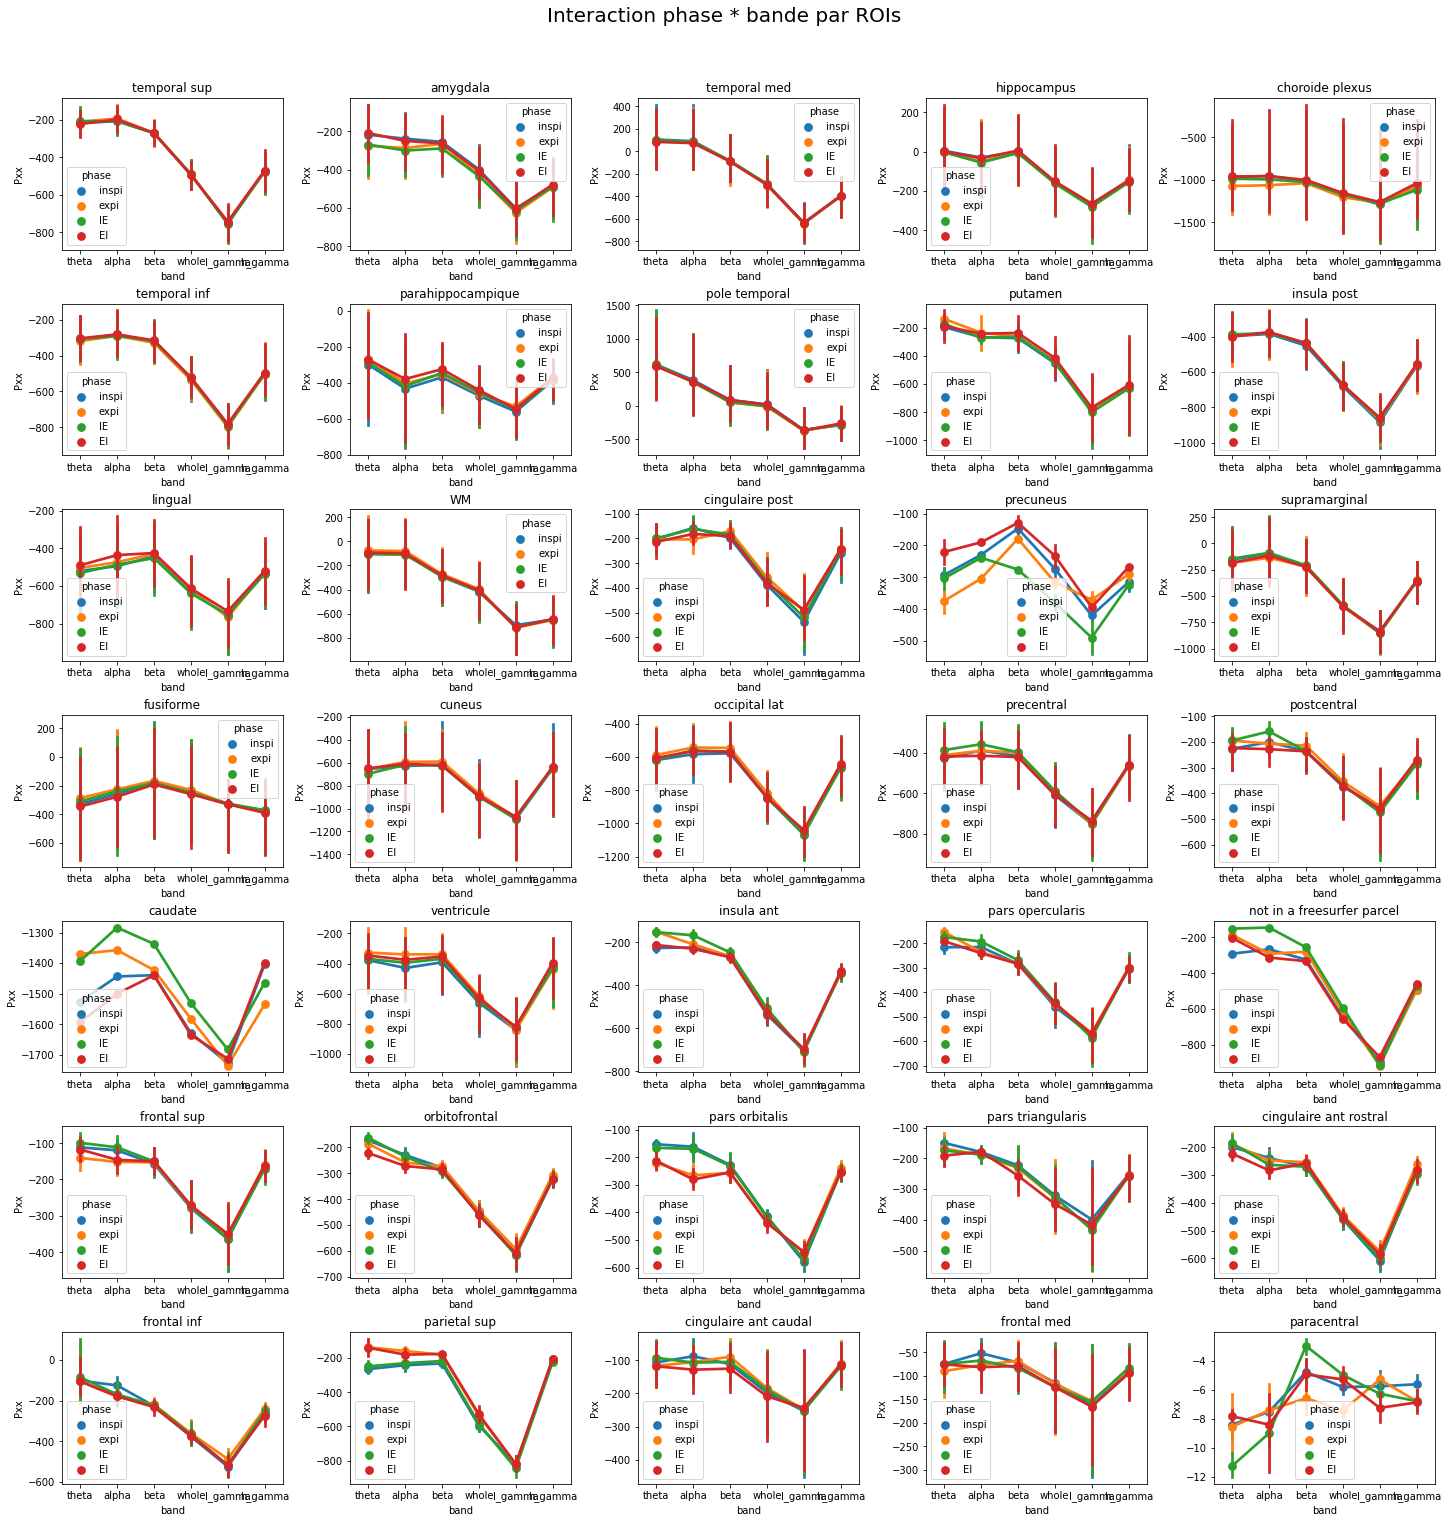

In [40]:
rois_to_test = df_TF_IE_FR_CV['ROI'].unique()
rois_to_test = rois_to_test.reshape(7,5)
fig, axs = plt.subplots(nrows = 7, ncols = 5, figsize = (20,20), constrained_layout = True)
fig.suptitle('Interaction phase * bande par ROIs', fontsize = 20, y = 1.05)
for row, sublist in enumerate(rois_to_test):
    for col, roi in enumerate(sublist):
        ax = axs[row,col]
        sns.pointplot(data=df_TF_IE_FR_CV[df_TF_IE_FR_CV['ROI'] == roi] , x = 'band', y = 'Pxx', hue = 'phase', kind = 'point',ax=ax)
        ax.set_title(roi)

# DFC on graphs

In [41]:
file = folder + 'allplot_df_graph_DFC.xlsx'
df_DFC = pd.read_excel(file, index_col = 0)

In [42]:
metrics = df_DFC['metric'].unique()
outcomes = ['CPL','GE','SWN']
phases = df_DFC['phase'].unique()

## ALL CONDITIONS

In [43]:
df_DFC_all = df_DFC[df_DFC['sujet'].isin(sujets_lyon)]
df_DFC_all = df_DFC[~df_DFC['cond'].isin(['RD_AV','FR_MV'])]

In [44]:
predictors = ['cond','band','phase']

In [45]:
df_DFC_all

sujet   cond     band metric  phase       CPL        GE  \
0             CHEe  RD_CV     beta   ispc  inspi  1.552381  0.742857   
1             CHEe  RD_CV     beta   ispc   expi  1.561905  0.741270   
2             CHEe  RD_CV     beta   wpli  inspi  1.514286  0.749206   
3             CHEe  RD_CV     beta   wpli   expi  1.504762  0.750794   
4             CHEe  RD_CV  l_gamma   ispc  inspi  1.514286  0.749206   
..             ...    ...      ...    ...    ...       ...       ...   
7   pat_03138_1601  FR_CV  l_gamma   wpli   expi  1.555556  0.740741   
8   pat_03138_1601  FR_CV  h_gamma   ispc  inspi  1.527778  0.745370   
9   pat_03138_1601  FR_CV  h_gamma   ispc   expi  1.527778  0.745370   
10  pat_03138_1601  FR_CV  h_gamma   wpli  inspi  1.500000  0.750000   
11  pat_03138_1601  FR_CV  h_gamma   wpli   expi  1.555556  0.740741   

         SWN  Unnamed: 0  
0  -0.083549           0  
1  -0.120183           0  
2  -0.069846           0  
3   0.011383           0  
4  -0.001391           0  
..       ...         ...  
7  -0.048929           0  
8   0.005455           0  
9  -0.172468           0  
10  0.090613           0  
11 -0.064181           0  

[216 rows x 9 columns]

In [46]:
df_DFC_all.groupby(['metric','phase']).mean()

CPL        GE       SWN  Unnamed: 0
metric phase                                          
ispc   expi   1.516021  0.752026 -0.014625         0.0
       inspi  1.514176  0.752642  0.013133         0.0
wpli   expi   1.523933  0.747973  0.002480         0.0
       inspi  1.514734  0.751005  0.003149         0.0

In [47]:
df_DFC_all.groupby(['metric','phase']).std()

CPL        GE       SWN  Unnamed: 0
metric phase                                          
ispc   expi   0.050167  0.018979  0.084010         0.0
       inspi  0.046798  0.018005  0.068952         0.0
wpli   expi   0.047362  0.015310  0.162208         0.0
       inspi  0.045949  0.015114  0.092094         0.0

In [48]:
df_DFC_all.groupby('band').mean()

CPL        GE       SWN  Unnamed: 0
band                                             
beta     1.521634  0.749842 -0.012567         0.0
h_gamma  1.514682  0.751543  0.017530         0.0
l_gamma  1.515333  0.751348 -0.001860         0.0

In [49]:
df_DFC_all.groupby('cond').mean()

CPL        GE       SWN  Unnamed: 0
cond                                           
FR_CV  1.516850  0.751407  0.002843         0.0
RD_CV  1.525397  0.747421 -0.008877         0.0
RD_FV  1.516667  0.748810 -0.008727         0.0
RD_SV  1.515079  0.749074 -0.006430         0.0

In [50]:
fig , axs = plt.subplots(nrows = len(metrics), ncols = len(outcomes), figsize = (20,10))
for row, metric in enumerate(metrics):
    for col, outcome in enumerate(outcomes):
        ax = axs[row, col]
        sns.pointplot(data=df_DFC_all[df_DFC_all['metric'] == metric], x = 'cond', y = outcome, ax=ax, hue = 'band')
        # gh.auto_stats(df=df_DFC_all[df_DFC_all['metric'] == metric], predictor = 'cond', outcome = outcome, ax=ax, subject = 'sujet')
        ax.set_title(f'Connectivity metric : {metric} , Graph metric : {outcome}')

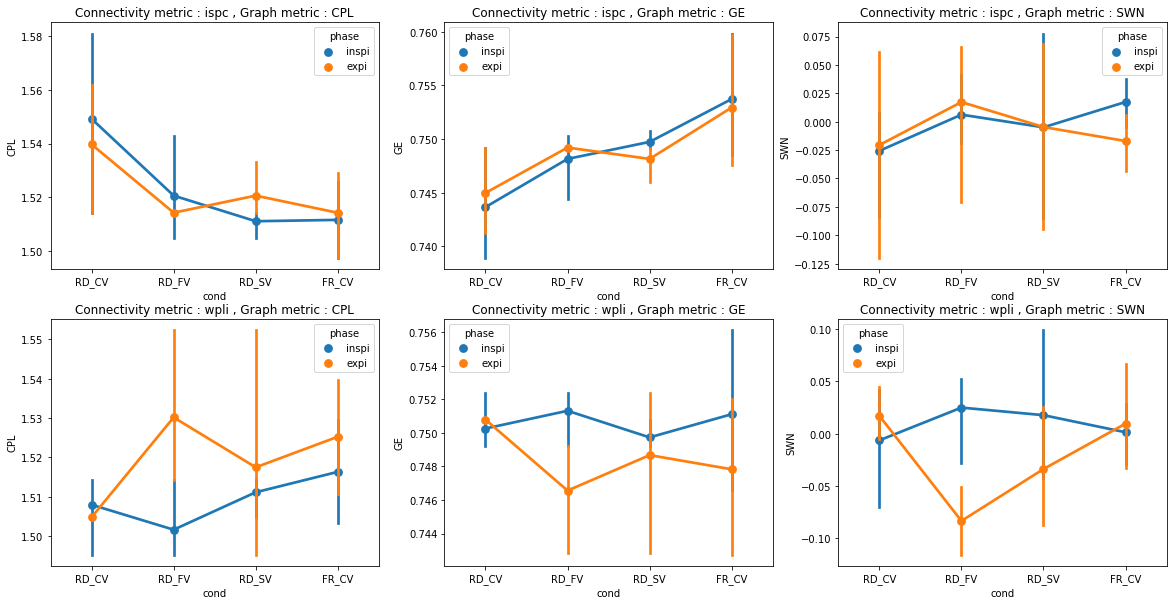

In [51]:
fig , axs = plt.subplots(nrows = len(metrics), ncols = len(outcomes), figsize = (20,10))
for row, metric in enumerate(metrics):
    for col, outcome in enumerate(outcomes):
        ax = axs[row, col]
        sns.pointplot(data=df_DFC_all[df_DFC_all['metric'] == metric], x = 'cond', y = outcome, ax=ax, hue = 'phase')
        # gh.auto_stats(df=df_DFC_all[df_DFC_all['metric'] == metric], predictor = 'cond', outcome = outcome, ax=ax, subject = 'sujet')
        ax.set_title(f'Connectivity metric : {metric} , Graph metric : {outcome}')

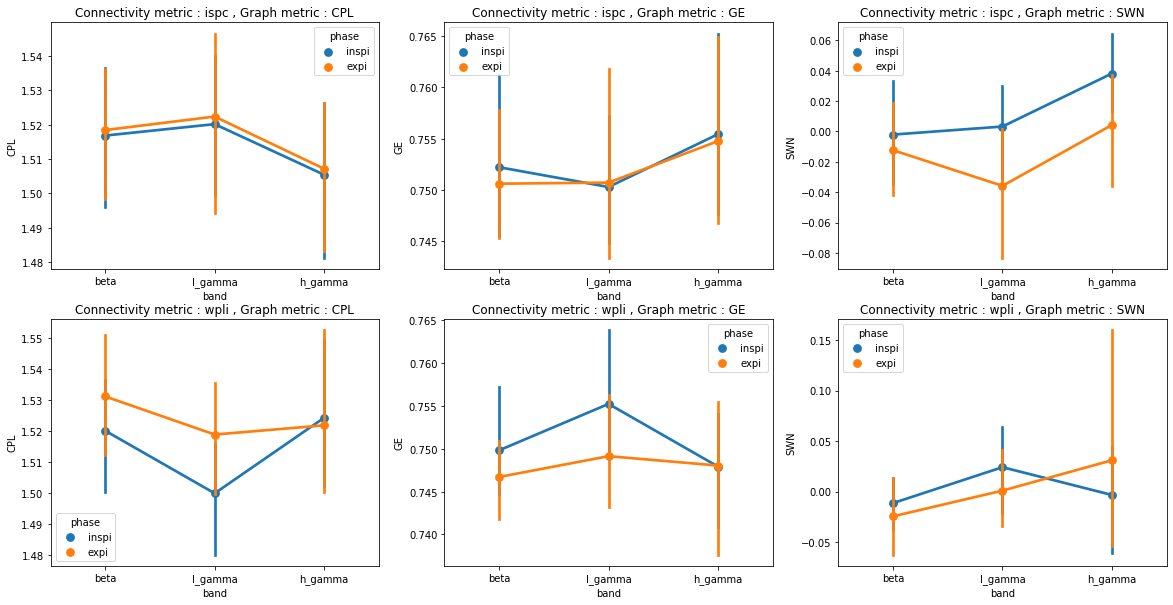

In [52]:
fig , axs = plt.subplots(nrows = len(metrics), ncols = len(outcomes), figsize = (20,10))
for row, metric in enumerate(metrics):
    for col, outcome in enumerate(outcomes):
        ax = axs[row, col]
        sns.pointplot(data=df_DFC_all[df_DFC_all['metric'] == metric], x = 'band', y = outcome, ax=ax, hue = 'phase')
        # gh.auto_stats(df=df_DFC_all[df_DFC_all['metric'] == metric], predictor = 'cond', outcome = outcome, ax=ax, subject = 'sujet')
        ax.set_title(f'Connectivity metric : {metric} , Graph metric : {outcome}')

## FR CV

In [53]:
df_DFC_FR_CV = df_DFC[df_DFC['cond'] == 'FR_CV']

In [54]:
df_DFC_FR_CV

sujet   cond     band metric  phase       CPL        GE  \
36            CHEe  FR_CV     beta   ispc  inspi  1.542857  0.744444   
37            CHEe  FR_CV     beta   ispc   expi  1.514286  0.749206   
38            CHEe  FR_CV     beta   wpli  inspi  1.533333  0.746032   
39            CHEe  FR_CV     beta   wpli   expi  1.523810  0.747619   
40            CHEe  FR_CV  l_gamma   ispc  inspi  1.523810  0.747619   
..             ...    ...      ...    ...    ...       ...       ...   
7   pat_03138_1601  FR_CV  l_gamma   wpli   expi  1.555556  0.740741   
8   pat_03138_1601  FR_CV  h_gamma   ispc  inspi  1.527778  0.745370   
9   pat_03138_1601  FR_CV  h_gamma   ispc   expi  1.527778  0.745370   
10  pat_03138_1601  FR_CV  h_gamma   wpli  inspi  1.500000  0.750000   
11  pat_03138_1601  FR_CV  h_gamma   wpli   expi  1.555556  0.740741   

         SWN  Unnamed: 0  
36 -0.096418           0  
37 -0.053109           0  
38 -0.050328           0  
39 -0.036402           0  
40  0.024353           0  
..       ...         ...  
7  -0.048929           0  
8   0.005455           0  
9  -0.172468           0  
10  0.090613           0  
11 -0.064181           0  

[180 rows x 9 columns]

In [55]:
df_DFC_FR_CV.groupby(['metric','phase']).mean()

CPL        GE       SWN  Unnamed: 0
metric phase                                          
ispc   expi   1.514251  0.752942 -0.017021         0.0
       inspi  1.511615  0.753734  0.017386         0.0
wpli   expi   1.525228  0.747832  0.009648         0.0
       inspi  1.516305  0.751118  0.001360         0.0

In [56]:
df_DFC_FR_CV.groupby(['metric','phase']).std()

CPL        GE       SWN  Unnamed: 0
metric phase                                          
ispc   expi   0.054378  0.020668  0.086335         0.0
       inspi  0.049740  0.019494  0.071553         0.0
wpli   expi   0.051080  0.016731  0.175285         0.0
       inspi  0.050124  0.016572  0.098345         0.0

In [57]:
df_DFC_FR_CV.groupby('band').mean()

CPL        GE       SWN  Unnamed: 0
band                                             
beta     1.520564  0.750393 -0.002997         0.0
h_gamma  1.513967  0.752130  0.014517         0.0
l_gamma  1.516018  0.751697 -0.002991         0.0

In [58]:
fig , axs = plt.subplots(nrows = len(metrics), ncols = len(outcomes), figsize = (20,10))
for row, metric in enumerate(metrics):
    for col, outcome in enumerate(outcomes):
        ax = axs[row, col]
        sns.pointplot(data=df_DFC_FR_CV[df_DFC_FR_CV['metric'] == metric], x = 'band', y = outcome, ax=ax, hue = 'phase')
        # gh.auto_stats(df=df_DFC_all[df_DFC_all['metric'] == metric], predictor = 'cond', outcome = outcome, ax=ax, subject = 'sujet')
        ax.set_title(f'Connectivity metric : {metric} , Graph metric : {outcome}')

# Cxy & MVL

In [59]:
file = folder + 'allplot_df_Cxy_MVL.xlsx'
df_Cxy_MVL = pd.read_excel(file, index_col = 0)

In [60]:
df_Cxy_MVL.groupby('cond').mean()

Cxy  Cxy_surr       MVL  MVL_surr  Unnamed: 0
cond                                                     
FR_CV  0.074351  0.117071  0.028008  0.022588         0.0
FR_MV  0.079277  0.125373  0.024142  0.024758         0.0
RD_AV  0.182949  0.154197  0.055354  0.043471         0.0
RD_CV  0.266351  0.220602  0.050480  0.037319         0.0
RD_FV  0.172742  0.208635  0.029763  0.023542         0.0
RD_SV  0.268290  0.198279  0.078662  0.053533         0.0

## ALL CONDITIONS

In [61]:
df_Cxy_MVL_all = df_Cxy_MVL[df_Cxy_MVL['sujet'].isin(sujets_lyon)]
df_Cxy_MVL_all = df_Cxy_MVL_all[~df_Cxy_MVL_all['cond'].isin(['RD_AV','FR_MV'])]

In [62]:
df_Cxy_MVL_all

sujet   cond  chan            ROI      Lobe side       Cxy  Cxy_surr  \
0    CHEe  RD_CV  Jp01   temporal sup  Temporal    l  0.720013  0.448422   
1    CHEe  RD_FV  Jp01   temporal sup  Temporal    l  0.214337  0.380704   
2    CHEe  RD_SV  Jp01   temporal sup  Temporal    l  0.254402  0.553074   
3    CHEe  FR_CV  Jp01   temporal sup  Temporal    l  0.008184  0.103029   
4    CHEe  RD_CV  Jp02   temporal sup  Temporal    l  0.252375  0.311441   
..    ...    ...   ...            ...       ...  ...       ...       ...   
724  TREt  FR_CV  Up11  orbitofrontal   Frontal    l  0.126685  0.143124   
726  TREt  RD_CV  Up12  orbitofrontal   Frontal    l  0.235077  0.102791   
727  TREt  RD_FV  Up12  orbitofrontal   Frontal    l  0.002413  0.180108   
728  TREt  RD_SV  Up12  orbitofrontal   Frontal    l  0.429879  0.089461   
730  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  0.148544  0.074451   

          MVL  MVL_surr  Unnamed: 0  
0    0.027640  0.044124           0  
1    0.018422  0.020761           0  
2    0.029524  0.080566           0  
3    0.009107  0.029803           0  
4    0.025750  0.024501           0  
..        ...       ...         ...  
724  0.051776  0.027313           0  
726  0.086100  0.061606           0  
727  0.014745  0.022803           0  
728  0.228471  0.086881           0  
730  0.072936  0.036866           0  

[1676 rows x 11 columns]

In [63]:
df_Cxy_MVL_all.groupby(['sujet','cond','ROI']).mean().reset_index()

sujet   cond                ROI       Cxy  Cxy_surr       MVL  MVL_surr  \
0    CHEe  FR_CV                 WM  0.255001  0.361776  0.021975  0.030839   
1    CHEe  FR_CV           amygdala  0.177218  0.239960  0.042793  0.026780   
2    CHEe  FR_CV    choroide plexus  0.054924  0.265610  0.022931  0.023329   
3    CHEe  FR_CV    cingulaire post  0.429220  0.290011  0.044462  0.023966   
4    CHEe  FR_CV        hippocampus  0.204209  0.260140  0.038626  0.026165   
..    ...    ...                ...       ...       ...       ...       ...   
239  TREt  RD_SV  pars triangularis  0.113328  0.094651  0.153713  0.101494   
240  TREt  RD_SV      pole temporal  0.199428  0.176665  0.114728  0.063076   
241  TREt  RD_SV       temporal inf  0.201069  0.135956  0.110322  0.062081   
242  TREt  RD_SV       temporal med  0.098503  0.140878  0.050997  0.043246   
243  TREt  RD_SV       temporal sup  0.136815  0.117222  0.063662  0.046424   

     Unnamed: 0  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
..          ...  
239         0.0  
240         0.0  
241         0.0  
242         0.0  
243         0.0  

[244 rows x 8 columns]

/home/valentin.ghibaudo/.virtualenvs/py38_nodegpu/lib/python3.8/site-packages/pingouin/distribution.py:977: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d) ** d


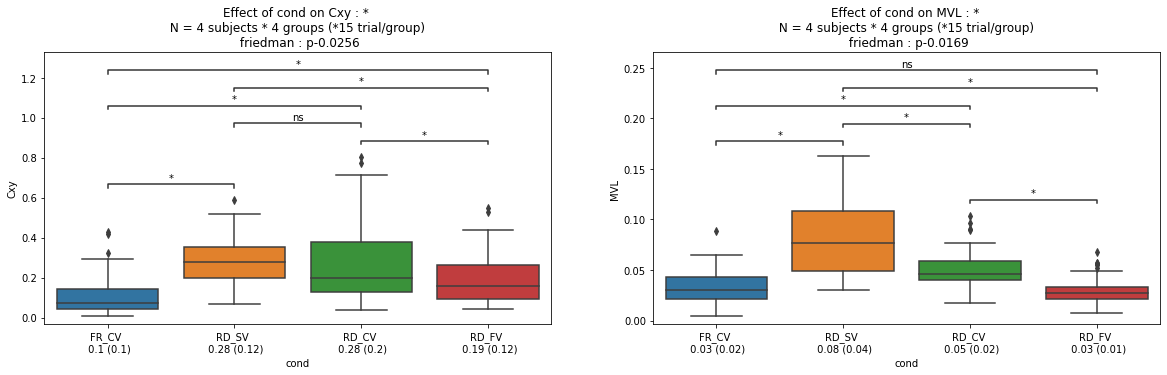

In [64]:
fig, axs = plt.subplots(ncols = 2, figsize = (20,5))
for col, outcome in enumerate(['Cxy','MVL']):
    ax = axs[col]
    gh.auto_stats(df=df_Cxy_MVL_all.groupby(['sujet','cond','ROI']).mean().reset_index(), predictor = 'cond', outcome = outcome, subject = 'sujet', transform = False, ax=ax, order = ['FR_CV','RD_SV','RD_CV','RD_FV'])
if savefig:
    plt.savefig(folder + 'figures_stats/cond_effect_on_cxy_mvl', bbox_inches = 'tight')
plt.show()

/home/valentin.ghibaudo/.virtualenvs/py38_nodegpu/lib/python3.8/site-packages/pingouin/distribution.py:977: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d) ** d


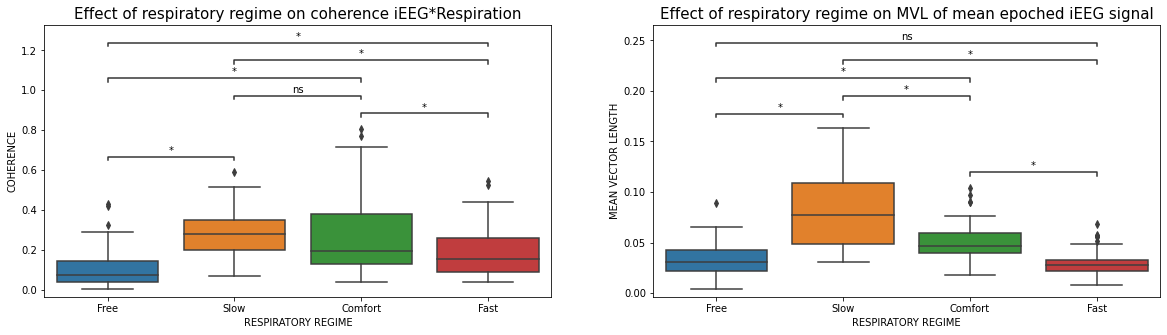

In [65]:
if savefig_for_csid_val:
    fig, axs = plt.subplots(ncols = 2, figsize = (20,5))
    for col, outcome in enumerate(['Cxy','MVL']):
        ax = axs[col]
        gh.auto_stats(df=df_Cxy_MVL_all.groupby(['sujet','cond','ROI']).mean().reset_index(), predictor = 'cond', outcome = outcome, subject = 'sujet', transform = False, ax=ax, order = ['FR_CV','RD_SV','RD_CV','RD_FV'])
        ax.set_xticklabels(['Free','Slow','Comfort','Fast'])
        ax.set_xlabel('RESPIRATORY REGIME')
        if outcome == 'Cxy':
            ax.set_ylabel('COHERENCE')
            ax.set_title('Effect of respiratory regime on coherence iEEG*Respiration', fontsize = 15)
        elif outcome == 'MVL':
            ax.set_ylabel('MEAN VECTOR LENGTH')
            ax.set_title('Effect of respiratory regime on MVL of mean epoched iEEG signal', fontsize = 15)   
        
    plt.savefig(save_folder_csid_val + 'cxy_mvl', bbox_inches = 'tight', dpi = 300)
    plt.show()

In [66]:
df_Cxy_MVL_all = df_Cxy_MVL_all.reset_index(drop=True)

In [67]:
cxy_signif = []
MVL_signf = []
both_signif = []
for i in df_Cxy_MVL_all.index:
    if df_Cxy_MVL_all.loc[i, 'Cxy'] > df_Cxy_MVL_all.loc[i, 'Cxy_surr']:
        cxy_signif.append(1)
    else:
        cxy_signif.append(0)
        
    if df_Cxy_MVL_all.loc[i, 'MVL'] > df_Cxy_MVL_all.loc[i, 'MVL_surr']:
        MVL_signf.append(1)
    else:
        MVL_signf.append(0)
        
    if (df_Cxy_MVL_all.loc[i, 'MVL'] > df_Cxy_MVL_all.loc[i, 'MVL_surr']) and (df_Cxy_MVL_all.loc[i, 'Cxy'] > df_Cxy_MVL_all.loc[i, 'Cxy_surr']):
        both_signif.append(1)
    else:
        both_signif.append(0)
       
df_Cxy_MVL_all.insert(df_Cxy_MVL_all.shape[1], 'cxy_signif',   cxy_signif)
df_Cxy_MVL_all.insert(df_Cxy_MVL_all.shape[1], 'mvl_signif',   MVL_signf)
df_Cxy_MVL_all.insert(df_Cxy_MVL_all.shape[1], 'both_signif',   both_signif)

In [68]:
df_Cxy_MVL_all

sujet   cond  chan            ROI      Lobe side       Cxy  Cxy_surr  \
0     CHEe  RD_CV  Jp01   temporal sup  Temporal    l  0.720013  0.448422   
1     CHEe  RD_FV  Jp01   temporal sup  Temporal    l  0.214337  0.380704   
2     CHEe  RD_SV  Jp01   temporal sup  Temporal    l  0.254402  0.553074   
3     CHEe  FR_CV  Jp01   temporal sup  Temporal    l  0.008184  0.103029   
4     CHEe  RD_CV  Jp02   temporal sup  Temporal    l  0.252375  0.311441   
...    ...    ...   ...            ...       ...  ...       ...       ...   
1671  TREt  FR_CV  Up11  orbitofrontal   Frontal    l  0.126685  0.143124   
1672  TREt  RD_CV  Up12  orbitofrontal   Frontal    l  0.235077  0.102791   
1673  TREt  RD_FV  Up12  orbitofrontal   Frontal    l  0.002413  0.180108   
1674  TREt  RD_SV  Up12  orbitofrontal   Frontal    l  0.429879  0.089461   
1675  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  0.148544  0.074451   

           MVL  MVL_surr  Unnamed: 0  cxy_signif  mvl_signif  both_signif  
0     0.027640  0.044124           0           1           0            0  
1     0.018422  0.020761           0           0           0            0  
2     0.029524  0.080566           0           0           0            0  
3     0.009107  0.029803           0           0           0            0  
4     0.025750  0.024501           0           0           1            0  
...        ...       ...         ...         ...         ...          ...  
1671  0.051776  0.027313           0           0           1            0  
1672  0.086100  0.061606           0           1           1            1  
1673  0.014745  0.022803           0           0           0            0  
1674  0.228471  0.086881           0           1           1            1  
1675  0.072936  0.036866           0           1           1            1  

[1676 rows x 14 columns]

In [69]:
df_Cxy_MVL_all.groupby('cond').mean()

Cxy  Cxy_surr       MVL  MVL_surr  Unnamed: 0  cxy_signif  \
cond                                                                    
FR_CV  0.094461  0.132267  0.032390  0.025293         0.0    0.284010   
RD_CV  0.266351  0.220602  0.050480  0.037319         0.0    0.515513   
RD_FV  0.172742  0.208635  0.029763  0.023542         0.0    0.295943   
RD_SV  0.268290  0.198279  0.078662  0.053533         0.0    0.618138   

       mvl_signif  both_signif  
cond                            
FR_CV    0.594272     0.245823  
RD_CV    0.665871     0.443914  
RD_FV    0.603819     0.250597  
RD_SV    0.732697     0.572792

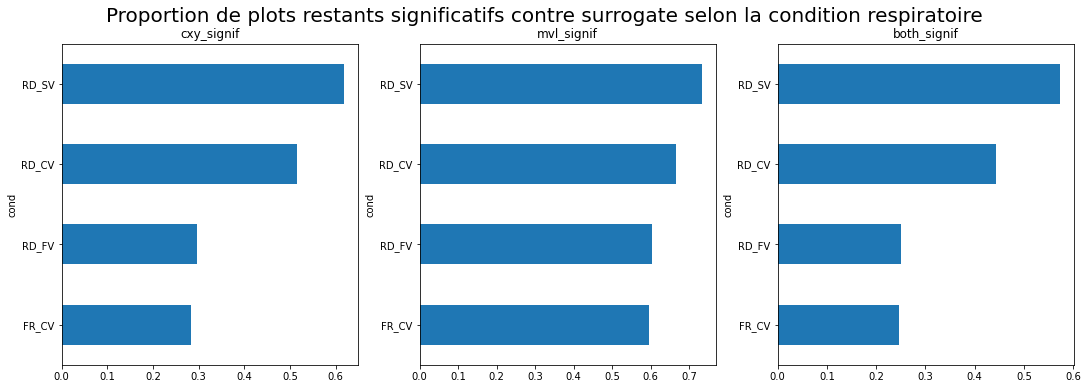

In [70]:
fig , axs = plt.subplots(ncols = 3, figsize = (15,5), constrained_layout = True)
fig.suptitle('Proportion de plots restants significatifs contre surrogate selon la condition respiratoire', fontsize = 20, y = 1.05)
for col, colname in enumerate(['cxy_signif','mvl_signif','both_signif']):
    ax = axs[col]
    (df_Cxy_MVL_all.groupby('cond').mean())[colname].sort_values(ascending = True).plot.barh(ax=ax)
    ax.set_title(colname)
if savefig:
    plt.savefig(folder + 'figures_stats/proportion_cxy_mvl_signif', bbox_inches = 'tight')


In [71]:
if savefig_for_csid_val:
    fig , axs = plt.subplots(ncols = 3, figsize = (15,5), constrained_layout = True)
    fig.suptitle('Proportion of electrode contacts modulated by respiration in each  respiratory regime condition', fontsize = 20, y = 1.06)
    for col, colname in enumerate(['cxy_signif','mvl_signif','both_signif']):
        ax = axs[col]
        (df_Cxy_MVL_all.groupby('cond').mean())[colname].sort_values(ascending = True).plot.barh(ax=ax)
        ax.set_yticklabels(['Free','Fast','Comfort','Slow'])
        ax.set_xlabel('Proportion')
        if colname == 'cxy_signif':
            ax.set_ylabel('RESPIRATORY REGIME')
            ax.set_title('Coherence')
        elif colname == 'mvl_signif':
            ax.set_title('Mean Vector Length')
            ax.set_ylabel(None)
        elif colname == 'both_signif':
            ax.set_title('Coherence & Mean Vector Length')
            ax.set_ylabel(None)
            

    plt.savefig(save_folder_csid_val + 'proportion_surro', bbox_inches = 'tight', dpi = 300)

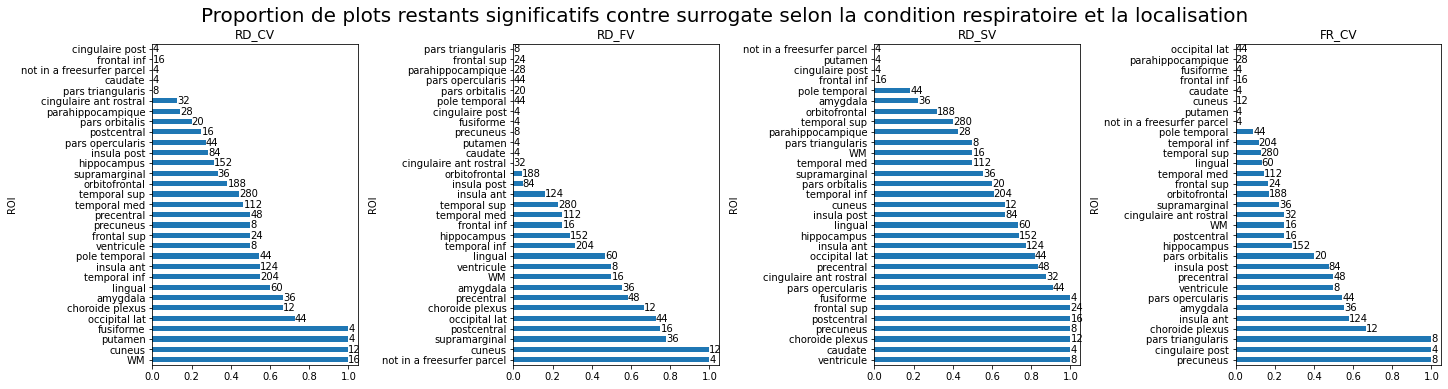

In [72]:
fig, axs = plt.subplots(ncols = 4, figsize = (20,5), constrained_layout = True)
fig.suptitle('Proportion de plots restants significatifs contre surrogate selon la condition respiratoire et la localisation', fontsize = 20, y = 1.05)
for col, cond in enumerate(df_Cxy_MVL_all['cond'].unique()):
    ax = axs[col]
    df_masked = df_Cxy_MVL_all[df_Cxy_MVL_all['cond'] == cond]
    sorted_prop_roi = (df_masked.groupby('ROI').mean())['both_signif'].sort_values(ascending = False)
    sorted_prop_roi.plot.barh(ax=ax)
    labels = labels = [df_Cxy_MVL_all['ROI'].value_counts()[roi] for roi in sorted_prop_roi.index]
    ax.bar_label(container=ax.containers[0], labels = labels)
    ax.set_title(cond)
if savefig:
    plt.savefig(folder + '/figures_stats/prop_loca_signif_all_cond', bbox_inches = 'tight')
plt.show()

In [73]:
fig, axs = plt.subplots(ncols = 4, figsize = (20,5), constrained_layout = True)
fig.suptitle('Proportion de plots restants significatifs contre surrogate selon la condition respiratoire et la localisation', fontsize = 20, y = 1.05)
for col, cond in enumerate(df_Cxy_MVL_all['cond'].unique()):
    ax = axs[col]
    df_masked = df_Cxy_MVL_all[df_Cxy_MVL_all['cond'] == cond]
    sorted_prop_roi = (df_masked.groupby('Lobe').mean())['both_signif'].sort_values(ascending = False)
    sorted_prop_roi.plot.barh(ax=ax)
    labels = labels = [df_Cxy_MVL_all['Lobe'].value_counts()[roi] for roi in sorted_prop_roi.index]
    ax.bar_label(container=ax.containers[0], labels = labels)
    ax.set_title(cond)
    ax.set_xlim(0,1)
plt.show()

In [74]:
mapper_n_rois = {roi:df_Cxy_MVL_all['ROI'].value_counts()[roi] for roi in df_Cxy_MVL_all.groupby(['ROI']).mean().index}

In [75]:
if savefig_for_csid_val:
    ser_n_rois = pd.DataFrame.from_dict(mapper_n_rois, orient = 'index').rename(columns={0:'n rois'})
    rois_assez_nombreuses = ser_n_rois[ser_n_rois['n rois'] > 30].index
    df_rois_assez_nombreuses = df_Cxy_MVL_all[df_Cxy_MVL_all['ROI'].isin(rois_assez_nombreuses)].groupby(['cond','ROI']).mean().reset_index()
    cond_labels = {'FR_CV':'Free','RD_CV':'Comfort','RD_SV':'Slow','RD_FV':'Fast'}
    col_conds_clean = [cond_labels[cond] for cond in df_rois_assez_nombreuses['cond']]
    df_rois_assez_nombreuses['Regime respi'] = col_conds_clean

    fig, ax = plt.subplots(figsize = (20,10))
    sns.barplot(data=df_rois_assez_nombreuses, x = 'ROI', y = 'both_signif', hue = 'Regime respi', ax=ax, hue_order = ['Free','Slow','Comfort','Fast'], orient = 'v')
    ax.set_xticklabels(labels = ax.get_xticklabels(), rotation=55)
    ax.set_ylabel('Proportion')
    ax.set_title('Proportion of electrode contacts modulated by respiration in each ROI in each respiratory regime condition', fontsize = 20)
    plt.savefig(save_folder_csid_val + 'surro_roi_detailed', bbox_inches = 'tight', dpi = 300)
    plt.show()

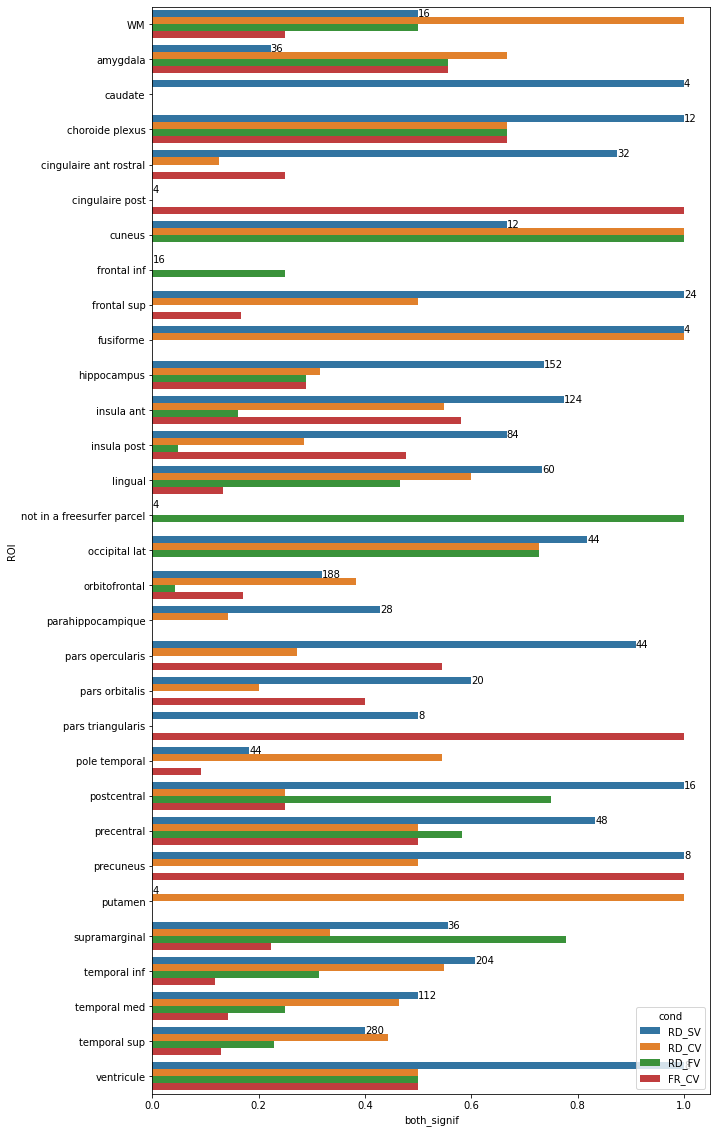

In [76]:
fig, ax = plt.subplots(figsize = (10,20))
sns.barplot(data=df_Cxy_MVL_all.groupby(['cond','ROI']).mean().reset_index(), x = 'both_signif', y = 'ROI', hue = 'cond', ax=ax, hue_order = ['RD_SV','RD_CV','RD_FV','FR_CV'], orient = 'h')
ax.bar_label(container=ax.containers[0], labels = mapper_n_rois.values())
plt.show()

## FR CV

In [77]:
file = folder + 'allplot_df_Cxy_MVL.xlsx'
df_Cxy_MVL = pd.read_excel(file, index_col = 0)

In [78]:
df_Cxy_MVL_FR_CV = df_Cxy_MVL[df_Cxy_MVL['cond'] == 'FR_CV'].reset_index(drop=True)

In [79]:
df_Cxy_MVL_FR_CV

sujet   cond    chan            ROI      Lobe side       Cxy  \
0               CHEe  FR_CV    Jp01   temporal sup  Temporal    l  0.008184   
1               CHEe  FR_CV    Jp02   temporal sup  Temporal    l  0.039253   
2               CHEe  FR_CV    Jp03   temporal sup  Temporal    l  0.078251   
3               CHEe  FR_CV    Jp04   temporal sup  Temporal    l  0.050689   
4               CHEe  FR_CV    Jp05   temporal sup  Temporal    l  0.002624   
...              ...    ...     ...            ...       ...  ...       ...   
1191  pat_03138_1601  FR_CV   TBp_8   temporal med  Temporal    l  0.016275   
1192  pat_03138_1601  FR_CV  TPol_1  pole temporal  Temporal    l  0.064685   
1193  pat_03138_1601  FR_CV  TPol_2  pole temporal  Temporal    l  0.058421   
1194  pat_03138_1601  FR_CV  TPol_3   temporal sup  Temporal    l  0.010375   
1195  pat_03138_1601  FR_CV  TPol_4   temporal sup  Temporal    l  0.014513   

      Cxy_surr       MVL  MVL_surr  Unnamed: 0  
0     0.103029  0.009107  0.029803           0  
1     0.093564  0.018437  0.019697           0  
2     0.104506  0.020076  0.018371           0  
3     0.112545  0.014718  0.013994           0  
4     0.183454  0.015732  0.014796           0  
...        ...       ...       ...         ...  
1191  0.036585  0.020047  0.023429           0  
1192  0.055704  0.019425  0.014099           0  
1193  0.099253  0.014120  0.013432           0  
1194  0.255779  0.009357  0.015933           0  
1195  0.150598  0.006268  0.017189           0  

[1196 rows x 11 columns]

In [80]:
cxy_signif = []
MVL_signf = []
both_signif = []
for i in df_Cxy_MVL_FR_CV.index:
    if df_Cxy_MVL_FR_CV.loc[i, 'Cxy'] > df_Cxy_MVL_FR_CV.loc[i, 'Cxy_surr']:
        cxy_signif.append(1)
    else:
        cxy_signif.append(0)
        
    if df_Cxy_MVL_FR_CV.loc[i, 'MVL'] > df_Cxy_MVL_FR_CV.loc[i, 'MVL_surr']:
        MVL_signf.append(1)
    else:
        MVL_signf.append(0)
        
    if (df_Cxy_MVL_FR_CV.loc[i, 'MVL'] > df_Cxy_MVL_FR_CV.loc[i, 'MVL_surr']) and (df_Cxy_MVL_FR_CV.loc[i, 'Cxy'] > df_Cxy_MVL_FR_CV.loc[i, 'Cxy_surr']):
        both_signif.append(1)
    else:
        both_signif.append(0)
       
df_Cxy_MVL_FR_CV.insert(df_Cxy_MVL_FR_CV.shape[1], 'cxy_signif',   cxy_signif)
df_Cxy_MVL_FR_CV.insert(df_Cxy_MVL_FR_CV.shape[1], 'mvl_signif',   MVL_signf)
df_Cxy_MVL_FR_CV.insert(df_Cxy_MVL_FR_CV.shape[1], 'both_signif',   both_signif)

In [81]:
df_Cxy_MVL_FR_CV_signif = df_Cxy_MVL_FR_CV[df_Cxy_MVL_FR_CV['cxy_signif'] == 1]
df_mvl_signif = df_Cxy_MVL_FR_CV[df_Cxy_MVL_FR_CV['mvl_signif'] == 1]
df_all_signif = df_Cxy_MVL_FR_CV[df_Cxy_MVL_FR_CV['both_signif'] == 1]

- Proportion de localisations restantes après filtrage contre surrogate

In [82]:
df_Cxy_MVL_FR_CV

sujet   cond    chan            ROI      Lobe side       Cxy  \
0               CHEe  FR_CV    Jp01   temporal sup  Temporal    l  0.008184   
1               CHEe  FR_CV    Jp02   temporal sup  Temporal    l  0.039253   
2               CHEe  FR_CV    Jp03   temporal sup  Temporal    l  0.078251   
3               CHEe  FR_CV    Jp04   temporal sup  Temporal    l  0.050689   
4               CHEe  FR_CV    Jp05   temporal sup  Temporal    l  0.002624   
...              ...    ...     ...            ...       ...  ...       ...   
1191  pat_03138_1601  FR_CV   TBp_8   temporal med  Temporal    l  0.016275   
1192  pat_03138_1601  FR_CV  TPol_1  pole temporal  Temporal    l  0.064685   
1193  pat_03138_1601  FR_CV  TPol_2  pole temporal  Temporal    l  0.058421   
1194  pat_03138_1601  FR_CV  TPol_3   temporal sup  Temporal    l  0.010375   
1195  pat_03138_1601  FR_CV  TPol_4   temporal sup  Temporal    l  0.014513   

      Cxy_surr       MVL  MVL_surr  Unnamed: 0  cxy_signif  mvl_signif  \
0     0.103029  0.009107  0.029803           0           0           0   
1     0.093564  0.018437  0.019697           0           0           0   
2     0.104506  0.020076  0.018371           0           0           1   
3     0.112545  0.014718  0.013994           0           0           1   
4     0.183454  0.015732  0.014796           0           0           1   
...        ...       ...       ...         ...         ...         ...   
1191  0.036585  0.020047  0.023429           0           0           0   
1192  0.055704  0.019425  0.014099           0           1           1   
1193  0.099253  0.014120  0.013432           0           0           1   
1194  0.255779  0.009357  0.015933           0           0           0   
1195  0.150598  0.006268  0.017189           0           0           0   

      both_signif  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
1191            0  
1192            1  
1193            0  
1194            0  
1195            0  

[1196 rows x 14 columns]

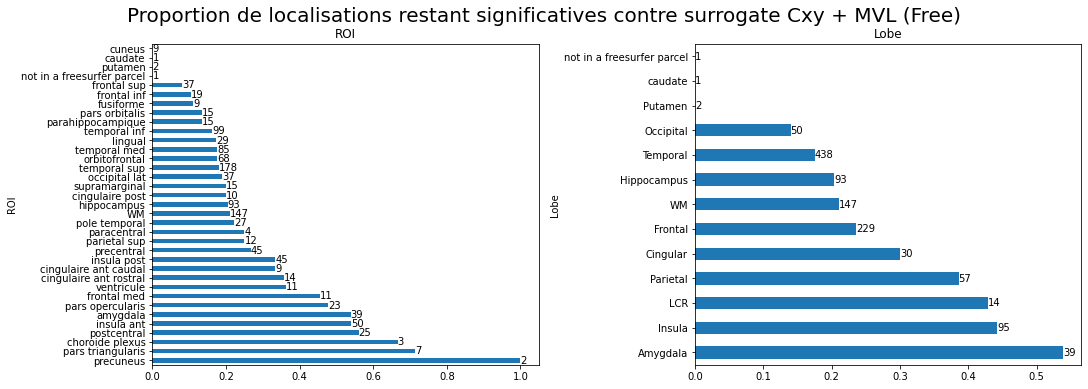

In [83]:
fig, axs = plt.subplots(ncols = 2, figsize = (15,5), constrained_layout = True)
fig.suptitle('Proportion de localisations restant significatives contre surrogate Cxy + MVL (Free)', fontsize = 20, y = 1.05)

for col, scale in enumerate(['ROI','Lobe']):
    ax = axs[col]
    sorted_prop_roi = (df_Cxy_MVL_FR_CV.groupby(scale).mean())['both_signif'].sort_values(ascending = False)
    sorted_prop_roi.plot.barh(ax=ax)
    labels = labels = [df_Cxy_MVL_FR_CV[scale].value_counts()[roi] for roi in sorted_prop_roi.index]
    ax.bar_label(container=ax.containers[0], labels = labels)
    ax.set_title(scale)
if savefig:
    plt.savefig(folder + 'figures_stats/Proportion_loca_signif_vs_surro_FR_CV', bbox_inches ='tight')

In [84]:
classement_prop_roi_signif = (df_Cxy_MVL_FR_CV.groupby('ROI').mean())['both_signif'].sort_values(ascending = False)#.plot.barh()

In [85]:
dict_plot_signif_by_roi = {}
for roi in df_Cxy_MVL_FR_CV[df_Cxy_MVL_FR_CV['both_signif'] == 1]['ROI'].unique():
    dict_plot_signif_by_roi[roi] = df_Cxy_MVL_FR_CV[(df_Cxy_MVL_FR_CV['ROI'] == roi) & (df_Cxy_MVL_FR_CV['both_signif'] == 1)]['chan'].values

In [86]:
dict_plot_signif_by_roi

{'amygdala': array(['Ap02', 'Ap01', 'Ap02', 'Ap03', 'Ap04', 'A01', 'A02', 'A04',
        'Ap01', 'Ap02', 'Ap03', 'A01', 'A02', 'A03', 'A04', 'Am2d_1',
        'Am2d_3', 'Am2g_1', 'AmT2_1', 'AmT2_2', 'AmT2_3'], dtype=object),
 'temporal sup': array(['Ap09', 'Ap10', 'Ap11', 'Bp09', 'Tp07', 'Tp08', 'Ep08', 'T08',
        'I08', 'J03', 'J04', 'G12', 'G13', 'W01', 'W08', 'W09', 'T05',
        'T06', 'T07', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'InT1_3',
        'InT1_1', 'InT1_6', 'HmT1_8', 'HmT1_9', 'T1pd_1', 'TBa_6'],
       dtype=object),
 'hippocampus': array(['Bp01', 'Bp02', 'Bp03', 'Bp08', 'B05', 'Bp01', 'Bp02', 'B02',
        'C03', 'D01', 'D04', 'D01', 'D02', 'Bp01', 'Bp02', 'C01', 'C03',
        'Hm2d_1', 'Hm2d_2'], dtype=object),
 'pole temporal': array(['Ep04', 'TPo2_1', 'TBa_6', 'TPol_4', 'TPol_5', 'TPol_1'],
       dtype=object),
 'insula post': array(['Tp04', 'Ap06', 'Hp01', 'Hp02', 'Hp03', 'T01', 'T02', 'T03', 'H02',
        'H04', 'T01', 'T03', 'T04', 'H01', 'Xp02'], dty

In [87]:
df_Cxy_MVL_FR_CV

sujet   cond    chan            ROI      Lobe side       Cxy  \
0               CHEe  FR_CV    Jp01   temporal sup  Temporal    l  0.008184   
1               CHEe  FR_CV    Jp02   temporal sup  Temporal    l  0.039253   
2               CHEe  FR_CV    Jp03   temporal sup  Temporal    l  0.078251   
3               CHEe  FR_CV    Jp04   temporal sup  Temporal    l  0.050689   
4               CHEe  FR_CV    Jp05   temporal sup  Temporal    l  0.002624   
...              ...    ...     ...            ...       ...  ...       ...   
1191  pat_03138_1601  FR_CV   TBp_8   temporal med  Temporal    l  0.016275   
1192  pat_03138_1601  FR_CV  TPol_1  pole temporal  Temporal    l  0.064685   
1193  pat_03138_1601  FR_CV  TPol_2  pole temporal  Temporal    l  0.058421   
1194  pat_03138_1601  FR_CV  TPol_3   temporal sup  Temporal    l  0.010375   
1195  pat_03138_1601  FR_CV  TPol_4   temporal sup  Temporal    l  0.014513   

      Cxy_surr       MVL  MVL_surr  Unnamed: 0  cxy_signif  mvl_signif  \
0     0.103029  0.009107  0.029803           0           0           0   
1     0.093564  0.018437  0.019697           0           0           0   
2     0.104506  0.020076  0.018371           0           0           1   
3     0.112545  0.014718  0.013994           0           0           1   
4     0.183454  0.015732  0.014796           0           0           1   
...        ...       ...       ...         ...         ...         ...   
1191  0.036585  0.020047  0.023429           0           0           0   
1192  0.055704  0.019425  0.014099           0           1           1   
1193  0.099253  0.014120  0.013432           0           0           1   
1194  0.255779  0.009357  0.015933           0           0           0   
1195  0.150598  0.006268  0.017189           0           0           0   

      both_signif  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
1191            0  
1192            1  
1193            0  
1194            0  
1195            0  

[1196 rows x 14 columns]

In [88]:
rois_to_test = np.array(classement_prop_roi_signif[classement_prop_roi_signif > 0.3].index)
fig, axs = plt.subplots(ncols = 7, nrows = 2, figsize = (30,10), constrained_layout = True)
fig.suptitle('Interaction phase * bande par ROIs de Pxx (only signif plots)', fontsize = 20, y = 1.05)
for row, list_rois in enumerate([rois_to_test[0:7],rois_to_test[7:]]):
    for col, roi in enumerate(list_rois):
        ax = axs[row,col]
        sns.pointplot(data=df_TF_IE_FR_CV[df_TF_IE_FR_CV['chan'].isin(dict_plot_signif_by_roi[roi])] , x = 'band', y = 'Pxx', hue = 'phase', kind = 'point',ax=ax)
        ax.set_title(roi)
if savefig:
    plt.savefig(folder + 'figures_stats/pointplot_interaction_bande_phase_roi_detail_plot_signif', bbox_inches = 'tight')
plt.show()

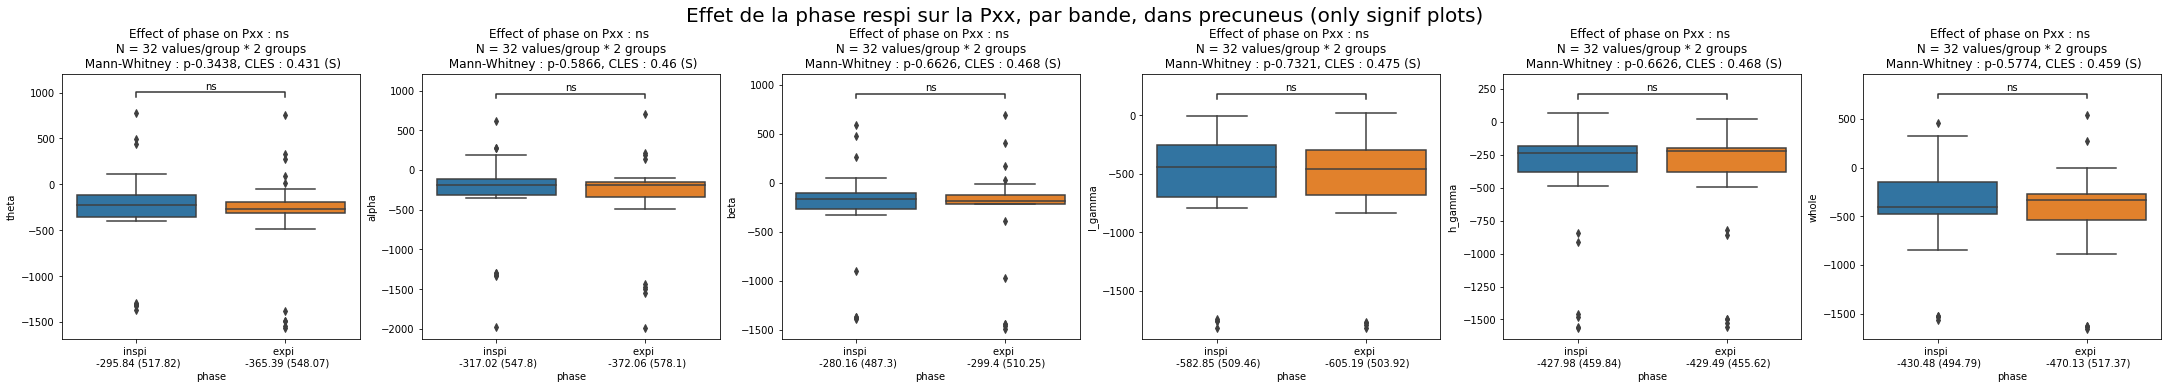

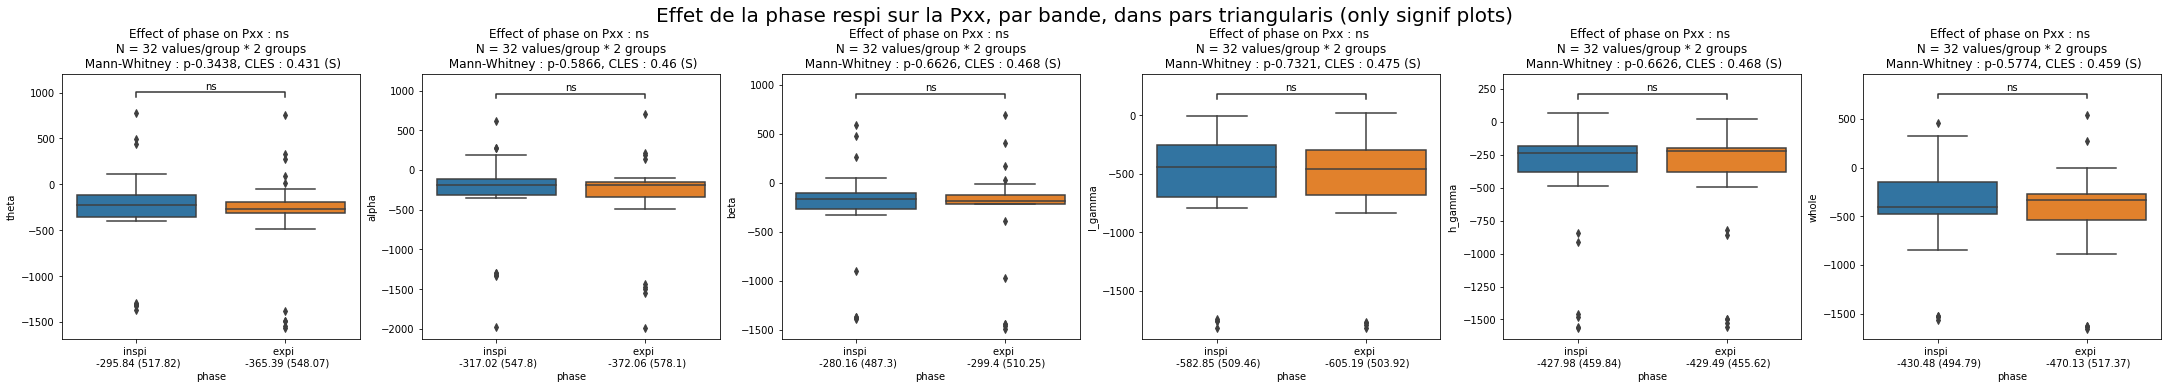

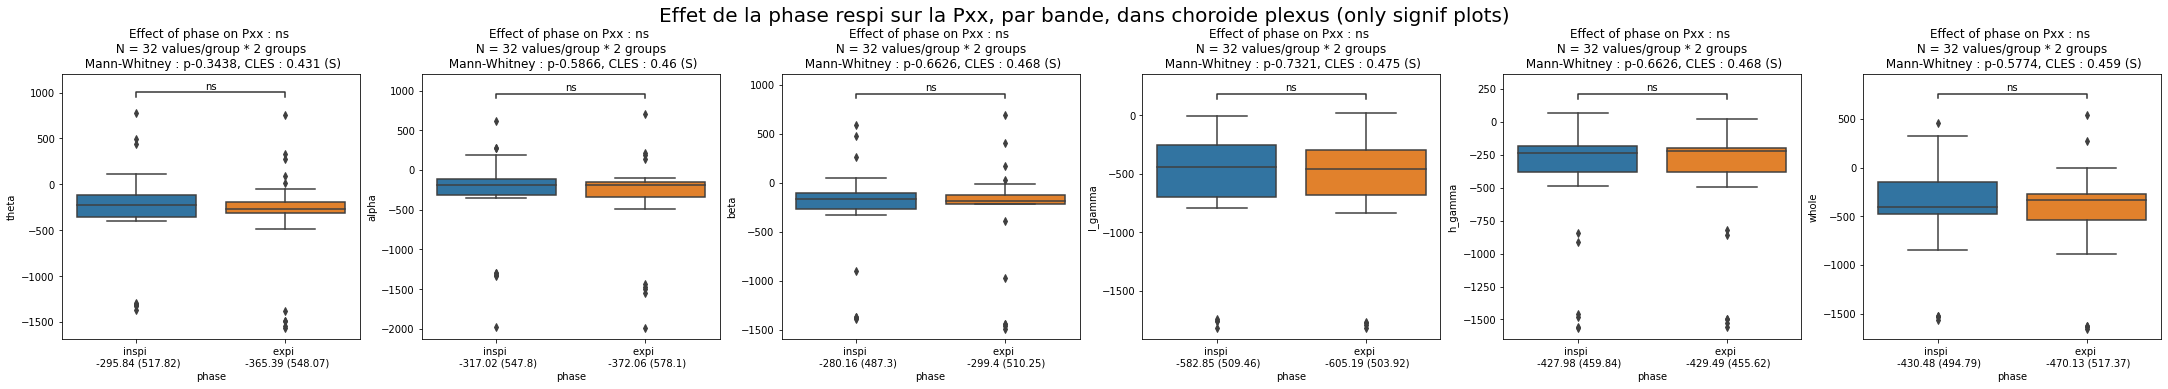

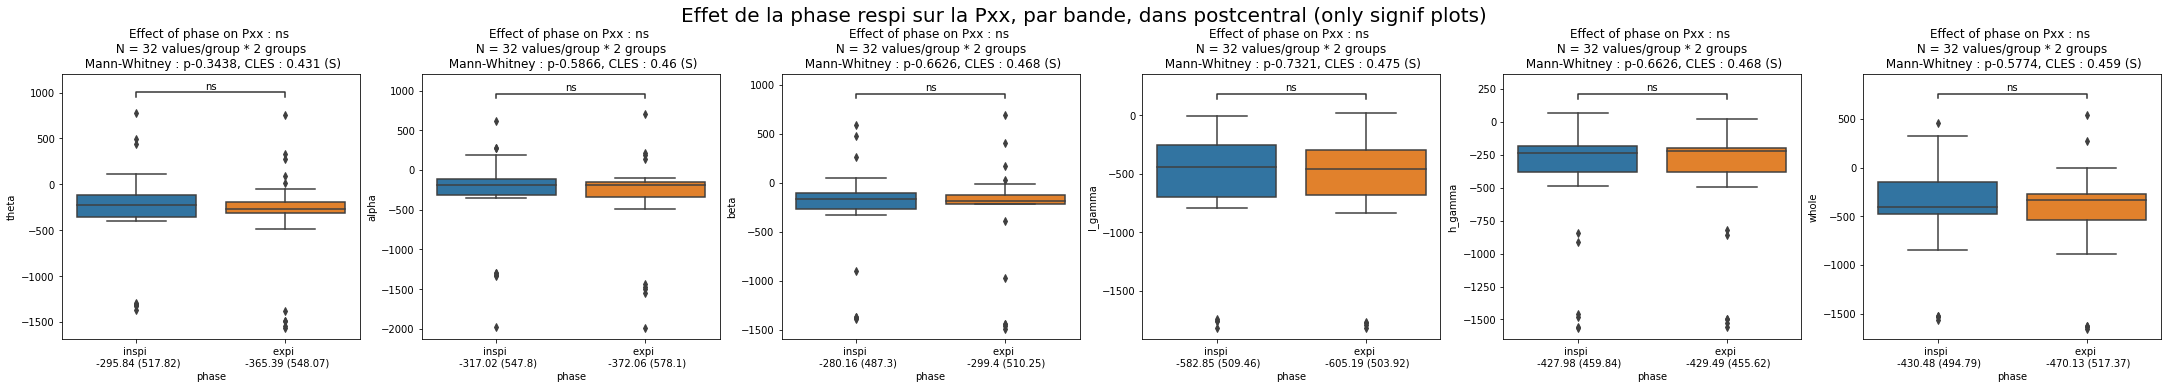

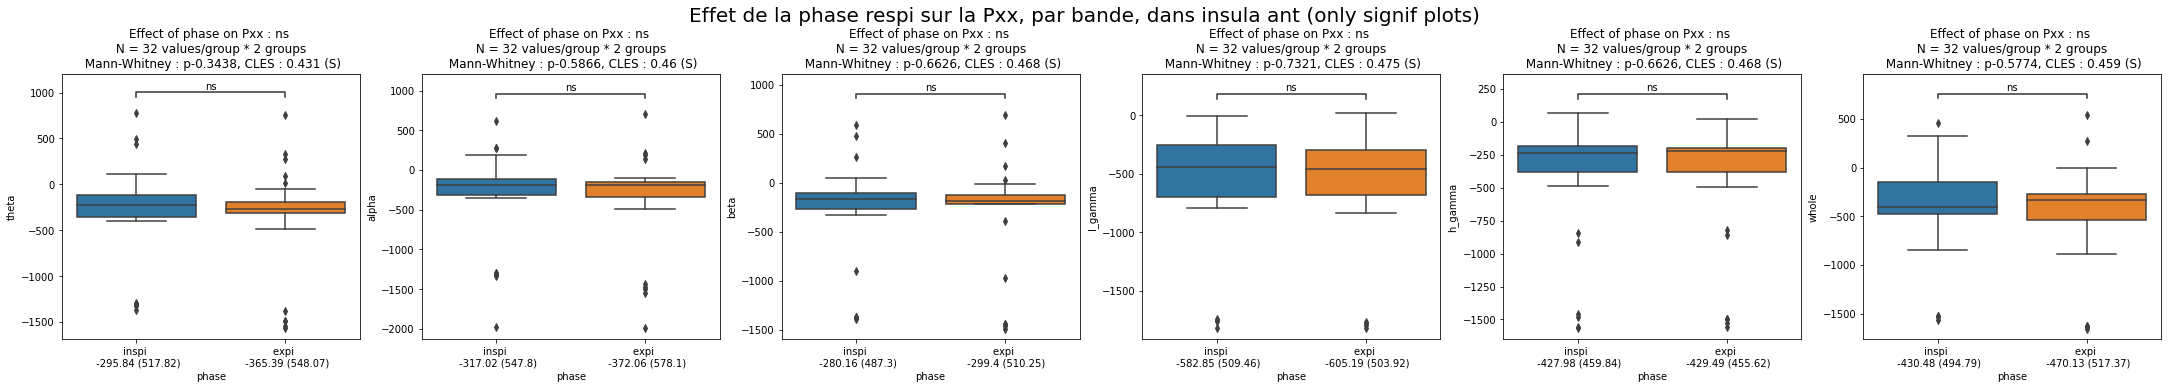

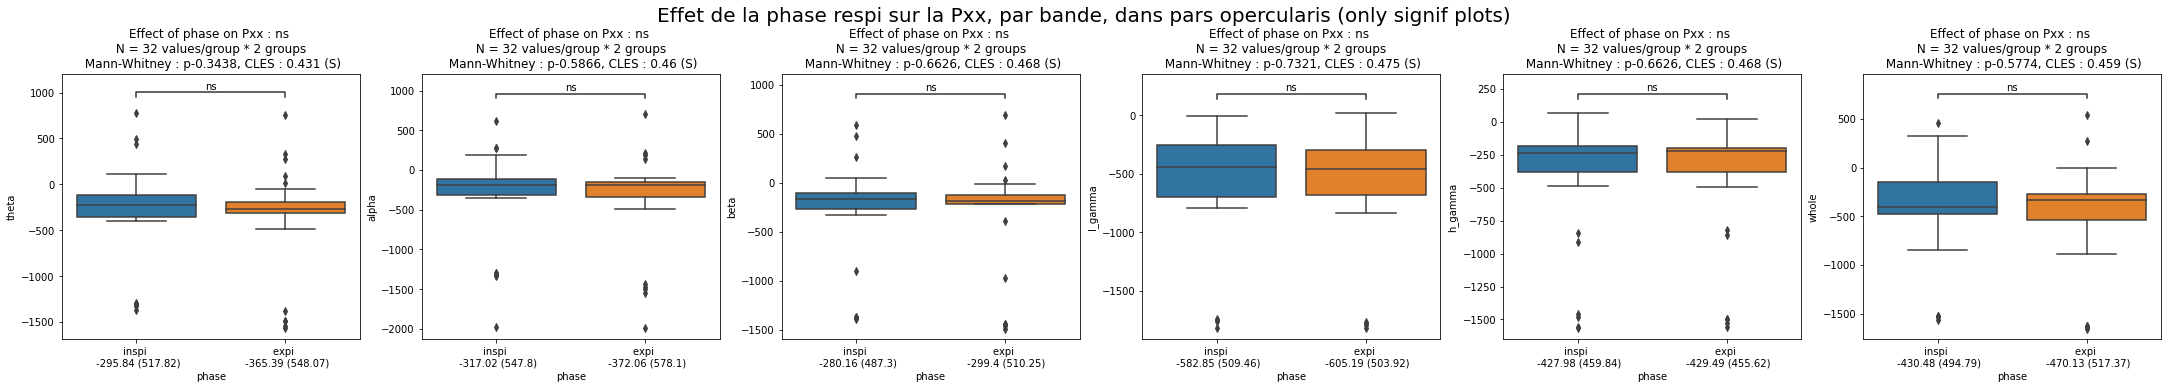

In [89]:
rois_to_test = np.array(classement_prop_roi_signif[classement_prop_roi_signif > 0.3].index)

for roi in rois_to_test:
    fig, axs = plt.subplots(ncols =  len(bandes), figsize = (30,5), constrained_layout = True)
    plt.suptitle(f'Effet de la phase respi sur la Pxx, par bande, dans {roi} (only signif plots)', fontsize = 20, y = 1.05)
    for col, bande in enumerate(bandes):
        ax = axs[col]
        df_to_stats = df_TF_IE_FR_CV[(df_TF_IE_FR_CV['phase'].isin(['inspi','expi'])) & (df_TF_IE_FR_CV['chan'].isin(dict_plot_signif_by_roi['amygdala']))&(df_TF_IE_FR_CV['band'] == bande)]
        # print(df_to_stats.shape)
        if df_to_stats.shape[0] > 6:
            gh.auto_stats(df=df_to_stats, predictor = 'phase', outcome = 'Pxx', design = 'between', transform = False, ax=ax)
            ax.set_ylabel(bande)
            if col == len(bandes) - 1:
                if savefig:
                    plt.savefig(folder + f'figures_stats/boxplot_stats_effet_phase_pxx_bande_in_{roi}_signif_plots', bbox_inches = 'tight')
        else:
            print(roi)

# FC on graphs

In [90]:
df_FC = pd.read_excel(folder + 'allplot_df_graph_FC.xlsx', index_col = 0).drop(columns = 'Unnamed: 0')

In [91]:
metrics = df_FC['metric'].unique()
outcomes = ['CPL','GE','SWN']

## ALL CONDITIONS

In [92]:
df_FC_all = df_FC[df_FC['sujet'].isin(sujets_lyon)]
df_FC_all = df_FC[~df_FC['cond'].isin(['RD_AV','FR_MV'])]

In [93]:
predictors = ['cond','band']

In [94]:
df_FC_all

sujet   cond     band metric       CPL        GE           SWN
0             CHEe  RD_CV    theta   ispc  1.314286  0.846032 -3.925521e-02
1             CHEe  RD_CV    theta   wpli  1.304762  0.847619 -3.370787e-02
2             CHEe  RD_CV    alpha   ispc  1.342857  0.841270 -6.712423e-02
3             CHEe  RD_CV    alpha   wpli  1.304762  0.847619  3.492063e-02
4             CHEe  RD_CV     beta   ispc  1.304762  0.847619 -1.917808e-02
..             ...    ...      ...    ...       ...       ...           ...
5   pat_03138_1601  FR_CV     beta   wpli  1.305556  0.847222  2.834008e-02
6   pat_03138_1601  FR_CV  l_gamma   ispc  1.107143  0.946429  0.000000e+00
7   pat_03138_1601  FR_CV  l_gamma   wpli  1.305556  0.847222 -1.226994e-02
8   pat_03138_1601  FR_CV  h_gamma   ispc  1.333333  0.842593  2.220446e-16
9   pat_03138_1601  FR_CV  h_gamma   wpli  1.305556  0.847222  7.633588e-03

[270 rows x 7 columns]

In [95]:
df_FC_all.groupby('metric').mean()

CPL        GE       SWN
metric                              
ispc    1.290856  0.858157 -0.027972
wpli    1.304964  0.848304  0.000846

In [96]:
df_FC_all.groupby(['metric','cond']).mean()

CPL        GE       SWN
metric cond                               
ispc   FR_CV  1.275124  0.866598 -0.022420
       RD_CV  1.312622  0.847255 -0.035577
       RD_FV  1.309032  0.847853 -0.033676
       RD_SV  1.309911  0.847707 -0.035483
wpli   FR_CV  1.306335  0.847366 -0.000003
       RD_CV  1.307807  0.848088 -0.002095
       RD_FV  1.301924  0.849038  0.006074
       RD_SV  1.300022  0.851308  0.001747

In [97]:
df_FC_all.groupby(['metric','cond']).std()

CPL        GE       SWN
metric cond                               
ispc   FR_CV  0.100795  0.046137  0.036605
       RD_CV  0.027046  0.004536  0.029562
       RD_FV  0.020332  0.003966  0.021273
       RD_SV  0.021228  0.004192  0.026193
wpli   FR_CV  0.014999  0.005545  0.037880
       RD_CV  0.026418  0.004523  0.039413
       RD_FV  0.003386  0.001693  0.032371
       RD_SV  0.030695  0.014030  0.031072

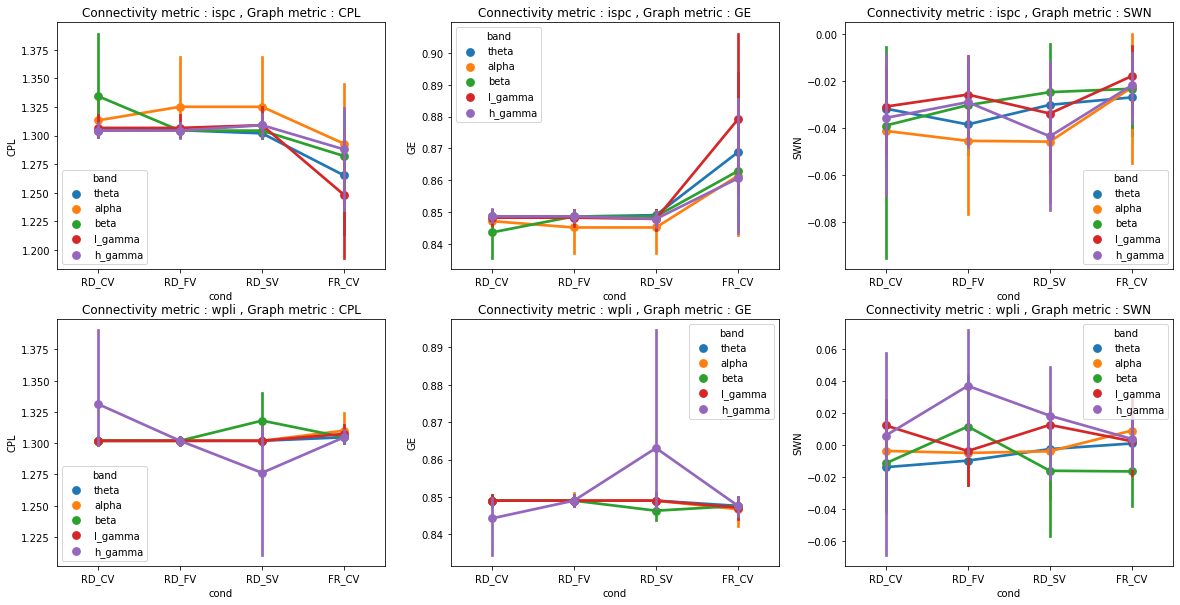

In [98]:
fig , axs = plt.subplots(nrows = len(metrics), ncols = len(outcomes), figsize = (20,10))
for row, metric in enumerate(metrics):
    for col, outcome in enumerate(outcomes):
        ax = axs[row, col]
        sns.pointplot(data=df_FC_all[df_FC_all['metric'] == metric], x = 'cond', y = outcome, ax=ax, hue = 'band')
        # gh.auto_stats(df=df_DFC_all[df_DFC_all['metric'] == metric], predictor = 'cond', outcome = outcome, ax=ax, subject = 'sujet')
        ax.set_title(f'Connectivity metric : {metric} , Graph metric : {outcome}')

## FR CV

In [99]:
df_FC_FR_CV = df_FC[df_FC['cond'] == 'FR_CV']

In [100]:
df_FC_FR_CV.groupby(['metric','band']).mean()

CPL        GE       SWN
metric band                                 
ispc   alpha    1.292796  0.861429 -0.022599
       beta     1.282002  0.862911 -0.023177
       h_gamma  1.287859  0.860621 -0.021708
       l_gamma  1.247934  0.879191 -0.017765
       theta    1.265028  0.868837 -0.026849
wpli   alpha    1.310035  0.846749  0.009094
       beta     1.304736  0.847632 -0.016393
       h_gamma  1.304736  0.847632  0.003818
       l_gamma  1.307430  0.847183  0.002432
       theta    1.304736  0.847632  0.001033

In [101]:
df_FC_FR_CV.groupby(['metric','band']).std()

CPL        GE       SWN
metric band                                 
ispc   alpha    0.112638  0.045616  0.056309
       beta     0.095283  0.044353  0.033120
       h_gamma  0.093319  0.044669  0.032452
       l_gamma  0.114174  0.053617  0.029421
       theta    0.093434  0.045566  0.029167
wpli   alpha    0.026038  0.007532  0.030302
       beta     0.010054  0.005027  0.040852
       h_gamma  0.010054  0.005027  0.035437
       l_gamma  0.013555  0.005415  0.052273
       theta    0.010054  0.005027  0.024687

In [102]:
df_FC_FR_CV.groupby('band').mean()

CPL        GE       SWN
band                                 
alpha    1.301416  0.854089 -0.006753
beta     1.293369  0.855271 -0.019785
h_gamma  1.296298  0.854127 -0.008945
l_gamma  1.277682  0.863187 -0.007666
theta    1.284882  0.858235 -0.012908

/home/valentin.ghibaudo/.virtualenvs/py38_nodegpu/lib/python3.8/site-packages/pingouin/distribution.py:977: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d) ** d
/home/valentin.ghibaudo/.virtualenvs/py38_nodegpu/lib/python3.8/site-packages/pingouin/distribution.py:977: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d) ** d


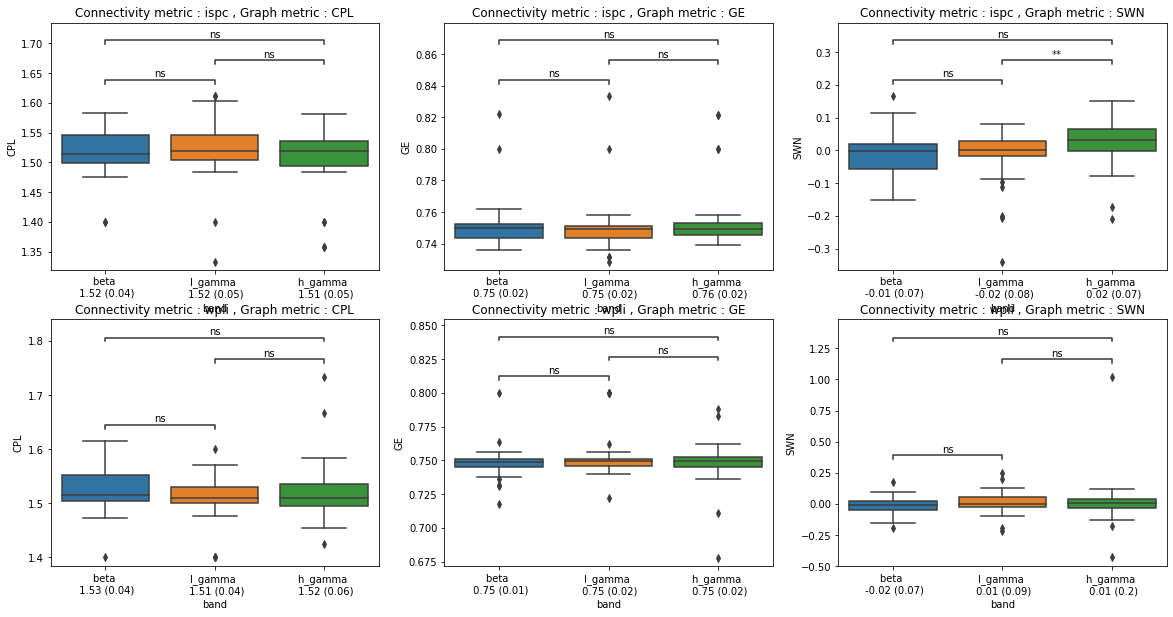

In [103]:
fig , axs = plt.subplots(nrows = len(metrics), ncols = len(outcomes), figsize = (20,10))
for row, metric in enumerate(metrics):
    for col, outcome in enumerate(outcomes):
        ax = axs[row, col]
        # sns.pointplot(data=df_FC_FR_CV[df_FC_FR_CV['metric'] == metric], x = 'cond', y = outcome, ax=ax, hue = 'band')
        gh.auto_stats(df=df_DFC_all[df_DFC_all['metric'] == metric], predictor = 'band', outcome = outcome, ax=ax, subject = 'sujet')
        ax.set_title(f'Connectivity metric : {metric} , Graph metric : {outcome}')

# DFC on connectivity metrics

In [104]:
df_raw_DFC = pd.read_excel(folder + 'allplot_df_DFC.xlsx', index_col = 0).drop(columns = 'Unnamed: 0')

In [105]:
metrics = df_raw_DFC['metric'].unique()
outcome = 'value'
metrics

array(['ispc', 'wpli'], dtype=object)

In [106]:
df_raw_DFC

sujet   cond     band metric  phase  \
0              CHEe  RD_CV     beta   ispc  whole   
1              CHEe  RD_CV     beta   ispc  inspi   
2              CHEe  RD_CV     beta   ispc   expi   
3              CHEe  RD_CV     beta   ispc  whole   
4              CHEe  RD_CV     beta   ispc  inspi   
..              ...    ...      ...    ...    ...   
427  pat_03138_1601  FR_CV  h_gamma   wpli  inspi   
428  pat_03138_1601  FR_CV  h_gamma   wpli   expi   
429  pat_03138_1601  FR_CV  h_gamma   wpli  whole   
430  pat_03138_1601  FR_CV  h_gamma   wpli  inspi   
431  pat_03138_1601  FR_CV  h_gamma   wpli   expi   

                            pair       value  
0    cingulaire post-insula post  242.943630  
1    cingulaire post-insula post   47.501353  
2    cingulaire post-insula post   47.892156  
3    cingulaire post-insula post  226.844372  
4    cingulaire post-insula post   44.235163  
..                           ...         ...  
427         amygdala-hippocampus   -2.062808  
428         amygdala-hippocampus   -2.879588  
429         amygdala-hippocampus   14.674443  
430         amygdala-hippocampus   10.628279  
431         amygdala-hippocampus   -4.564358  

[549324 rows x 7 columns]

## ALL CONDITIONS

In [107]:
df_raw_DFC_all = df_raw_DFC[df_raw_DFC['sujet'].isin(sujets_lyon)]
df_raw_DFC_all = df_raw_DFC_all[~df_raw_DFC_all['cond'].isin(['RD_AV','FR_MV'])]

In [108]:
df_raw_DFC_all

sujet   cond     band metric  phase                           pair  \
0       CHEe  RD_CV     beta   ispc  whole    cingulaire post-insula post   
1       CHEe  RD_CV     beta   ispc  inspi    cingulaire post-insula post   
2       CHEe  RD_CV     beta   ispc   expi    cingulaire post-insula post   
3       CHEe  RD_CV     beta   ispc  whole    cingulaire post-insula post   
4       CHEe  RD_CV     beta   ispc  inspi    cingulaire post-insula post   
...      ...    ...      ...    ...    ...                            ...   
252535  TREt  FR_CV  h_gamma   wpli  inspi  hippocampus-parahippocampique   
252536  TREt  FR_CV  h_gamma   wpli   expi  hippocampus-parahippocampique   
252537  TREt  FR_CV  h_gamma   wpli  whole  hippocampus-parahippocampique   
252538  TREt  FR_CV  h_gamma   wpli  inspi  hippocampus-parahippocampique   
252539  TREt  FR_CV  h_gamma   wpli   expi  hippocampus-parahippocampique   

             value  
0       242.943630  
1        47.501353  
2        47.892156  
3       226.844372  
4        44.235163  
...            ...  
252535   -4.211770  
252536   -4.648234  
252537   -2.111611  
252538   -1.251119  
252539    3.027833  

[338544 rows x 7 columns]

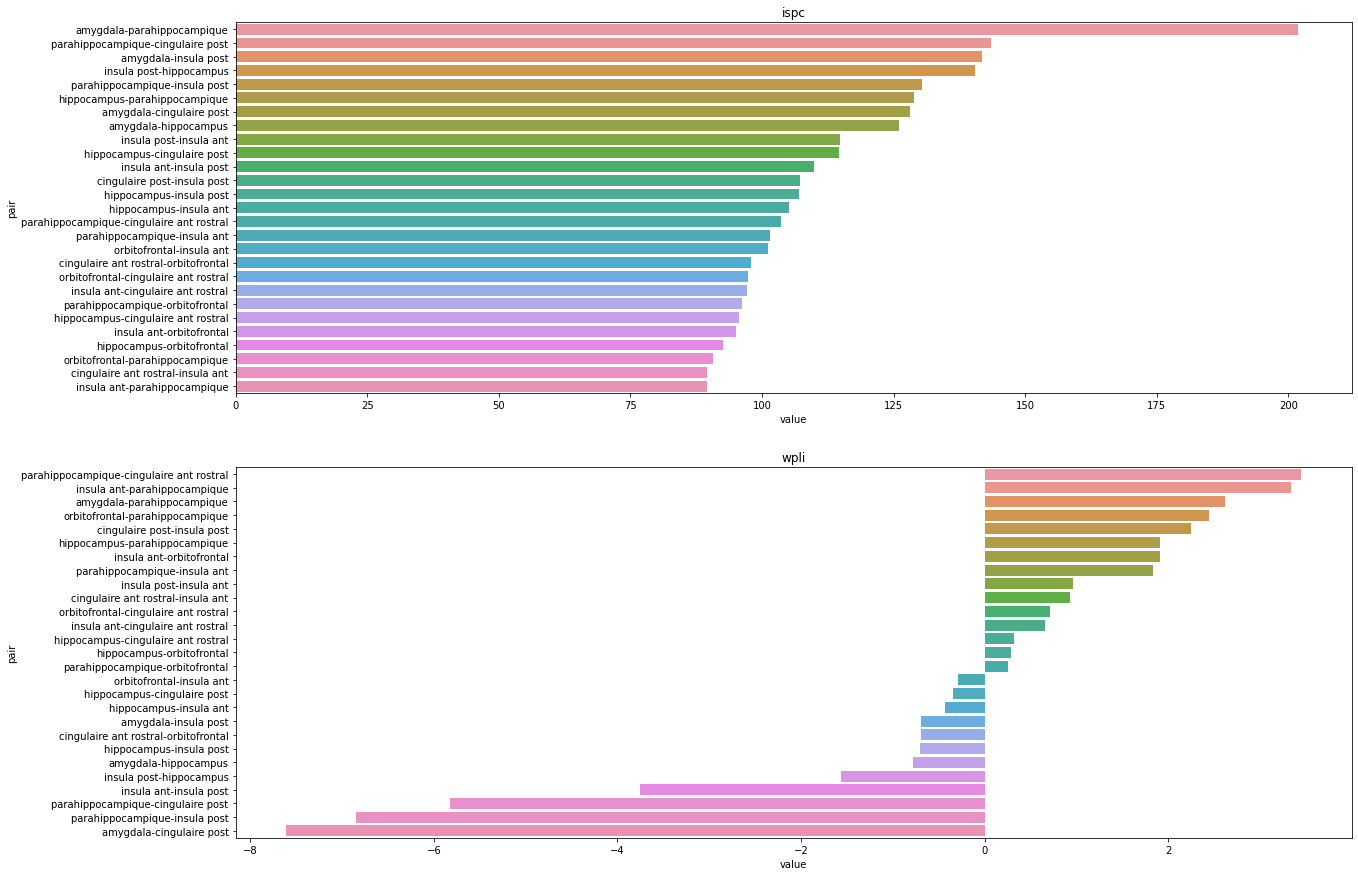

In [109]:
fig, axs = plt.subplots(nrows = metrics.size, figsize = (20,15))
for row , metric in enumerate(metrics):
    ax = axs[row]
    sns.barplot(data=df_raw_DFC_all[df_raw_DFC_all['metric'] == metric].groupby('pair').mean().sort_values(by = 'value', ascending = False).reset_index() , x='value',y='pair', orient = 'h', ax=ax)
    ax.set_title(metric)

In [110]:
df_raw_DFC_all[(df_raw_DFC_all['metric'] == 'ispc') & (df_raw_DFC_all['phase'] == 'whole') & (df_raw_DFC_all['pair'] == 'amygdala-hippocampus')]

sujet   cond     band metric  phase                  pair       value
690    CHEe  RD_CV     beta   ispc  whole  amygdala-hippocampus  342.144616
693    CHEe  RD_CV     beta   ispc  whole  amygdala-hippocampus  341.682007
696    CHEe  RD_CV     beta   ispc  whole  amygdala-hippocampus  342.523645
699    CHEe  RD_CV     beta   ispc  whole  amygdala-hippocampus  379.710430
702    CHEe  RD_CV     beta   ispc  whole  amygdala-hippocampus  423.948225
...     ...    ...      ...    ...    ...                   ...         ...
20169  GOBc  FR_CV  h_gamma   ispc  whole  amygdala-hippocampus  280.019719
20172  GOBc  FR_CV  h_gamma   ispc  whole  amygdala-hippocampus  222.205574
20175  GOBc  FR_CV  h_gamma   ispc  whole  amygdala-hippocampus  239.144558
20178  GOBc  FR_CV  h_gamma   ispc  whole  amygdala-hippocampus  281.034029
20181  GOBc  FR_CV  h_gamma   ispc  whole  amygdala-hippocampus  265.005745

[2352 rows x 7 columns]

In [111]:
# pairs = df_raw_DFC_all['pair'].unique()
# pairs = pairs.reshape(9,3)

# for metric in df_raw_DFC_all['metric'].unique():
#     fig , axs = plt.subplots(nrows = pairs.shape[0], ncols = pairs.shape[1], figsize = (20,40), constrained_layout = True)
#     for row, sublist in enumerate(pairs):
#         for col, pair in enumerate(sublist):
#             # print(pair)
#             ax = axs[row, col]
#             to_stats = df_raw_DFC_all[(df_raw_DFC_all['metric'] == metric)  & (df_raw_DFC_all['pair'] == pair)]
#             # print('shape', to_stats.shape[0], 'pair', pair)
#             if to_stats.shape[0] != 0:
#                 gh.auto_stats(df=to_stats, predictor = 'cond', outcome = 'value', design = 'between', ax=ax, order = ['FR_CV','RD_SV','RD_CV','RD_FV'])
#             # sns.boxplot(data=to_stats, x='cond', y = 'value', ax=ax, order = ['FR_CV','RD_SV','RD_CV','RD_FV'])
#             ax.set_ylabel(pair)

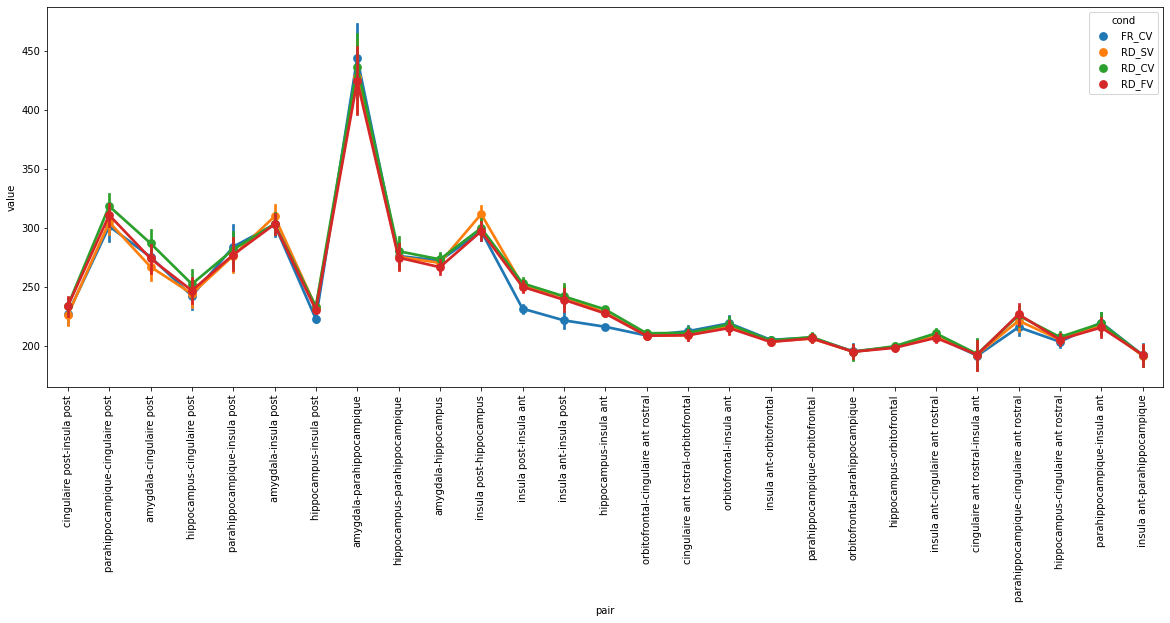

In [112]:
fig, ax = plt.subplots(figsize = (20,7))
sns.pointplot(data=df_raw_DFC_all[(df_raw_DFC_all['metric'] == 'ispc') & (df_raw_DFC_all['phase'] == 'whole')], x = 'pair', y = 'value', hue = 'cond', ax=ax, hue_order = ['FR_CV','RD_SV','RD_CV','RD_FV'])
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='value', ylabel='pair'>

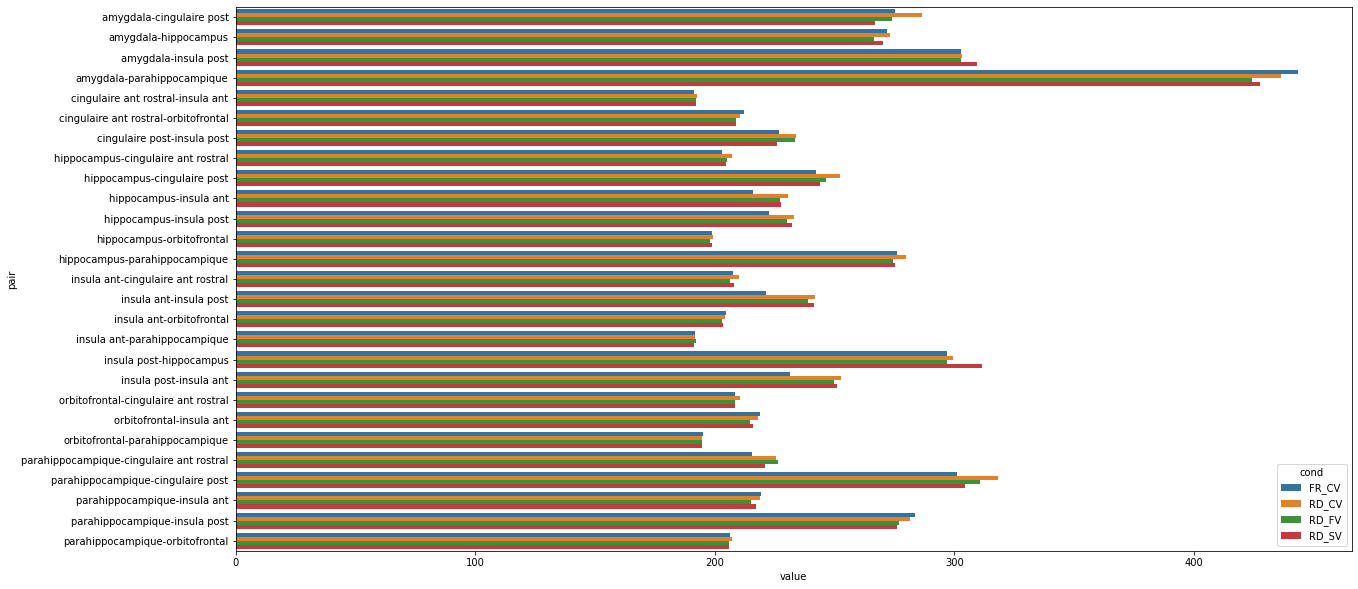

In [113]:
fig ,ax = plt.subplots(figsize = (20,10))
sns.barplot(data= df_raw_DFC_all[(df_raw_DFC_all['metric'] == 'ispc') & (df_raw_DFC_all['phase'] == 'whole')].groupby(['cond','pair']).mean().reset_index(), x = 'value', y = 'pair', hue = 'cond', orient = 'h', ax=ax) 

<AxesSubplot:ylabel='pair'>

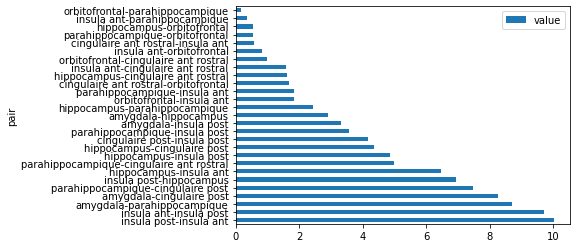

In [114]:
df_raw_DFC_all[(df_raw_DFC_all['metric'] == 'ispc') & (df_raw_DFC_all['phase'] == 'whole')].groupby(['cond','pair']).mean().groupby('pair').std().sort_values(by = 'value', ascending=False).plot.barh()

In [115]:
x = df_raw_DFC_all[df_raw_DFC_all['metric'] == 'ispc'].groupby(['sujet','cond','band','metric','phase']).mean().reset_index()
x = x[x['phase'] == 'expi']['value']

In [116]:
y = df_raw_DFC_all[df_raw_DFC_all['metric'] == 'ispc'].groupby(['sujet','cond','band','metric','phase']).mean().reset_index()
y = y[y['phase'] == 'whole']['value']

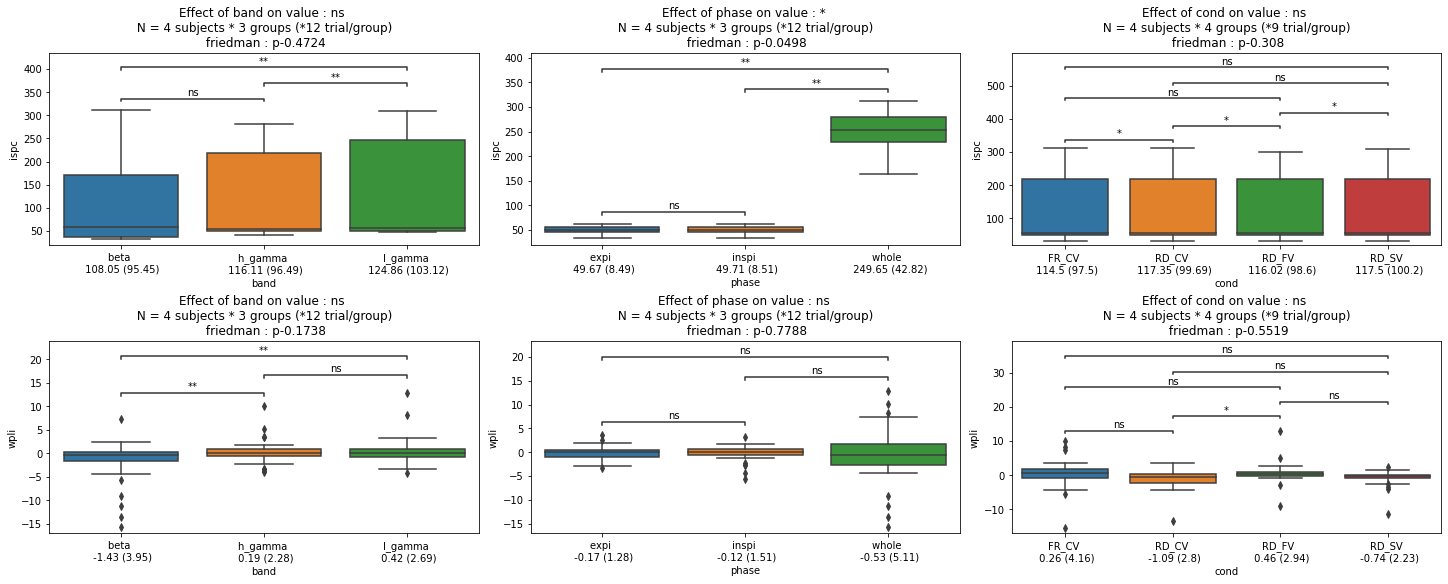

In [117]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (20,8), constrained_layout = True)
for col, predictor in enumerate(['band','phase','cond']):
    for row, metric in enumerate(df_raw_DFC_all['metric'].unique()):
        ax = axs[row , col]
        gh.auto_stats(df=df_raw_DFC_all[df_raw_DFC_all['metric'] == metric].groupby(['sujet','cond','band','metric','phase']).mean().reset_index(), predictor = predictor, outcome = 'value', ax=ax, subject = 'sujet', transform=False)
        ax.set_ylabel(metric)

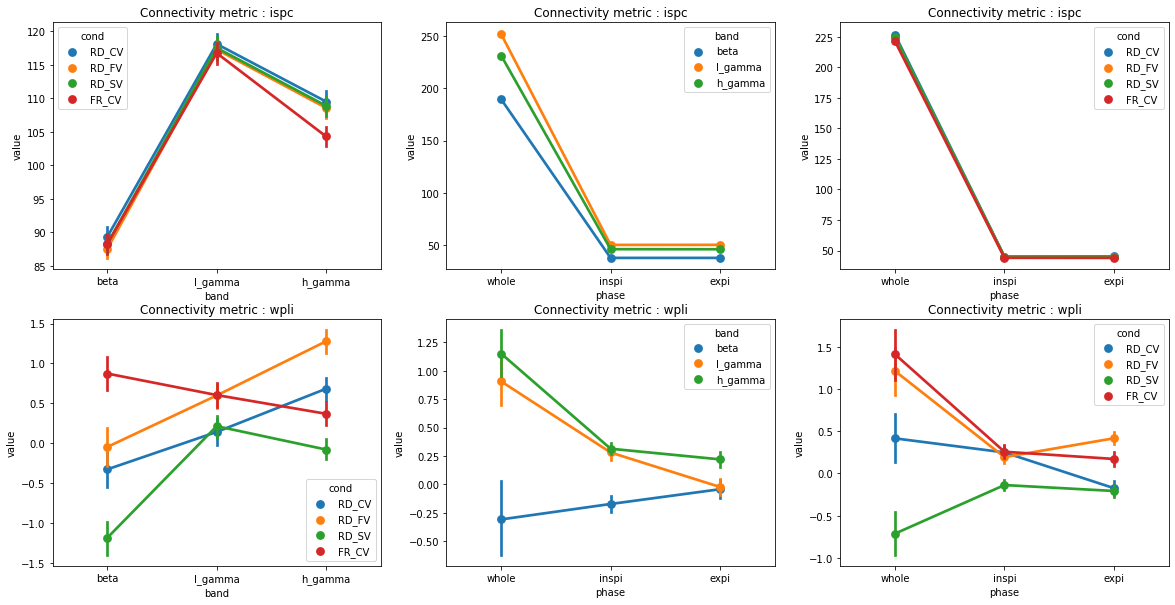

In [118]:
fig , axs = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))
for row, metric in enumerate(metrics):
    for col, comparison in enumerate([('band','cond'),('phase','band'),('phase','cond')]):
        ax = axs[row, col]
        sns.pointplot(data=df_raw_DFC_all[df_raw_DFC_all['metric'] == metric], x = comparison[0], y = 'value', ax=ax, hue = comparison[1])
        ax.set_title(f'Connectivity metric : {metric}')

In [119]:
fig , axs = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10), constrained_layout =True)
for row, metric in enumerate(metrics):
    for col, comparison in enumerate([['band','cond'],['phase','band'],['phase','cond']]):
        ax = axs[row, col]
        gh.auto_stats(df=df_raw_DFC_all[df_raw_DFC_all['metric'] == metric].groupby(['sujet',comparison[0], comparison[1]]).mean().reset_index(), predictor = comparison, outcome = 'value', ax=ax, subject = 'sujet')

/home/valentin.ghibaudo/.virtualenvs/py38_nodegpu/lib/python3.8/site-packages/pingouin/distribution.py:486: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(
/home/valentin.ghibaudo/.virtualenvs/py38_nodegpu/lib/python3.8/site-packages/pingouin/distribution.py:486: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(
/home/valentin.ghibaudo/.virtualenvs/py38_nodegpu/lib/python3.8/site-packages/pingouin/distribution.py:486: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(
/home/valentin.ghibaudo/.virtualenvs/py38_nodegpu/lib/python3.8/site-packages/pingouin/distribution.py:486: UserWarning: Epsilon values 

In [120]:
df_raw_DFC_all[(df_raw_DFC_all['pair'] == 'amygdala-hippocampus') & (df_raw_DFC_all['phase'] == 'whole')]

sujet   cond     band metric  phase                  pair       value
690    CHEe  RD_CV     beta   ispc  whole  amygdala-hippocampus  342.144616
693    CHEe  RD_CV     beta   ispc  whole  amygdala-hippocampus  341.682007
696    CHEe  RD_CV     beta   ispc  whole  amygdala-hippocampus  342.523645
699    CHEe  RD_CV     beta   ispc  whole  amygdala-hippocampus  379.710430
702    CHEe  RD_CV     beta   ispc  whole  amygdala-hippocampus  423.948225
...     ...    ...      ...    ...    ...                   ...         ...
20865  GOBc  FR_CV  h_gamma   wpli  whole  amygdala-hippocampus   -6.046848
20868  GOBc  FR_CV  h_gamma   wpli  whole  amygdala-hippocampus   16.747558
20871  GOBc  FR_CV  h_gamma   wpli  whole  amygdala-hippocampus   -3.037679
20874  GOBc  FR_CV  h_gamma   wpli  whole  amygdala-hippocampus    3.545549
20877  GOBc  FR_CV  h_gamma   wpli  whole  amygdala-hippocampus   -6.664321

[4704 rows x 7 columns]

In [121]:
# for pair in df_raw_DFC_all['pair'].unique():
#     to_stats = df_raw_DFC_all[df_raw_DFC_all['pair'] == pair]
#     fig , axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15,8), constrained_layout =True)
#     fig.suptitle(pair, fontsize = 20, y = 1.05)
#     for row, metric in enumerate(metrics):
#         for col, comparison in enumerate([['band','cond'],['phase','band'],['phase','cond']]):
#             ax = axs[row, col]
#             gh.auto_stats(df=to_stats[to_stats['metric'] == metric], predictor = comparison, outcome = 'value', ax=ax, design = 'between')
#             ax.set_ylabel(metric)
#     plt.show()

## FR CV

In [122]:
df_raw_DFC_FR_CV = df_raw_DFC[df_raw_DFC['cond'] == 'FR_CV']

In [123]:
fig, axs = plt.subplots(ncols = 2, figsize = (15,7))
for col, metric in enumerate(df_raw_DFC_FR_CV['metric'].unique()):
    ax = axs[col]
    gh.auto_stats(df=df_raw_DFC_FR_CV[df_raw_DFC_FR_CV['metric'] == metric].groupby(['sujet','band','metric','phase']).mean().reset_index(), predictor = ['band','phase'], outcome = 'value', subject = 'sujet', ax=ax)

/home/valentin.ghibaudo/.virtualenvs/py38_nodegpu/lib/python3.8/site-packages/pingouin/distribution.py:486: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(
/home/valentin.ghibaudo/.virtualenvs/py38_nodegpu/lib/python3.8/site-packages/pingouin/distribution.py:486: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(


<AxesSubplot:ylabel='pair'>

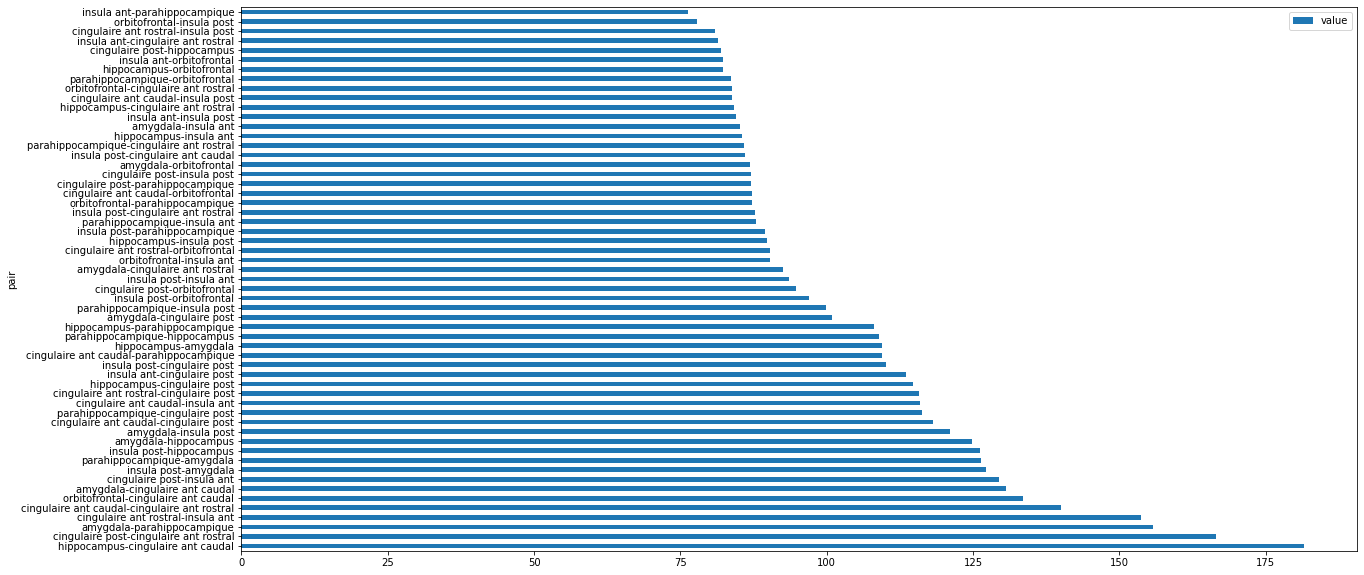

In [124]:
fig, ax = plt.subplots(figsize = (20,10))
df_raw_DFC_FR_CV[df_raw_DFC_FR_CV['metric'] == 'ispc'].groupby('pair').std().sort_values(by='value', ascending = False).plot.barh(ax=ax)

# HRV

In [125]:
df_HRV = pd.read_excel(folder + 'allplot_df_HRV.xlsx', index_col = 0)

In [126]:
metrics = np.array(['HRV_MeanNN','HRV_SDNN','HRV_RMSSD','HRV_pNN50','HRV_LF','HRV_HF','HRV_SD1','HRV_SD2','HRV_S'])

In [127]:
df_HRV

sujet   cond  session RDorFR compute_type  HRV_MeanNN  \
0             CHEe  FR_CV        1     FR     homemade  825.683594   
1             CHEe  FR_CV        1     FR           nk  825.644585   
2             CHEe  RD_CV        1     RD     homemade  751.481120   
3             CHEe  RD_CV        1     RD           nk  751.479145   
4             CHEe  RD_CV        2     RD     homemade  712.751667   
..             ...    ...      ...    ...          ...         ...   
1   pat_03105_1551  FR_CV        1     FR           nk  748.029851   
0   pat_03128_1591  FR_CV        1     FR     homemade  645.354701   
1   pat_03128_1591  FR_CV        1     FR           nk  645.597430   
0   pat_03138_1601  FR_CV        1     FR     homemade  602.354582   
1   pat_03138_1601  FR_CV        1     FR           nk  602.439122   

      HRV_SDNN   HRV_RMSSD  HRV_pNN50    HRV_LF    HRV_HF  HRV_LFHF  \
0    79.724006   65.594849  13.774105  0.013691  0.011711  1.169095   
1    79.940460   65.667337  13.774105  0.034179  0.040323  0.847635   
2    84.542716   91.440350  14.644351  0.015913  0.014406  1.104602   
3    84.897189   91.413341  14.225941  0.038809  0.039446  0.983845   
4   115.044344  118.147343  30.158730  0.095702  0.062723  1.525790   
..         ...         ...        ...       ...       ...       ...   
1    30.490571   16.353941   0.497512  0.051838  0.012066  4.296263   
0   195.787960  205.108589  36.188437  0.084866  0.262772  0.322965   
1   196.137227  205.324448  35.760171  0.017336  0.041645  0.416286   
0   118.833548  187.277160  73.453094  0.009232  0.027921  0.330650   
1   119.055881  187.446398  72.854291  0.024638  0.071357  0.345271   

       HRV_SD1     HRV_SD2          HRV_S  Unnamed: 0  
0    46.382487  102.888037   14992.318149           0  
1    46.498080  103.150153   15067.970641           0  
2    64.656000  100.225868   20358.160266           0  
3    64.770103  100.547014   20459.435082           0  
4    83.541396  139.672319   36657.423927           0  
..         ...         ...            ...         ...  
1    11.577386   41.106435    1495.099823           0  
0   145.033510  236.147644  107597.417551           0  
1   145.342105  236.506988  107990.436096           0  
0   132.424929  103.640928   43117.236219           0  
1   132.677362  103.749545   43244.701272           0  

[90 rows x 16 columns]

In [128]:
df_HRV['cond'].value_counts()

FR_CV    34
RD_SV    24
RD_CV    16
RD_FV    16
Name: cond, dtype: int64

In [129]:
df_HRV.groupby('compute_type').mean()

session  HRV_MeanNN   HRV_SDNN  HRV_RMSSD  HRV_pNN50    HRV_LF  \
compute_type                                                                    
homemade      1.511111  730.028317  77.203969  84.237534  20.410465  0.022835   
nk            1.511111  730.035760  77.467019  83.622525  20.018702  0.030461   

                HRV_HF  HRV_LFHF    HRV_SD1    HRV_SD2         HRV_S  \
compute_type                                                           
homemade      0.044368  2.086102  59.563183  89.556695  25522.741652   
nk            0.047554  1.602680  59.232052  89.595908  25566.732266   

              Unnamed: 0  
compute_type              
homemade             0.0  
nk                   0.0

In [130]:
df_HRV = df_HRV[df_HRV['compute_type'] == 'homemade']

## EFFET REGIME RESPI

In [131]:
df_HRV_all = df_HRV[df_HRV['sujet'].isin(sujets_lyon)]
df_HRV_all = df_HRV_all[~df_HRV_all['cond'].isin(['RD_AV','FR_MV'])]

In [132]:
df_HRV_all.groupby(['sujet','cond']).mean()

session  HRV_MeanNN    HRV_SDNN   HRV_RMSSD  HRV_pNN50    HRV_LF  \
sujet cond                                                                      
CHEe  FR_CV      1.0  825.683594   79.724006   65.594849  13.774105  0.013691   
      RD_CV      1.5  732.116394   99.793530  104.793847  22.401541  0.055807   
      RD_FV      1.5  816.517351   58.513285   55.988264   8.911518  0.008098   
      RD_SV      2.0  851.994627   95.041959   83.245205  22.279530  0.034346   
GOBc  FR_CV      1.0  691.663415   44.315431   39.403126   3.178484  0.007963   
      RD_CV      1.5  691.601425   48.059896   49.225169   7.932049  0.020547   
      RD_FV      1.5  689.771403   30.367467   29.377306   2.303289  0.002652   
      RD_SV      2.0  681.556447   46.262080   49.226199   6.836602  0.005056   
MAZm  FR_CV      1.0  720.404922  135.258140  190.980178  54.484305  0.033140   
      RD_CV      1.5  703.389502  150.536935  203.867041  62.421875  0.042361   
      RD_FV      1.5  672.068608  144.936353  187.817946  61.113911  0.059864   
      RD_SV      2.0  686.420023  141.092415  192.308782  61.854351  0.032549   
TREt  FR_CV      1.0  792.771654   30.862711   23.402654   1.578947  0.003873   
      RD_CV      1.5  727.133842   32.409631   20.956226   0.605761  0.000594   
      RD_FV      1.5  788.107393   23.313903   20.392027   0.869002  0.000897   
      RD_SV      2.0  749.885728   34.605823   22.597426   1.378448  0.004340   

               HRV_HF   HRV_LFHF     HRV_SD1     HRV_SD2         HRV_S  \
sujet cond                                                               
CHEe  FR_CV  0.011711   1.169095   46.382487  102.888037  14992.318149   
      RD_CV  0.038564   1.315196   74.098698  119.949093  28507.792097   
      RD_FV  0.019722   1.200687   39.589619   72.819942   9703.172424   
      RD_SV  0.056170   1.232333   58.852604  118.709136  28688.984529   
GOBc  FR_CV  0.005177   1.538078   27.862204   56.218722   4920.920080   
      RD_CV  0.010891   1.343113   34.807446   57.679246   6949.471731   
      RD_FV  0.000287  10.264383   20.771123   37.169437   2449.836160   
      RD_SV  0.007073   1.246790   34.808135   55.100189   6284.741939   
MAZm  FR_CV  0.064745   0.511865  135.043375  135.769904  57600.554595   
      RD_CV  0.116080   0.370428  144.154407  156.787341  71011.423498   
      RD_FV  0.133907   0.457284  132.807214  155.824415  64840.901476   
      RD_SV  0.106495   0.304335  135.982127  146.131152  62485.662829   
TREt  FR_CV  0.001038   3.733052   16.546461   39.922852   2075.279306   
      RD_CV  0.002739   0.224444   14.814041   42.760247   2053.124551   
      RD_FV  0.000127   8.653529   14.419307   29.528210   1328.936032   
      RD_SV  0.001170   3.634579   15.976993   45.998673   2373.461360   

             Unnamed: 0  
sujet cond               
CHEe  FR_CV         0.0  
      RD_CV         0.0  
      RD_FV         0.0  
      RD_SV         0.0  
GOBc  FR_CV         0.0  
      RD_CV         0.0  
      RD_FV         0.0  
      RD_SV         0.0  
MAZm  FR_CV         0.0  
      RD_CV         0.0  
      RD_FV         0.0  
      RD_SV         0.0  
TREt  FR_CV         0.0  
      RD_CV         0.0  
      RD_FV         0.0  
      RD_SV         0.0

In [133]:
metrics_sublists = metrics.reshape(3,3)

fig, axs = plt.subplots(ncols= 3, nrows = 3, figsize = (20,15), constrained_layout = True)

for row, sublist in enumerate(metrics_sublists):
    for col, metric in enumerate(sublist):
        ax = axs[row, col]
        gh.auto_stats(df=df_HRV_all.groupby(['sujet','cond']).mean().reset_index(), predictor = 'cond', outcome = metric, subject='sujet', ax=ax, transform = True)

Successfull transformation


/home/valentin.ghibaudo/.virtualenvs/py38_nodegpu/lib/python3.8/site-packages/pingouin/distribution.py:977: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d) ** d


Successfull transformation


/home/valentin.ghibaudo/.virtualenvs/py38_nodegpu/lib/python3.8/site-packages/pingouin/distribution.py:977: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d) ** d


Successfull transformation
Successfull transformation


## EFFET RESPI DRIVER

In [134]:
metrics_sublists = metrics.reshape(3,3)

fig, axs = plt.subplots(ncols= 3, nrows = 3, figsize = (20,15), constrained_layout = True)

for row, sublist in enumerate(metrics_sublists):
    for col, metric in enumerate(sublist):
        ax = axs[row, col]
        gh.auto_stats(df=df_HRV[(df_HRV['sujet'].isin(sujets_lyon)) & (df_HRV['cond'].isin(['FR_CV','RD_CV'])) & (df_HRV['session'] == 1)], predictor = 'RDorFR', outcome = metric, subject = 'sujet',ax=ax)

# ITPC

In [135]:
file = folder + 'allplot_df_ITPC_IE.xlsx'
df_ITPC = pd.read_excel(file, index_col = 0).drop(columns = 'Unnamed: 0')

In [136]:
predictors = ['cond','band','phase']
outcome = 'Pxx'

In [137]:
df_ITPC

sujet   cond    chan           ROI      Lobe side     band  \
0               CHEe  RD_CV    Jp01  temporal sup  Temporal    l    theta   
1               CHEe  RD_CV    Jp01  temporal sup  Temporal    l    theta   
2               CHEe  RD_CV    Jp01  temporal sup  Temporal    l    theta   
3               CHEe  RD_CV    Jp01  temporal sup  Temporal    l    theta   
4               CHEe  RD_CV    Jp01  temporal sup  Temporal    l    alpha   
...              ...    ...     ...           ...       ...  ...      ...   
1171  pat_03138_1601  FR_CV  TPol_4  temporal sup  Temporal    l  l_gamma   
1172  pat_03138_1601  FR_CV  TPol_4  temporal sup  Temporal    l  h_gamma   
1173  pat_03138_1601  FR_CV  TPol_4  temporal sup  Temporal    l  h_gamma   
1174  pat_03138_1601  FR_CV  TPol_4  temporal sup  Temporal    l  h_gamma   
1175  pat_03138_1601  FR_CV  TPol_4  temporal sup  Temporal    l  h_gamma   

      phase        Pxx  
0     inspi   6.661724  
1      expi   6.293704  
2        IE   5.563021  
3        EI   5.491722  
4     inspi   7.050847  
...     ...        ...  
1171     EI  20.925597  
1172  inspi  19.871964  
1173   expi  21.533856  
1174     IE  21.172275  
1175     EI  21.119758  

[74136 rows x 9 columns]

## ALL CONDITIONS

In [138]:
df_ITPC_all = df_ITPC[df_ITPC['sujet'].isin(sujets_lyon)]
df_ITPC_all = df_ITPC_all[~df_ITPC_all['cond'].isin(['RD_AV','FR_MV'])]

In [139]:
df_ITPC_all

sujet   cond  chan            ROI      Lobe side     band  phase  \
0      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta  inspi   
1      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta   expi   
2      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta     IE   
3      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta     EI   
4      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    alpha  inspi   
...     ...    ...   ...            ...       ...  ...      ...    ...   
17555  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  l_gamma     EI   
17556  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma  inspi   
17557  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma   expi   
17558  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma     IE   
17559  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma     EI   

             Pxx  
0       6.661724  
1       6.293704  
2       5.563021  
3       5.491722  
4       7.050847  
...          ...  
17555  21.770735  
17556  22.579242  
17557  22.473577  
17558  23.561953  
17559  23.665036  

[40224 rows x 9 columns]

In [140]:
df_ITPC_all.groupby('cond').mean()

Pxx
cond            
FR_CV  22.451129
RD_CV   7.430320
RD_FV   5.129524
RD_SV   1.352688

In [141]:
df_ITPC_all.groupby('phase').mean()

Pxx
phase          
EI     9.085672
IE     9.109149
expi   9.116837
inspi  9.052003

In [142]:
df_ITPC_all

sujet   cond  chan            ROI      Lobe side     band  phase  \
0      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta  inspi   
1      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta   expi   
2      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta     IE   
3      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta     EI   
4      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    alpha  inspi   
...     ...    ...   ...            ...       ...  ...      ...    ...   
17555  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  l_gamma     EI   
17556  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma  inspi   
17557  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma   expi   
17558  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma     IE   
17559  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma     EI   

             Pxx  
0       6.661724  
1       6.293704  
2       5.563021  
3       5.491722  
4       7.050847  
...          ...  
17555  21.770735  
17556  22.579242  
17557  22.473577  
17558  23.561953  
17559  23.665036  

[40224 rows x 9 columns]

In [143]:
df_ITPC_all.groupby(['sujet','cond','ROI']).mean().reset_index()

sujet   cond                ROI        Pxx
0    CHEe  FR_CV                 WM  21.874824
1    CHEe  FR_CV           amygdala  22.381034
2    CHEe  FR_CV    choroide plexus  22.442942
3    CHEe  FR_CV    cingulaire post  21.996461
4    CHEe  FR_CV        hippocampus  22.072950
..    ...    ...                ...        ...
239  TREt  RD_SV  pars triangularis   1.308210
240  TREt  RD_SV      pole temporal   1.319365
241  TREt  RD_SV       temporal inf   1.308731
242  TREt  RD_SV       temporal med   1.330471
243  TREt  RD_SV       temporal sup   1.318109

[244 rows x 4 columns]

<AxesSubplot:title={'center':'Effect of cond on Pxx : ** \n N = 4 subjects * 4 groups (*15 trial/group) \n friedman : p-0.0074'}, xlabel='cond', ylabel='Pxx'>

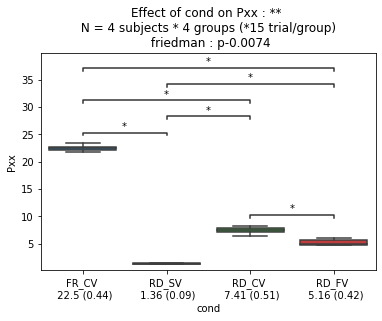

In [144]:
gh.auto_stats(df=df_ITPC_all.groupby(['sujet','cond','ROI']).mean().reset_index(), predictor = 'cond', outcome = 'Pxx', subject = 'sujet', transform=False, order = ['FR_CV','RD_SV','RD_CV','RD_FV'])

<AxesSubplot:title={'center':'Effect of phase on Pxx : ns \n  N = 4 subjects * 4 groups (*1 trial/group) \n rm_anova : p-0.4162, np2 : 0.26 (L)'}, xlabel='phase', ylabel='Pxx'>

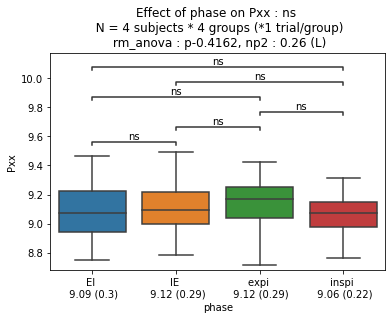

In [145]:
gh.auto_stats(df=df_ITPC_all.groupby(['sujet','phase']).mean().reset_index(), predictor = 'phase', outcome = 'Pxx', subject = 'sujet', transform=False)

/home/valentin.ghibaudo/.virtualenvs/py38_nodegpu/lib/python3.8/site-packages/pingouin/distribution.py:486: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(
/home/valentin.ghibaudo/.virtualenvs/py38_nodegpu/lib/python3.8/site-packages/pingouin/distribution.py:486: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(
/home/valentin.ghibaudo/.virtualenvs/py38_nodegpu/lib/python3.8/site-packages/pingouin/distribution.py:486: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(


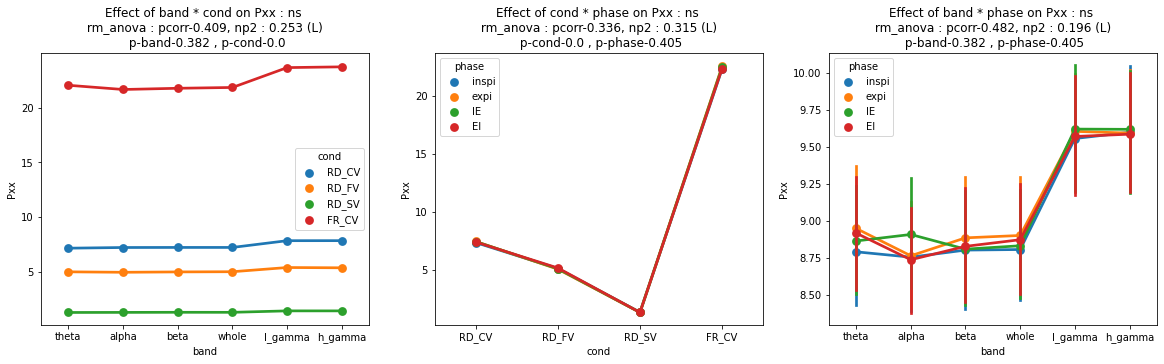

In [146]:
pairs = [['band','cond'],['cond','phase'],['band','phase']]
fig, axs = plt.subplots(ncols = len(pairs), figsize = (20,5))
for col,pair in enumerate(pairs):
    ax = axs[col]
    gh.auto_stats(df=df_ITPC_all, predictor = pair, outcome = 'Pxx', subject = 'sujet', design = 'within', ax=ax, transform = False)

<AxesSubplot:xlabel='cond', ylabel='Pxx'>

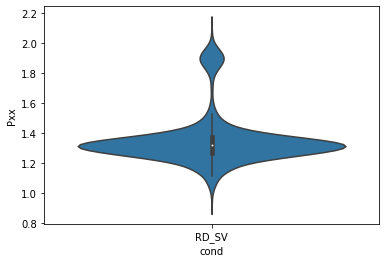

In [147]:
sns.violinplot(data=df_ITPC_all[df_ITPC_all['cond'] == 'RD_SV'], x = 'cond', y = 'Pxx')

In [148]:
df_ITPC_all

sujet   cond  chan            ROI      Lobe side     band  phase  \
0      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta  inspi   
1      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta   expi   
2      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta     IE   
3      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    theta     EI   
4      CHEe  RD_CV  Jp01   temporal sup  Temporal    l    alpha  inspi   
...     ...    ...   ...            ...       ...  ...      ...    ...   
17555  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  l_gamma     EI   
17556  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma  inspi   
17557  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma   expi   
17558  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma     IE   
17559  TREt  FR_CV  Up12  orbitofrontal   Frontal    l  h_gamma     EI   

             Pxx  
0       6.661724  
1       6.293704  
2       5.563021  
3       5.491722  
4       7.050847  
...          ...  
17555  21.770735  
17556  22.579242  
17557  22.473577  
17558  23.561953  
17559  23.665036  

[40224 rows x 9 columns]

In [149]:
df_ITPC_all.groupby(['sujet','cond','ROI']).mean()

Pxx
sujet cond  ROI                         
CHEe  FR_CV WM                 21.874824
            amygdala           22.381034
            choroide plexus    22.442942
            cingulaire post    21.996461
            hippocampus        22.072950
...                                  ...
TREt  RD_SV pars triangularis   1.308210
            pole temporal       1.319365
            temporal inf        1.308731
            temporal med        1.330471
            temporal sup        1.318109

[244 rows x 1 columns]

In [150]:
df_ITPC_all.groupby(['cond','phase']).std()

Pxx
cond  phase          
FR_CV EI     2.361593
      IE     2.245910
      expi   2.355873
      inspi  2.324935
RD_CV EI     1.059075
      IE     1.017976
      expi   1.042461
      inspi  1.008685
RD_FV EI     0.781938
      IE     0.787283
      expi   0.816838
      inspi  0.721542
RD_SV EI     0.172725
      IE     0.174689
      expi   0.176855
      inspi  0.170923

<AxesSubplot:xlabel='cond', ylabel='Pxx'>

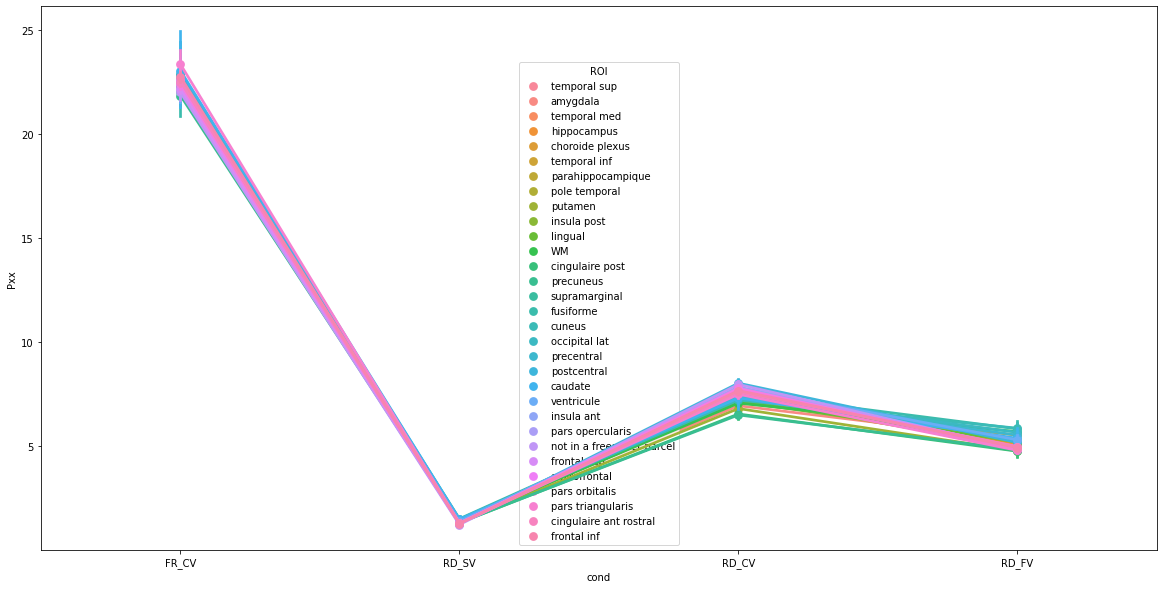

In [151]:
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data=df_ITPC_all , x = 'cond',y = 'Pxx', hue = 'ROI',ax=ax, order = ['FR_CV','RD_SV','RD_CV','RD_FV'])
# ax.tick_params(axis='x', rotation=90)

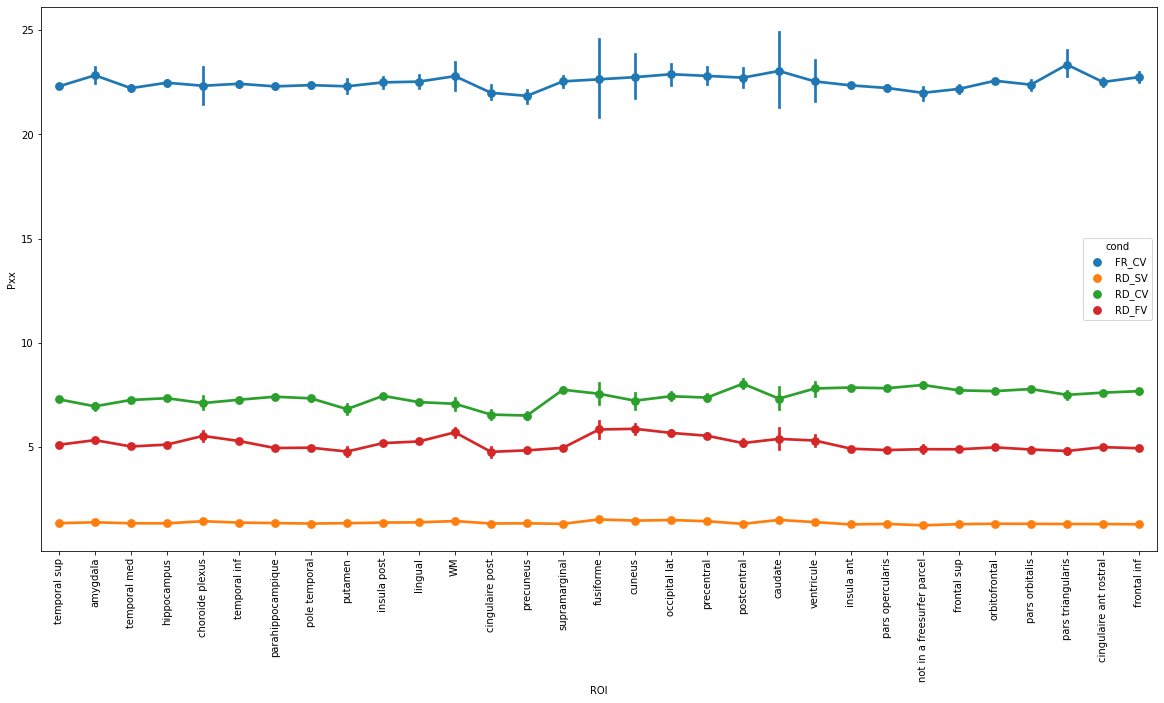

In [152]:
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data=df_ITPC_all , x = 'ROI',y = 'Pxx', hue = 'cond',ax=ax, hue_order = ['FR_CV','RD_SV','RD_CV','RD_FV'])
ax.tick_params(axis='x', rotation=90)

In [153]:
gh.auto_stats(df=df_ITPC_all.groupby(['sujet','cond','ROI']).std().reset_index(), predictor = 'cond', outcome = 'Pxx', subject = 'sujet', order = ['FR_CV','RD_SV','RD_CV','RD_FV'])

<AxesSubplot:title={'center':'Effect of cond on Pxx : ** \n N = 4 subjects * 4 groups (*15 trial/group) \n friedman : p-0.0074'}, xlabel='cond', ylabel='Pxx'>

<AxesSubplot:xlabel='cond', ylabel='Pxx'>

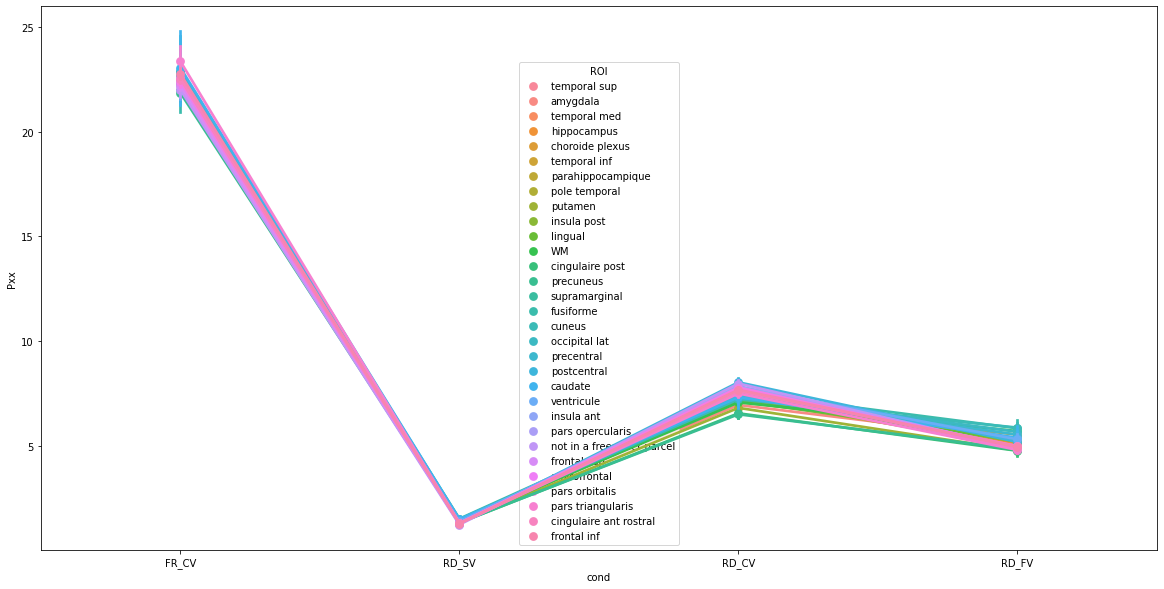

In [154]:
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data=df_ITPC_all , x = 'cond',y = 'Pxx', hue = 'ROI',ax=ax, order = ['FR_CV','RD_SV','RD_CV','RD_FV'])
# ax.tick_params(axis='x', rotation=90)

In [155]:
mapper_n_rois = {roi:df_ITPC_all['ROI'].value_counts()[roi] for roi in df_ITPC_all.groupby(['ROI']).mean().index}

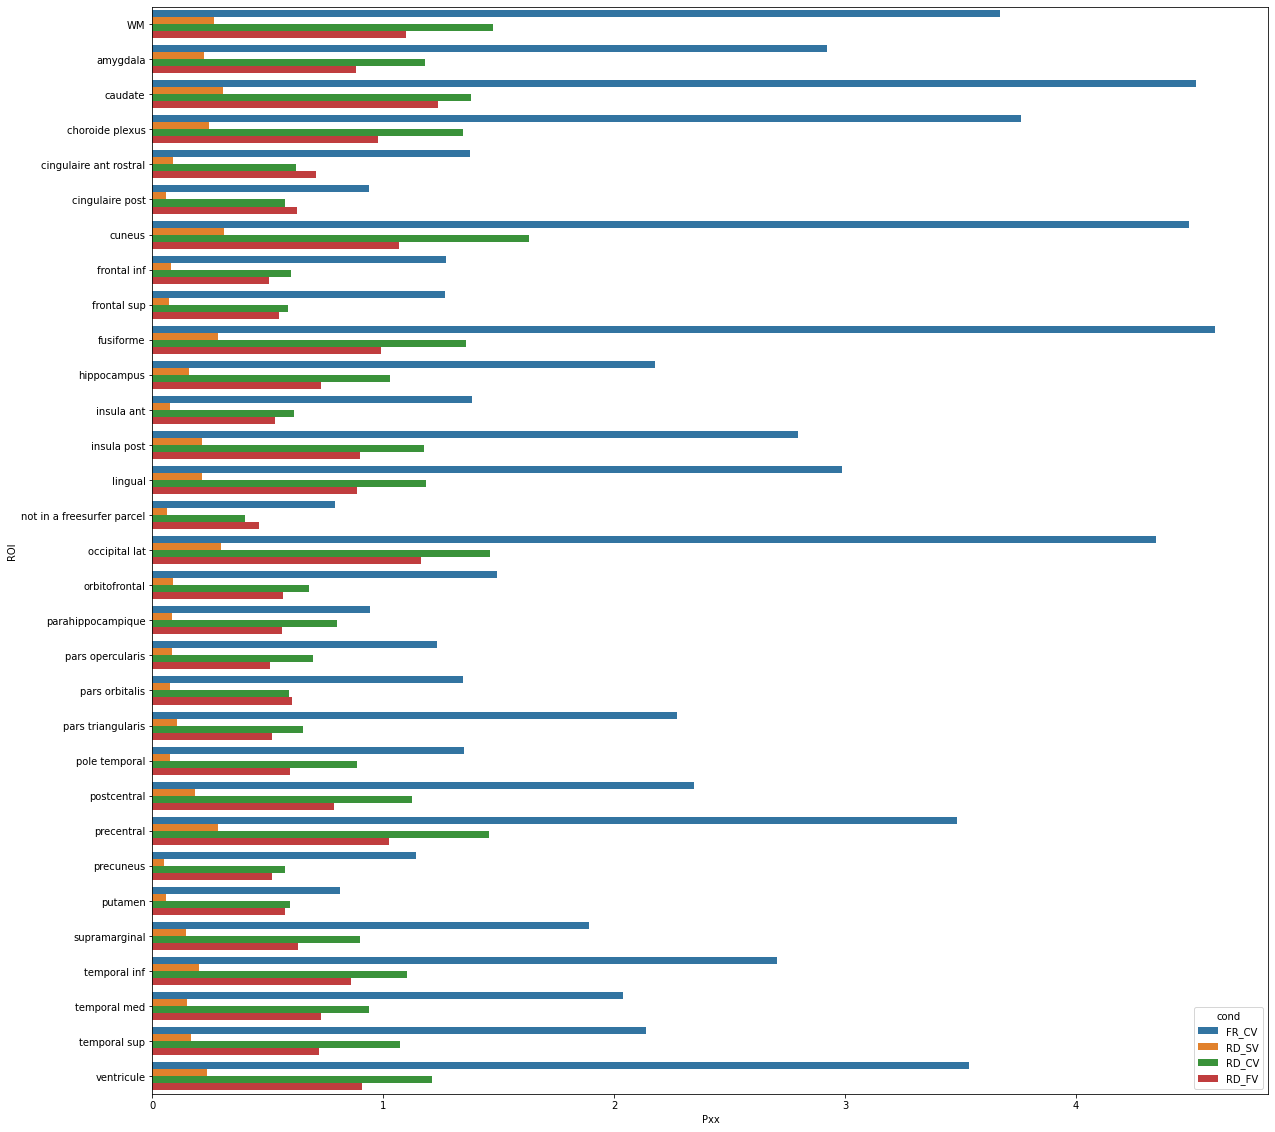

In [156]:
fig, ax = plt.subplots(figsize = (20,20))
sns.barplot(data=df_ITPC_all.groupby(['cond','ROI']).std().reset_index(), y='ROI', x = 'Pxx', hue = 'cond', orient = 'h', ax=ax, hue_order = ['FR_CV','RD_SV','RD_CV','RD_FV'])
# ax.bar_label(container=ax.containers[0], labels=mapper_n_rois.values())
plt.show()

In [157]:
df_ratio_sd_FR_SV = pd.DataFrame(data=(df_ITPC_all.groupby(['band','cond','ROI']).std().query("cond == 'FR_CV'").values / df_ITPC_all.groupby(['band','cond','ROI']).std().query("cond == 'RD_SV'").values), index = (df_ITPC_all.groupby(['band','cond','ROI']).std().query("cond == 'FR_CV'").index))

<AxesSubplot:xlabel='0', ylabel='ROI'>

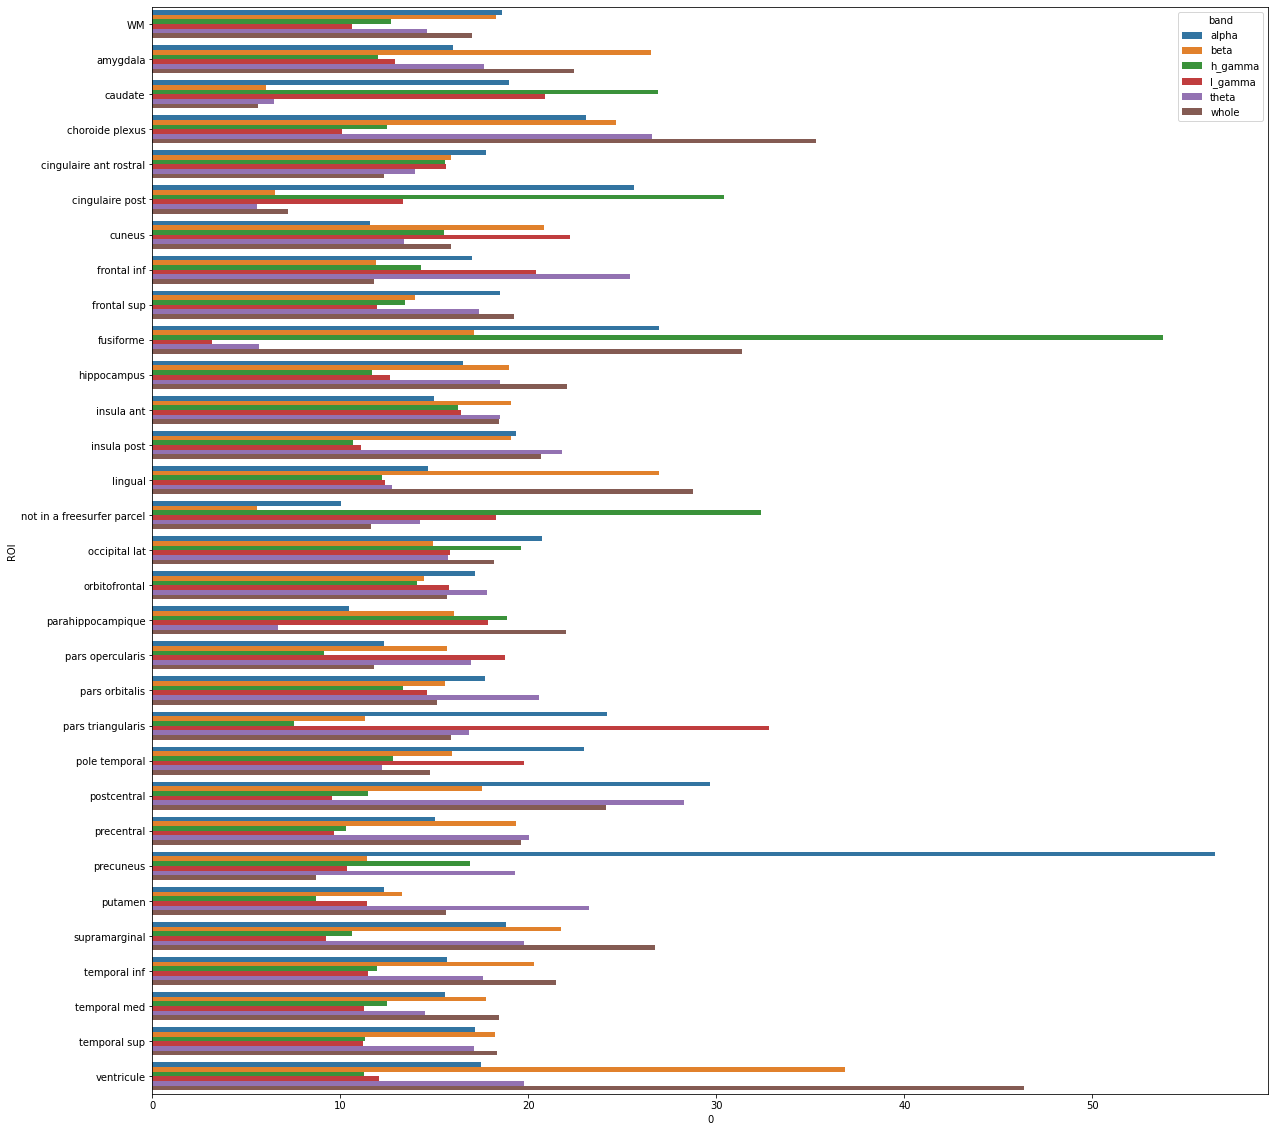

In [158]:
fig , ax = plt.subplots(figsize = (20,20))
sns.barplot(data=df_ratio_sd_FR_SV.reset_index(), x = 0, y = 'ROI', hue='band',ax=ax)

<AxesSubplot:xlabel='cond', ylabel='Pxx'>

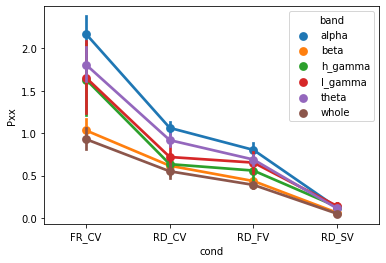

In [159]:
sns.pointplot(data=df_ITPC_all.groupby(['band','cond','ROI']).std().reset_index(), x = 'cond', y = 'Pxx', hue = 'band')

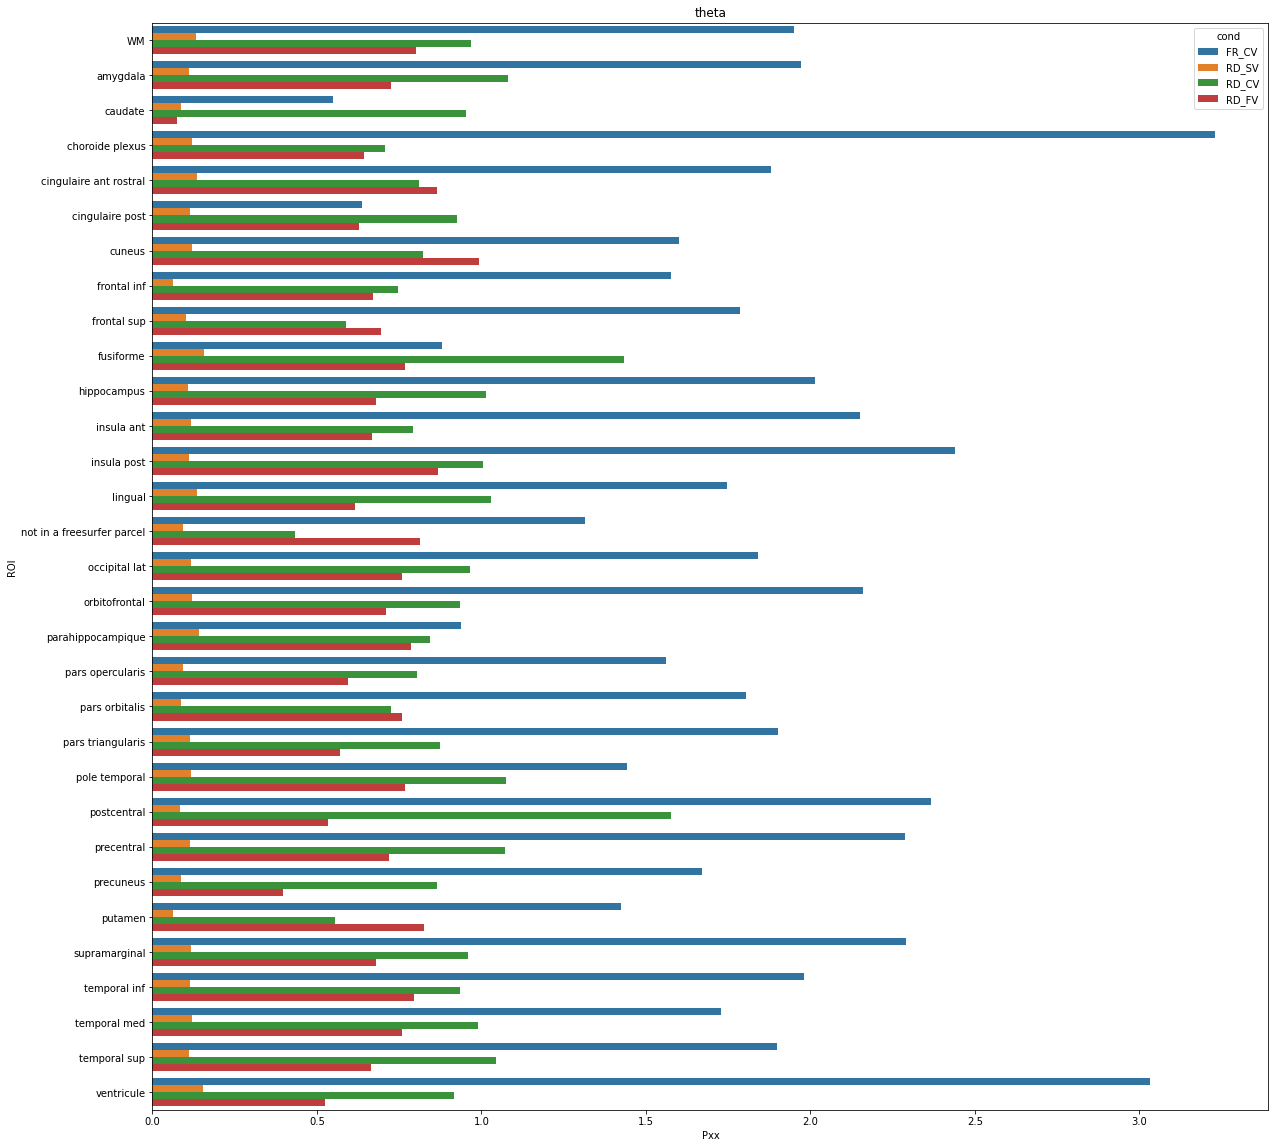

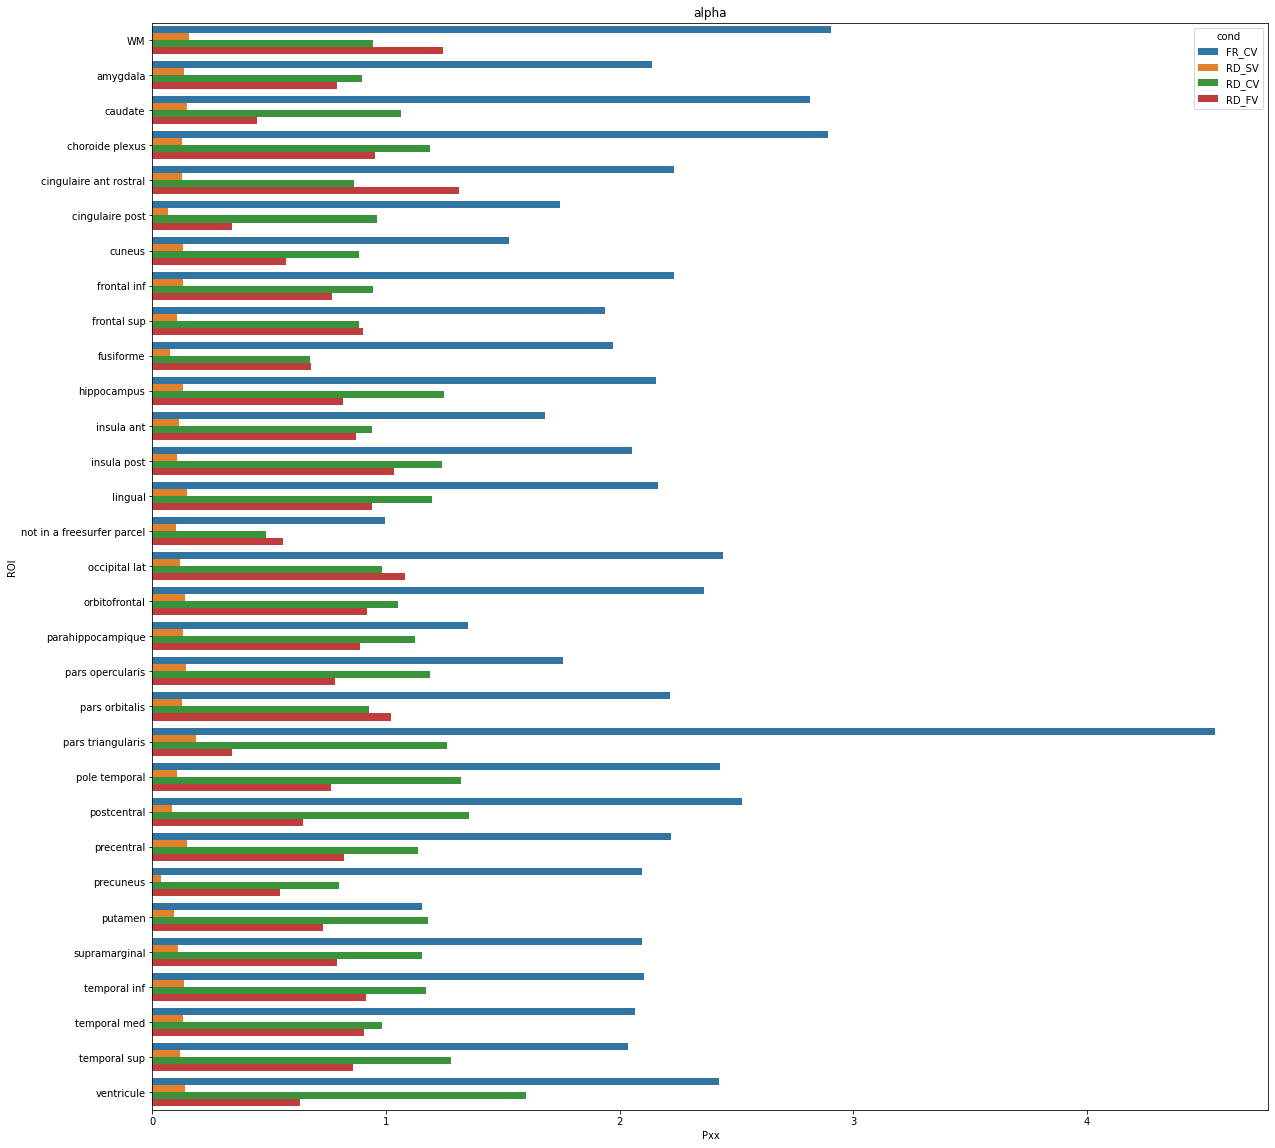

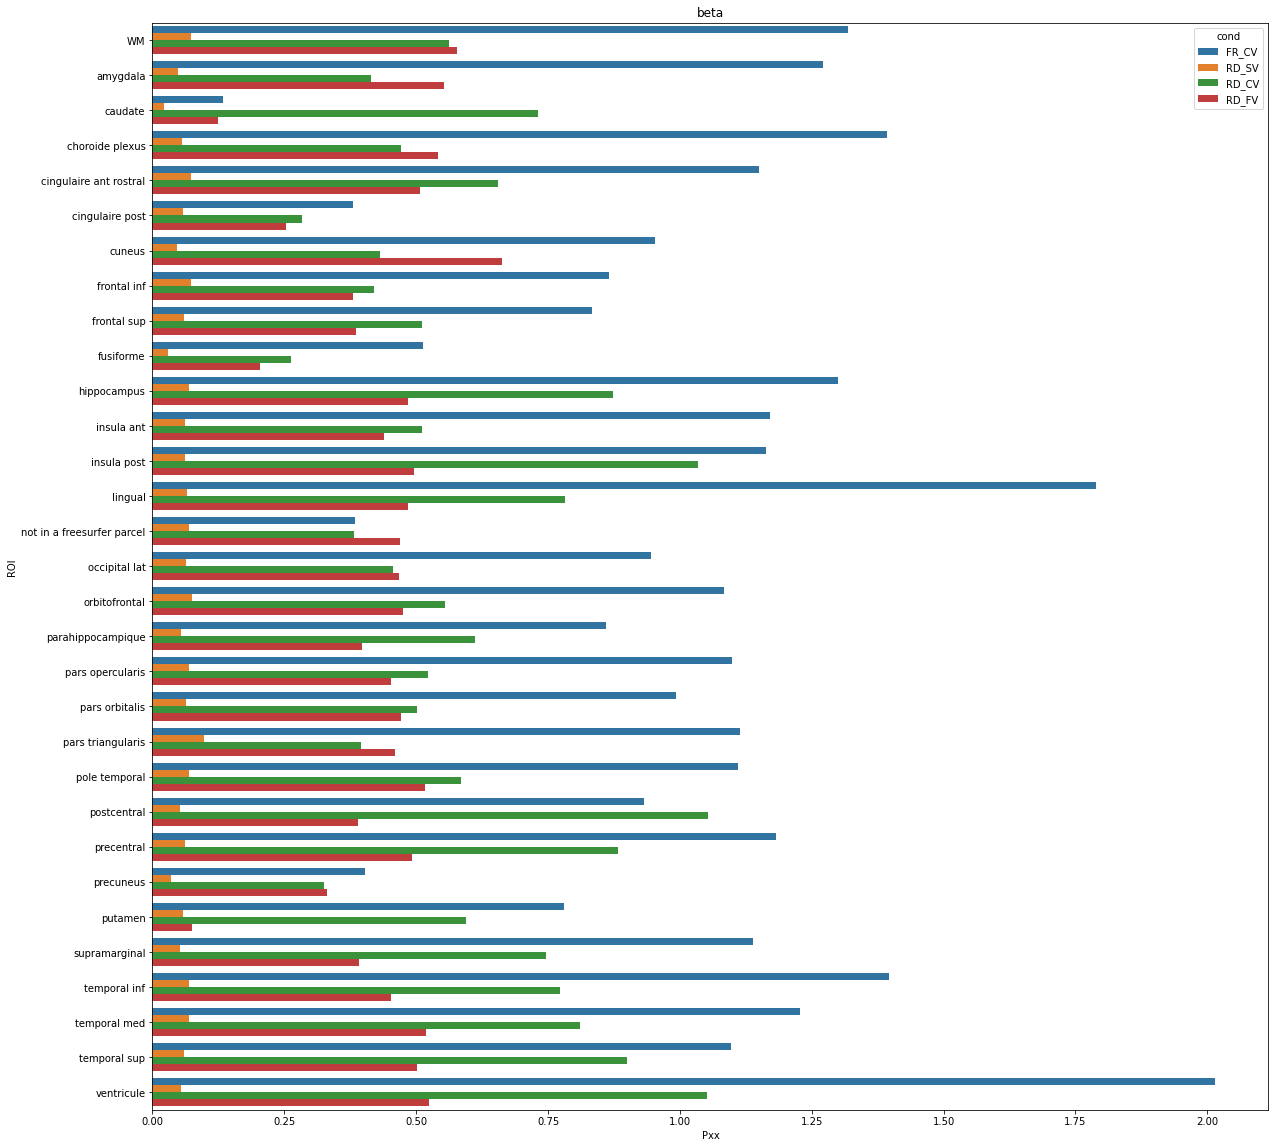

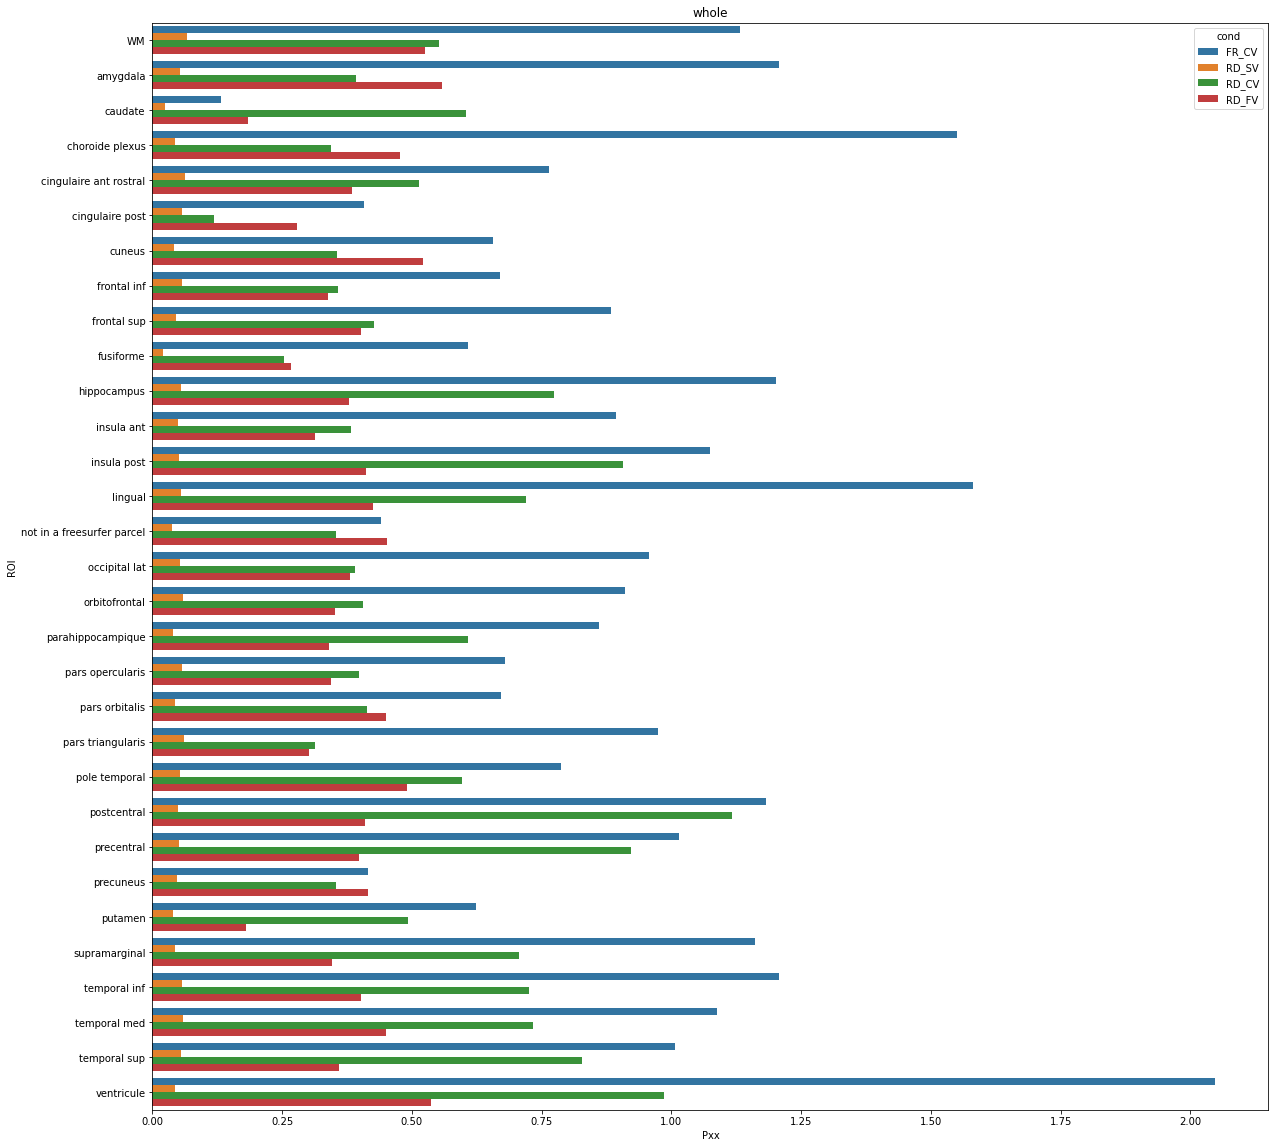

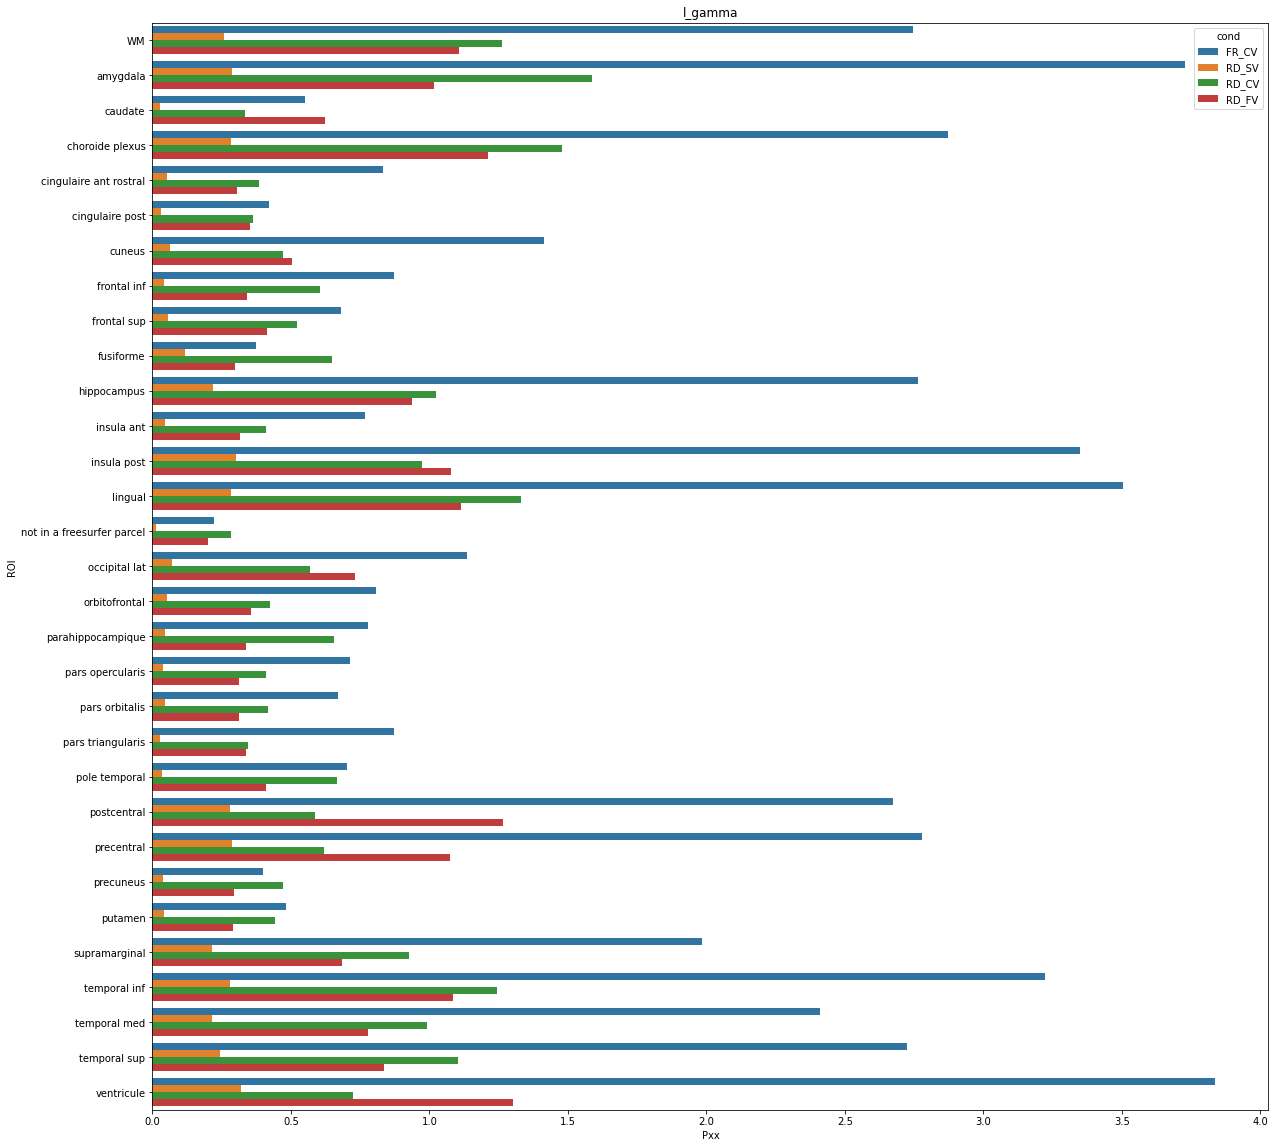

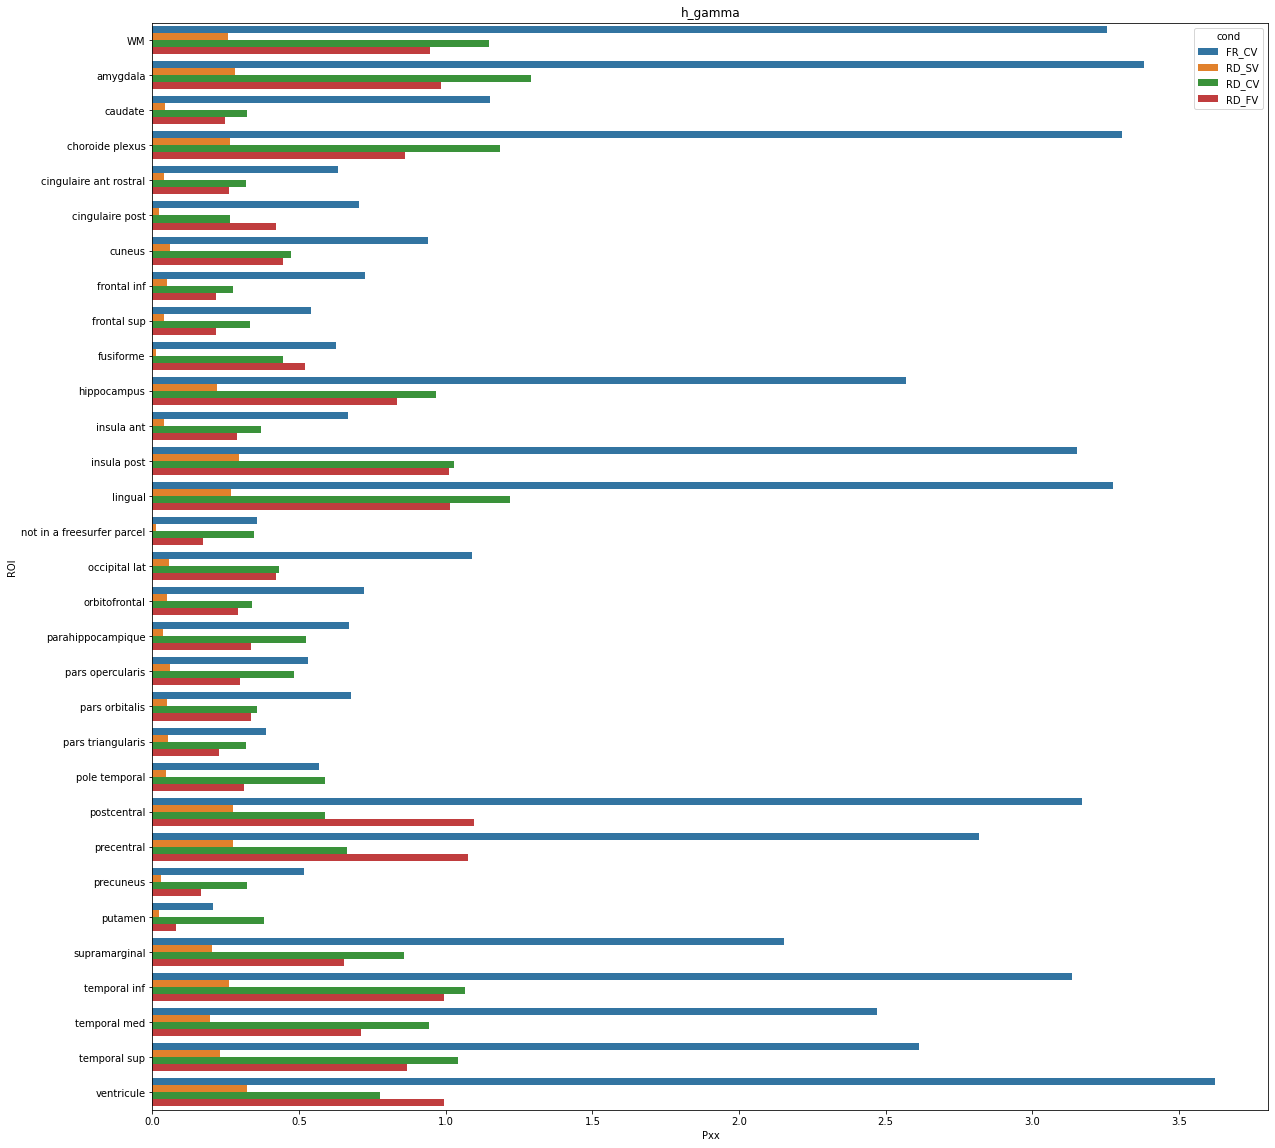

In [160]:

for band in df_ITPC_all['band'].unique():
    fig, ax = plt.subplots(figsize = (20,20))
    sns.barplot(data=df_ITPC_all[df_ITPC_all['band'] == band].groupby(['cond','ROI']).std().reset_index(), y='ROI', x = 'Pxx', hue = 'cond', orient = 'h', ax=ax, hue_order = ['FR_CV','RD_SV','RD_CV','RD_FV'])
    # ax.bar_label(container=ax.containers[0], labels=mapper_n_rois.values())
    ax.set_title(band)
    plt.show()

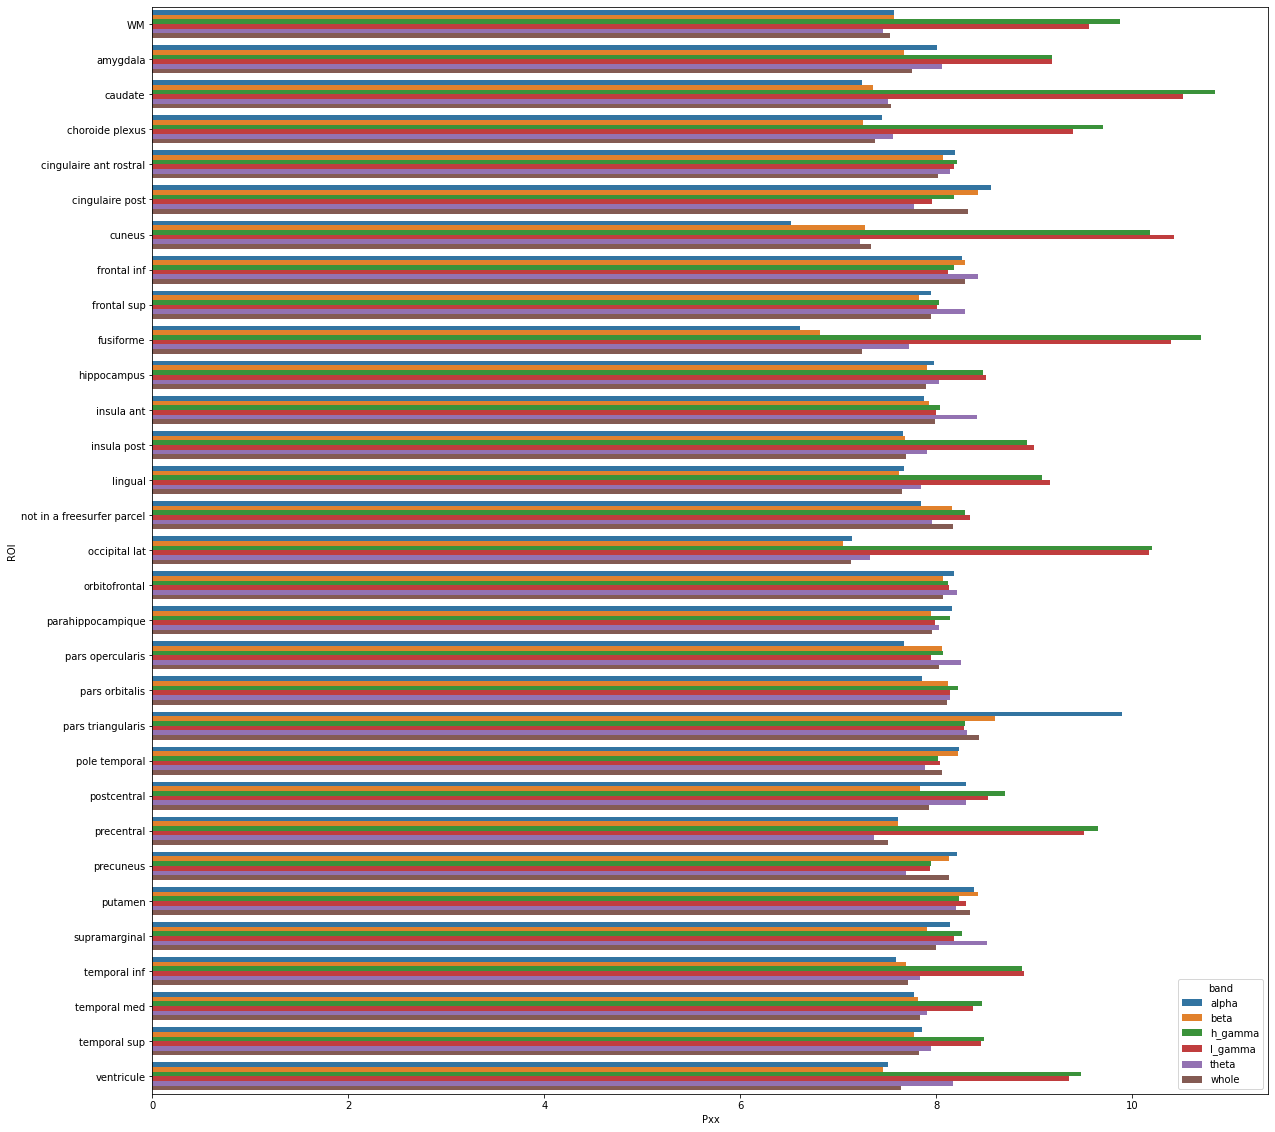

In [161]:
fig, ax = plt.subplots(figsize = (20,20))
sns.barplot(data=df_ITPC_all.groupby(['band','ROI']).std().reset_index(), y='ROI', x = 'Pxx', hue = 'band', orient = 'h', ax=ax)
# ax.bar_label(container=ax.containers[0], labels=mapper_n_rois.values())
plt.show()

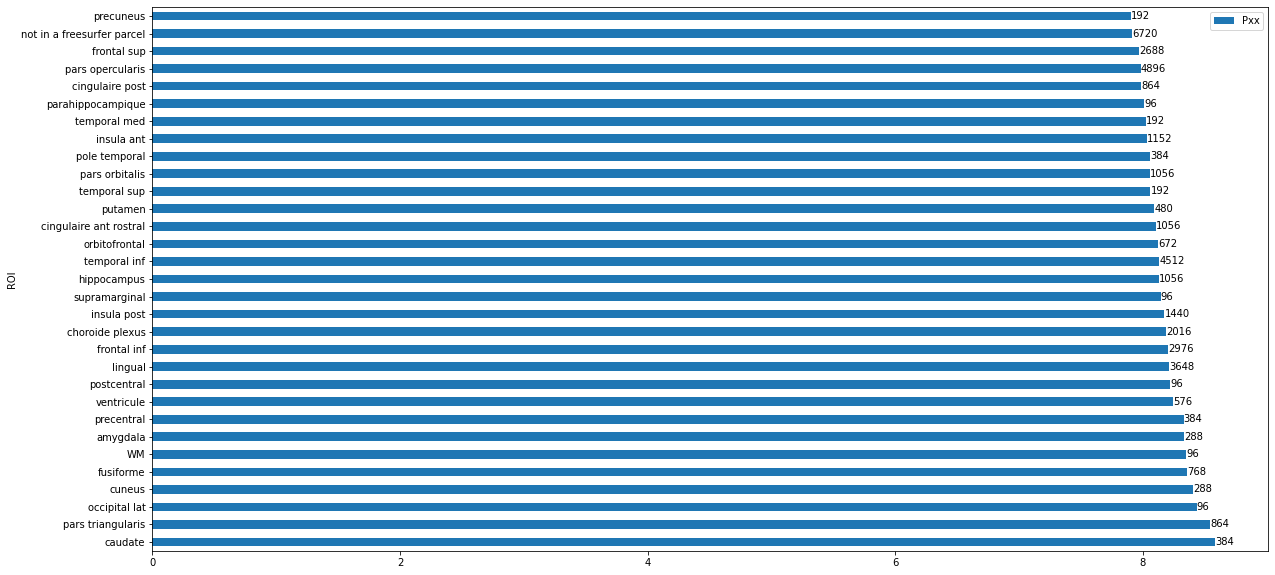

In [162]:
fig, ax = plt.subplots(figsize =(20,10))
df_ITPC_all.groupby('ROI').std().sort_values('Pxx', ascending = False).plot.barh(ax=ax)
ax.bar_label(container=ax.containers[0], labels=mapper_n_rois.values())
plt.show()

In [163]:
rois_to_test = np.append(df_ITPC_all['ROI'].unique(), df_ITPC_all['ROI'].unique()[-1])
rois_to_test = rois_to_test.reshape(8,4)
fig, axs = plt.subplots(nrows = 8, ncols = 4, figsize = (20,20), constrained_layout = True)
fig.suptitle('Interaction phase * bande par ROIs', fontsize = 20, y = 1.05)
for row, sublist in enumerate(rois_to_test):
    for col, roi in enumerate(sublist):
        ax = axs[row,col]
        sns.pointplot(data=df_ITPC_all[df_ITPC_all['ROI'] == roi] , x = 'band', y = 'Pxx', hue = 'phase', kind = 'point',ax=ax)
        ax.set_title(roi)


## FR CV

In [164]:
df_ITPC_FR_CV = df_ITPC.query("cond == 'FR_CV'")

In [165]:
gh.auto_stats(df=df_ITPC_FR_CV.groupby(['sujet','phase']).mean().reset_index(), predictor = 'phase', outcome = 'Pxx', subject ='sujet', transform = False)

<AxesSubplot:title={'center':'Effect of phase on Pxx : ns \n N = 15 subjects * 4 groups (*1 trial/group) \n friedman : p-0.3795'}, xlabel='phase', ylabel='Pxx'>

In [166]:
gh.auto_stats(df=df_ITPC_FR_CV, predictor = ['band','phase'], outcome = outcome, subject = 'sujet', design = 'within')

/home/valentin.ghibaudo/.virtualenvs/py38_nodegpu/lib/python3.8/site-packages/pingouin/distribution.py:486: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(


<AxesSubplot:title={'center':'Effect of band * phase on Pxx : ns \n rm_anova : pcorr-0.247, np2 : 0.095 (M) \n p-band-0.423 , p-phase-0.237'}, xlabel='band', ylabel='Pxx'>

In [167]:
rois_to_test = df_ITPC_FR_CV['ROI'].unique()
rois_to_test = rois_to_test.reshape(7,5)
fig, axs = plt.subplots(nrows = 7, ncols = 5, figsize = (20,20), constrained_layout = True)
fig.suptitle('Interaction phase * bande par ROIs', fontsize = 20, y = 1.05)
for row, sublist in enumerate(rois_to_test):
    for col, roi in enumerate(sublist):
        ax = axs[row,col]
        sns.pointplot(data=df_ITPC_FR_CV[df_ITPC_FR_CV['ROI'] == roi] , x = 'band', y = 'Pxx', hue = 'phase', kind = 'point',ax=ax)
        ax.set_title(roi)

# EVALUATIONS PYSCHO

In [168]:
df_psycho = pd.read_excel('../../NBuonviso2021_respi_ieeg_jules_valentin/psycho/CotationPsychoiEEG.xlsx').drop(columns = 'Subject')

In [169]:
df_psycho

Name  FreqConf  DiffConf  DiffFreqTarget Condition  Order  Difficulty  \
0   TREt      0.20      0.05          0.0003     RD_SV      2          12   
1   TREt      0.20      0.00          0.0035     RD_CV      1           5   
2   TREt      0.20      0.30          0.2584     RD_FV      3          26   
3   TREt      0.20      0.00          0.0063     RD_AV      4          30   
4   GOBc      0.28      0.13          0.0090     RD_SV      2          63   
5   GOBc      0.28      0.00          0.0012     RD_CV      1          64   
6   GOBc      0.28      0.22          0.0251     RD_FV      3          58   
7   GOBc      0.28      0.00          0.0115     RD_AV      4          56   
8   CAPp      0.26      0.11             NaN     RD_SV      2          17   
9   CAPp      0.26      0.00             NaN     RD_CV      1           1   
10  CAPp      0.26      0.24             NaN     RD_FV      3           8   
11  CAPp      0.26      0.00             NaN     RD_AV      4           1   
12  MUGa      0.28      0.13             NaN     RD_SV      2          60   
13  MUGa      0.28      0.00             NaN     RD_CV      1          57   
14  MUGa      0.28      0.22             NaN     RD_FV      3          68   
15  MUGa      0.28      0.00             NaN     RD_AV      4          66   
16  CHEe      0.28      0.13          0.0010     RD_SV      2          16   
17  CHEe      0.28      0.00          0.0470     RD_CV      1          36   
18  CHEe      0.28      0.22          0.0190     RD_FV      3          72   
19  CHEe      0.28      0.00             NaN     RD_AV      4          88   

    Relaxation  Stress  Fatigue  Attention  
0           49      66       88         89  
1           49      69       83         88  
2           46      60       96         93  
3           50      50       98         83  
4           48      50       83         45  
5           50      53       73         56  
6           46      54       88         51  
7           50      50       67         46  
8           54      47       50         39  
9           50      50       50         45  
10          38      61       50         43  
11          63      36       50         41  
12          59      21       20         45  
13          59      27       24         50  
14          57      21       21         41  
15          54      19       23         44  
16          41      10       24         52  
17          29       5       10         77  
18          28      23       42         87  
19          24      50       73         87

In [170]:
df_psycho.groupby('Name').mean()

FreqConf  DiffConf  DiffFreqTarget  Order  Difficulty  Relaxation  \
Name                                                                      
CAPp      0.26    0.0875             NaN    2.5        6.75       51.25   
CHEe      0.28    0.0875        0.022333    2.5       53.00       30.50   
GOBc      0.28    0.0875        0.011700    2.5       60.25       48.50   
MUGa      0.28    0.0875             NaN    2.5       62.75       57.25   
TREt      0.20    0.0875        0.067125    2.5       18.25       48.50   

      Stress  Fatigue  Attention  
Name                              
CAPp   48.50    50.00      42.00  
CHEe   22.00    37.25      75.75  
GOBc   51.75    77.75      49.50  
MUGa   22.00    22.00      45.00  
TREt   61.25    91.25      88.25

In [171]:
df_psycho.rcorr()

FreqConf DiffConf DiffFreqTarget   Order Difficulty Relaxation  \
FreqConf              -                                         **              
DiffConf           -0.0        -              *                                 
DiffFreqTarget    -0.34    0.622              -                                 
Order               0.0    0.144          0.174       -                         
Difficulty        0.578    0.063         -0.138   0.246          -              
Relaxation       -0.116   -0.155         -0.056  -0.052     -0.219          -   
Stress           -0.607    0.034          0.132   0.033     -0.308      0.049   
Fatigue          -0.631    0.054          0.209   0.196     -0.133     -0.055   
Attention        -0.617   -0.009          0.397    -0.0     -0.009     -0.552   

               Stress Fatigue Attention  
FreqConf           **      **        **  
DiffConf                                 
DiffFreqTarget                           
Order                                    
Difficulty                               
Relaxation                            *  
Stress              -     ***            
Fatigue          0.87       -         *  
Attention       0.267    0.46         -

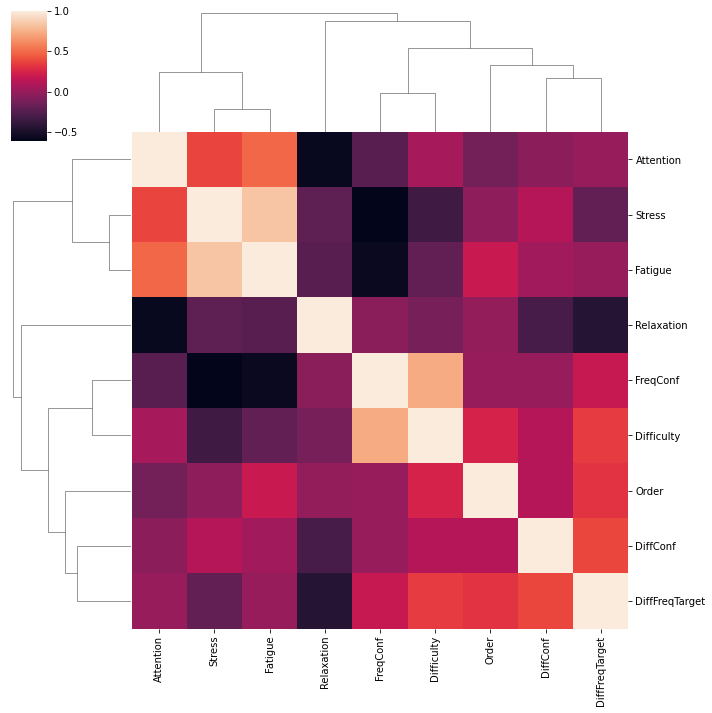

In [172]:
sns.clustermap(df_psycho.corr('spearman'))

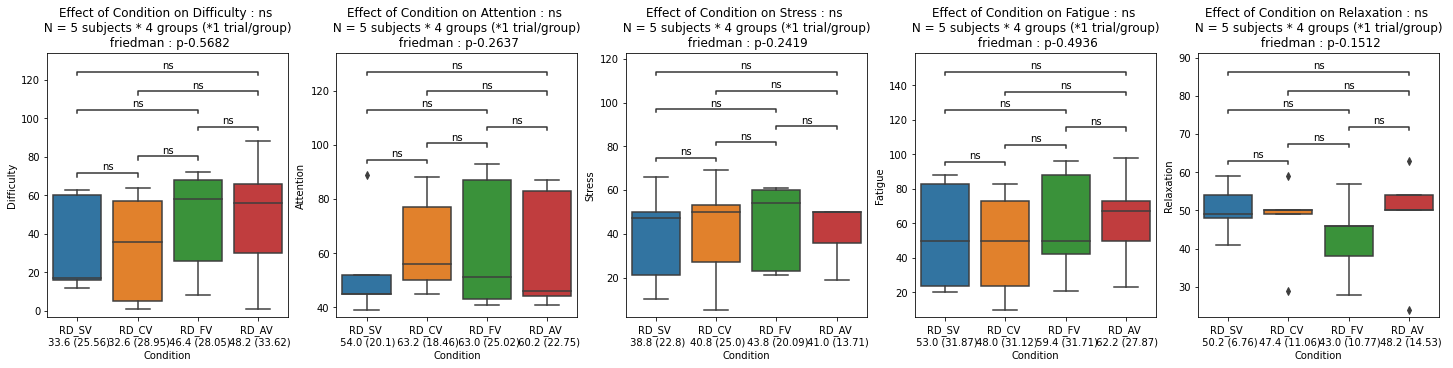

In [173]:
outcomes = ['Difficulty','Attention','Stress','Fatigue','Relaxation']
fig, axs = plt.subplots(ncols = len(outcomes), figsize = (20,5), constrained_layout =True)
for col, outcome in enumerate(outcomes):
    ax = axs[col]
    gh.auto_stats(df=df_psycho, predictor='Condition',outcome = outcome, subject = 'Name', ax=ax, transform = False)